# Data Extraction

## Importing Libraries

We use !pip for installing libriries, in this case is PyDrive. <br>We use PyDrive so we can access directly the Google Drive folders

In [ ]:
!pip install PyDrive

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

## Getting Authentification

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

## Getting Main Folder ID

In [ ]:
import re

def get_folder_ID():
  folder_link = "https://drive.google.com/drive/folders/1Z5elhiU-za29NG8QdvSgY6ESYvqPyyOq?usp=drive_link"
  match = re.search(r'folders/([\w-]+)', folder_link)
  if match:
    folder_id = match.group(1)
    return folder_id
  else :
    print("No folder ID found in the link.")

print(f"Folder ID: {get_folder_ID()}")
folder_id = get_folder_ID()

Folder ID: 1Z5elhiU-za29NG8QdvSgY6ESYvqPyyOq


## Getting Folders Inside Main Folder ID

In [ ]:
file_list = drive.ListFile({'q': f"'{folder_id}' in parents and trashed=false"}).GetList()
print(f"Total folders : {len(file_list)} folder ")
print("Folder List :")
for file_info in file_list:
  print(f"Folder name: {file_info['title']}, ID: {file_info['id']}")

Total folders : 32 folder 
Folder List :
Folder name: Video Guidelines, ID: 1kvvmSJya6pTKxtNn2Jpu16gsMVDv4_O_
Folder name: data collection tracker, ID: 1Lmu4rFWdBV5tFzGaD_hVTBz9Bxs9t0fC
Folder name: buka, ID: 10vydR5DmUaLdVPJkCEr_QcVRYo_GmTg1
Folder name: senyum, ID: 120BNAFnsWG6zwh-HMmug3Rpz0naYcrO1
Folder name: anak, ID: 1-rTVMak6oBD1g5NHNjDZYcDs0AJNTi6K
Folder name: main, ID: 10_jvm3GdvDmBKBTTQBJwN22QcDtQ99CM
Folder name: tidur, ID: 11PBjteZFDIsHxFNNmZPrp38lxrOfP-3u
Folder name: makan, ID: 10W4pjNJ8N7x2vv1afpCEtkFcjIp3VJjY
Folder name: jalan, ID: 110yz2Tb9R-X3SFz79pYFDHmXdVPAWX4W
Folder name: haus, ID: 10-FQTAqW5nhYdDbJ8rj8Tmxu-Ggt5agQ
Folder name: minum, ID: 10M195dn4K9p4zvFJNKMooprrMT9YqKa3
Folder name: lapar, ID: 10i-px3Dkd_MmuCtUs-ls1XjkdkOdRYNL
Folder name: dengar, ID: 1-l-NeOlrZ0lwGBo0M4Ic5z9RJyj70WZN
Folder name: kertas, ID: 114_aOZl3rwOvEnMwZt6i35OR4q7iRFwC
Folder name: keluarga, ID: 10nxVpduya_kh717fCjl6xZhdRbyylLFu
Folder name: buruk, ID: 10zjCr5UzGRb3JItTtgDMdG2hrciA82Bv



## Remove Unecessary Folders

In [ ]:
ids_to_keep = {
    '10vydR5DmUaLdVPJkCEr_QcVRYo_GmTg1',
    '120BNAFnsWG6zwh-HMmug3Rpz0naYcrO1',
    '1-rTVMak6oBD1g5NHNjDZYcDs0AJNTi6K',
    '10_jvm3GdvDmBKBTTQBJwN22QcDtQ99CM',
    '11PBjteZFDIsHxFNNmZPrp38lxrOfP-3u',
    '10W4pjNJ8N7x2vv1afpCEtkFcjIp3VJjY',
    '110yz2Tb9R-X3SFz79pYFDHmXdVPAWX4W',
    '10-FQTAqW5nhYdDbJ8rj8Tmxu-Ggt5agQ',
    '10M195dn4K9p4zvFJNKMooprrMT9YqKa3',
    '10i-px3Dkd_MmuCtUs-ls1XjkdkOdRYNL',
    '1-l-NeOlrZ0lwGBo0M4Ic5z9RJyj70WZN',
    '114_aOZl3rwOvEnMwZt6i35OR4q7iRFwC',
    '10nxVpduya_kh717fCjl6xZhdRbyylLFu',
    '10zjCr5UzGRb3JItTtgDMdG2hrciA82Bv',
    '117Wcl49NQZX18HF8WwvBRSH2aL59qRjO',
    '11dfJdSvGh3767xuNHpUzv76Hz5TK5unT',
    '10GGLpL9Jmh96SyqZ8NX57kTM5mA7ireB',
    '10LFdnQntlVR7zjPHvXWE-yfZGHrwV6by',
    '1-ipEllDc7IkCDFejcP54VmZm5fU0V_PE',
    '10L8ar0plaHkJ2S_L3WCTD-reb0kvVbL4',
    '105ASUx0eGrR_8GCoG7iIQZwcjLjcIkRo',
    '1-ws41HUznZbdNUTajWFIrPM7WJ6Sd8rA',
    '10Y-MwduO2pVTXcnoe1dGwmB8ga1jrMkB',
    '12-Exc9T1kgQJfyFVg2aJ-a_RtXgaP1lA',
    '10G_ICs9vEZME8xbixMg2ZqimdImQWEwE',
    '11rgsJ8ilTW2v2OU-tw7Lm-RL2jd6ytAA',
    '1056UqJce3v28XiJxt_jDzf5wTcS0pCgS',
    '11lV6xUTVxrW0MoGNOr83ypb4e0wxnCol',
    '10xznbwJcBfY-sii9CKcqAzML0UVpyOpw',
    '10iuiCiIdB72WFGoT8Kqq9HeXy8bSWyYZ'
}

file_list = [file_info for file_info in file_list if file_info['id'] in ids_to_keep]

print(f"Total folders : {len(file_list)} folder ")
print("Folder List :")
for file_info in file_list:
  print(f"Folder name: {file_info['title']}, ID: {file_info['id']}")

Total folders : 30 folder 
Folder List :
Folder name: buka, ID: 10vydR5DmUaLdVPJkCEr_QcVRYo_GmTg1
Folder name: senyum, ID: 120BNAFnsWG6zwh-HMmug3Rpz0naYcrO1
Folder name: anak, ID: 1-rTVMak6oBD1g5NHNjDZYcDs0AJNTi6K
Folder name: main, ID: 10_jvm3GdvDmBKBTTQBJwN22QcDtQ99CM
Folder name: tidur, ID: 11PBjteZFDIsHxFNNmZPrp38lxrOfP-3u
Folder name: makan, ID: 10W4pjNJ8N7x2vv1afpCEtkFcjIp3VJjY
Folder name: jalan, ID: 110yz2Tb9R-X3SFz79pYFDHmXdVPAWX4W
Folder name: haus, ID: 10-FQTAqW5nhYdDbJ8rj8Tmxu-Ggt5agQ
Folder name: minum, ID: 10M195dn4K9p4zvFJNKMooprrMT9YqKa3
Folder name: lapar, ID: 10i-px3Dkd_MmuCtUs-ls1XjkdkOdRYNL
Folder name: dengar, ID: 1-l-NeOlrZ0lwGBo0M4Ic5z9RJyj70WZN
Folder name: kertas, ID: 114_aOZl3rwOvEnMwZt6i35OR4q7iRFwC
Folder name: keluarga, ID: 10nxVpduya_kh717fCjl6xZhdRbyylLFu
Folder name: buruk, ID: 10zjCr5UzGRb3JItTtgDMdG2hrciA82Bv
Folder name: gembira, ID: 117Wcl49NQZX18HF8WwvBRSH2aL59qRjO
Folder name: teman, ID: 11dfJdSvGh3767xuNHpUzv76Hz5TK5unT
Folder name: panggil, ID: 1

### Automaticaly Make a Datasets Folder

Automaticaly make folder to empty and delete automaticaly all files <br> (just in case you are licking the run button)

In [ ]:
import os
import shutil

download_destination  = "/content/datasets"
if os.path.exists(download_destination):
  shutil.rmtree(download_destination)
os.makedirs(download_destination)

### Download Everything at Once

### Multiple GPU Download

In [ ]:
import os
import shutil
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm
import requests
import time

# Construct download URL
def construct_download_url(file_id):
    return f"https://drive.google.com/uc?export=download&id={file_id}"

# Download a single file with progress tracking
def download_file(file_path, download_url, session, progress_bar):
    try:
        response = session.get(download_url, stream=True)
        total_size = int(response.headers.get('content-length', 0))
        block_size = 8192  # Define block size
        with open(file_path, 'wb') as file:
            for data in response.iter_content(block_size):
                file.write(data)
                progress_bar.update(len(data))
    except Exception as e:
        print(f"Error downloading {file_path}: {e}")

# Process a single folder and download its files
def process_folder(folder, session, progress_bar):
    folder_name = folder['title']
    folder_id = folder['id']
    print(f"Processing folder: {folder_name}")

    # Create folder directory
    folder_download_path = os.path.join(download_destination, folder_name)
    os.makedirs(folder_download_path, exist_ok=True)

    # Fetch file metadata
    files = drive.ListFile({'q': f"'{folder_id}' in parents and trashed=false"}).GetList()
    download_tasks = []
    for file_info in files:
        if file_info['mimeType'] != 'application/vnd.google-apps.folder':  # Skip subfolders
            file_name = file_info['title']
            file_path = os.path.join(folder_download_path, file_name)
            download_url = construct_download_url(file_info['id'])
            download_tasks.append((file_path, download_url, session, progress_bar))

    # Execute downloads in parallel
    with ThreadPoolExecutor(max_workers=os.cpu_count() * 2) as executor:
        executor.map(lambda args: download_file(*args), download_tasks)

# Main execution
if __name__ == "__main__":
    session = requests.Session()  # Shared session for all requests

    # Reset download destination
    download_destination = "/content/datasets"
    if os.path.exists(download_destination):
        shutil.rmtree(download_destination)
    os.makedirs(download_destination)

    # Calculate total size for progress bar
    total_size = 0
    for folder in file_list:
        files = drive.ListFile({'q': f"'{folder['id']}' in parents and trashed=false"}).GetList()
        for file_info in files:
            if file_info['mimeType'] != 'application/vnd.google-apps.folder':  # Only count files
                total_size += int(file_info.get('fileSize', 0))  # Use `fileSize` from metadata

    # Measure start time
    start_time = time.time()

    # Single progress bar for all downloads
    with tqdm(total=total_size, unit='iB', unit_scale=True, desc="Downloading All Files") as progress_bar:
        for folder in file_list:
            process_folder(folder, session, progress_bar)

    # Measure end time
    end_time = time.time()
    total_time = end_time - start_time

    # Display execution time
    print(f"Download completed in {total_time:.2f} seconds.")


Processing folder: buka


Processing folder: senyum


Processing folder: anak


Processing folder: main


Processing folder: tidur


Processing folder: makan


Processing folder: jalan


Processing folder: haus


Processing folder: minum


Processing folder: lapar


Processing folder: dengar


Processing folder: kertas


Processing folder: keluarga


Processing folder: buruk


Processing folder: gembira


Processing folder: teman


Processing folder: panggil


Processing folder: nama


Processing folder: kucing


Processing folder: marah


Processing folder: besar


Processing folder: adik


Processing folder: maaf


Processing folder: sedikit


Processing folder: orang


Processing folder: rumah


Processing folder: guru


Processing folder: selamat


Processing folder: ibu


Processing folder: lihat


Download completed in 255.25 seconds.


# Preprocessing

## Identification of Models

### Proposed Models

1. 3D CNN learning source:</br>
  [3D Convolutional Networks | Lecture 41 (Part 2) | Applied Deep Learning by Maziar Raissi](https://www.youtube.com/watch?v=c01fnkC2u2c)
1. ST GCN learning source:</br>
  [ST-GCN: Spatial Temporal Graph Convolutional Networks for Skeleton-Based Action Recognition by Soroush Mehraban](https://www.youtube.com/watch?v=HZZ4ZRsVP9w)
1. CNN LSTM learning source:</br>
  [Chapter 23 LSTM CNN by Prakhar Agarwal (PDAP)](https://www.youtube.com/watch?v=7cukyctJg4s)

### Input Type

1. 3D CNN - CNN Features
1. ST GCN - Key Points
1. CNN LSTM - CNN Features

### Preprocessing Output Folder Structure

In [ ]:
print('''
preprocessed
  ├─── resize
       ├─── class
  ├─── normalized
       ├─── class
  ├─── specific frame
       ├─── class
  ├─── etc
       ├─── class
''')


preprocessed
  ├─── resize
       ├─── class
  ├─── normalized
       ├─── class
  ├─── specific frame
       ├─── class
  ├─── etc
       ├─── class



### Root Directory

In [ ]:
root = "/content/datasets"
if os.path.exists(root):
  print("Root directory exists.")
else:
  print("Root directory does not exist.")
  print("Reset all the cells!")

Root directory exists.


### Checking Folders

In [ ]:
import os

folders = os.listdir(root)
print("Folder List")
for folder in folders:
  print(folders.index(folder)+1,folder)

Folder List
1 maaf
2 lapar
3 anak
4 senyum
5 selamat
6 kucing
7 minum
8 buruk
9 main
10 tidur
11 sedikit
12 nama
13 keluarga
14 dengar
15 gembira
16 besar
17 buka
18 adik
19 makan
20 panggil
21 jalan
22 kertas
23 rumah
24 marah
25 orang
26 guru
27 ibu
28 lihat
29 haus
30 teman


### Checking Videos

In [ ]:
for folder in folders :
  print(folder)
  print(os.listdir(f'/content/datasets/{folder}'))

maaf
['dina_maaf.mp4', 'Deepa.mp4', '1.mp4', 'shikha.mp4', 'nadya.mp4', 'Anastasiia.mp4', 'Arun.mp4', 'kenji.mp4']
lapar
['Deepa.mp4', '1.mp4', 'shikha.mp4', 'dina_lapar.mp4', 'nadya.mp4', 'Anastasiia.mp4', 'Arun.mp4', 'kenji.mp4']
anak
['kenzo_3.mp4', 'Viorelia.mp4', 'Bhavitha_Bojja.mp4', 'vaishnavi_desai.mp4', '1.mp4', 'Roshan_Thapa.mp4', 'louis_1.mp4', 'Monu_Babu_Baitha.mp4', 'mahsa.mp4', 'kenji.mp4']
senyum
['Rebecca.mp4', 'thant htoo san.mp4', 'Marouf_senyum.mp4', '1.mp4', 'louis_8.mp4', 'kenzo_20.mp4', 'senyum.mp4', 'kenji.mp4']
selamat
['thant_htoo_san.mp4', 'Rebecca.mp4', 'kenzo_18.mp4', 'selamat.mp4', '1.mp4', 'Marouf_selemat.mp4', 'louis_7.mp4', 'kenji.mp4']
kucing
['Deepa.mp4', '1.mp4', 'shikha.mp4', 'dina_kucing.mp4', 'nadya.mp4', 'Anastasiia.mp4', 'Arun.mp4', 'kenji.mp4']
minum
['kenzo_12.mp4', 'Rebecca.mp4', 'thant htoo san.mp4', 'louis_12.mp4', 'Marouf_minum.mp4', '1.mp4', 'minum.mp4', 'kenji.mp4']
buruk
['Viorelia.mp4', 'Bhavitha_Bojja.mp4', 'louis_4.mp4', 'vaishnavi_de

### Checking Corrupted Files

In [ ]:
import os
import cv2

def is_video_corrupted(video_path):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        return True  # The video is corrupted if it can't be opened
    return False



for folder in folders:
    folder_path = f'/content/datasets/{folder}'

    files = os.listdir(folder_path)
    corrupted_files = []

    for file in files:
        file_path = os.path.join(folder_path, file)
        if file.lower().endswith(('mp4', 'avi', 'mov')):  # Check only video files
            if is_video_corrupted(file_path):
                corrupted_files.append(file)
                os.remove(file_path)
                print(f"Deleted corrupted video file: {file}")


    if corrupted_files:
        print(f"Corrupted video files in folder {folder} have been deleted.")
    else:
        print(f"No corrupted video files in folder {folder}.")


No corrupted video files in folder maaf.
No corrupted video files in folder lapar.
No corrupted video files in folder anak.
No corrupted video files in folder senyum.
No corrupted video files in folder selamat.
No corrupted video files in folder kucing.
No corrupted video files in folder minum.
No corrupted video files in folder buruk.
No corrupted video files in folder main.
No corrupted video files in folder tidur.
No corrupted video files in folder sedikit.
No corrupted video files in folder nama.
No corrupted video files in folder keluarga.
No corrupted video files in folder dengar.
No corrupted video files in folder gembira.
No corrupted video files in folder besar.
No corrupted video files in folder buka.
No corrupted video files in folder adik.
No corrupted video files in folder makan.
No corrupted video files in folder panggil.
No corrupted video files in folder jalan.
No corrupted video files in folder kertas.
No corrupted video files in folder rumah.
No corrupted video files 

### Checking Samples

In [ ]:
total_entities = 0
total_folders = 0
print("            Sample Info")
print("-----------------------------------------")
for folder in folders :
  length_of_samples = len(os.listdir(os.path.join(root,folder)))
  print(f"{folder} : {length_of_samples} samples")
  total_entities += length_of_samples
  total_folders += 1
print("-----------------------------------------")
print(f"Total entities : {total_entities} videos")
print(f"Total folders : {total_folders} folders")

            Sample Info
-----------------------------------------
maaf : 8 samples
lapar : 8 samples
anak : 10 samples
senyum : 8 samples
selamat : 8 samples
kucing : 8 samples
minum : 8 samples
buruk : 10 samples
main : 8 samples
tidur : 7 samples
sedikit : 8 samples
nama : 8 samples
keluarga : 8 samples
dengar : 10 samples
gembira : 10 samples
besar : 10 samples
buka : 10 samples
adik : 10 samples
makan : 7 samples
panggil : 8 samples
jalan : 8 samples
kertas : 8 samples
rumah : 8 samples
marah : 9 samples
orang : 7 samples
guru : 10 samples
ibu : 10 samples
lihat : 8 samples
haus : 10 samples
teman : 7 samples
-----------------------------------------
Total entities : 257 videos
Total folders : 30 folders


In [ ]:
!pip install opencv-python

In [ ]:
import cv2

## Preprocess Pipeline

### Automaticaly Make Preprocess Folders

In [ ]:
import os
import shutil

preprocessed_folder  = "/content/preprocessed"
if os.path.exists(preprocessed_folder):
  shutil.rmtree(preprocessed_folder)
os.makedirs(preprocessed_folder)

In [ ]:
preprocessed_root = "/content/preprocessed"
if os.path.exists(root):
  print("Preprocessed directory exists.")
else:
  print("Preprocessed directory does not exist.")
  print("Reset all the cells!")

Preprocessed directory exists.


### Resize to 224x224

In [ ]:
import os
import cv2
import shutil
from tqdm import tqdm


def resize_video(video_path, target_size=(224, 224), output_folder="output"):
    try:
        print(f"Processing video: {video_path}")

        cap = cv2.VideoCapture(video_path)
        if not cap.isOpened():
            print(f"Error opening video file: {video_path}")
            return

        fps = cap.get(cv2.CAP_PROP_FPS)
        total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

        fourcc = cv2.VideoWriter_fourcc(*'mp4v')


        class_folder = os.path.basename(os.path.dirname(video_path))
        class_output_folder = os.path.join(output_folder, 'Resize', class_folder)


        os.makedirs(class_output_folder, exist_ok=True)


        output_path = os.path.join(class_output_folder, os.path.basename(video_path))
        print(f"Saving resized video to: {output_path}")

        out = cv2.VideoWriter(output_path, fourcc, fps, target_size)


        with tqdm(total=total_frames, desc=f"Resizing {os.path.basename(video_path)}", unit='frame', ncols=100) as pbar:
            while cap.isOpened():
                ret, frame = cap.read()
                if not ret:
                    break


                resized_frame = cv2.resize(frame, target_size)
                out.write(resized_frame)
                pbar.update(1)

        cap.release()
        out.release()
        print(f"Video resized and saved: {output_path}")

    except Exception as e:
        print(f"Error resizing video {video_path}: {e}")


def resize_downloaded_files(folder_path, target_size=(224, 224), output_folder="output"):
    video_files = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith(('mp4', 'avi', 'mov')):  # Only process video files
                video_files.append(os.path.join(root, file))

    with tqdm(total=len(video_files), desc="Processing Videos", unit='video', ncols=100) as video_pbar:
        for video_path in video_files:
            resize_video(video_path, target_size, output_folder)
            video_pbar.update(1)


if __name__ == "__main__":
    target_size = (224, 224)

    root = "/content/datasets"
    preprocessed_root = "/content/preprocessed"
    dataset_folder = root
    output_folder = preprocessed_root


    print(f"Checking existence of preprocessed folder: {preprocessed_root}")
    if os.path.exists(preprocessed_root):
        print("Preprocessed directory exists.")
    else:
        print("Preprocessed directory does not exist.")
        print("Reset all the cells!")

        os.makedirs(preprocessed_root)


    resize_folder = os.path.join(preprocessed_root, "Resize")
    print(f"Checking existence of Resize folder: {resize_folder}")
    if os.path.exists(resize_folder):
        print(f"Removing existing Resize folder: {resize_folder}")
        shutil.rmtree(resize_folder)
    os.makedirs(resize_folder)
    print(f"Created new Resize folder: {resize_folder}")


    print(f"Starting to resize videos in {dataset_folder}")
    resize_downloaded_files(dataset_folder, target_size, preprocessed_root)


Checking existence of preprocessed folder: /content/preprocessed
Preprocessed directory exists.
Checking existence of Resize folder: /content/preprocessed/Resize
Created new Resize folder: /content/preprocessed/Resize
Starting to resize videos in /content/datasets


Processing Videos:   0%|                                                 | 0/257 [00:00<?, ?video/s]

Processing video: /content/datasets/maaf/dina_maaf.mp4
Saving resized video to: /content/preprocessed/Resize/maaf/dina_maaf.mp4



Processing Videos:   0%|▏                                        | 1/257 [00:01<05:20,  1.25s/video]

Video resized and saved: /content/preprocessed/Resize/maaf/dina_maaf.mp4
Processing video: /content/datasets/maaf/Deepa.mp4
Saving resized video to: /content/preprocessed/Resize/maaf/Deepa.mp4



Processing Videos:   1%|▎                                        | 2/257 [00:02<06:31,  1.53s/video]

Video resized and saved: /content/preprocessed/Resize/maaf/Deepa.mp4
Processing video: /content/datasets/maaf/1.mp4
Saving resized video to: /content/preprocessed/Resize/maaf/1.mp4



Processing Videos:   1%|▍                                        | 3/257 [00:04<06:44,  1.59s/video]

Video resized and saved: /content/preprocessed/Resize/maaf/1.mp4
Processing video: /content/datasets/maaf/shikha.mp4
Saving resized video to: /content/preprocessed/Resize/maaf/shikha.mp4



Processing Videos:   2%|▋                                        | 4/257 [00:07<09:06,  2.16s/video]

Video resized and saved: /content/preprocessed/Resize/maaf/shikha.mp4
Processing video: /content/datasets/maaf/nadya.mp4
Saving resized video to: /content/preprocessed/Resize/maaf/nadya.mp4



Processing Videos:   2%|▊                                        | 5/257 [00:09<08:00,  1.91s/video]

Video resized and saved: /content/preprocessed/Resize/maaf/nadya.mp4
Processing video: /content/datasets/maaf/Anastasiia.mp4
Saving resized video to: /content/preprocessed/Resize/maaf/Anastasiia.mp4



Processing Videos:   2%|▉                                        | 6/257 [00:11<08:52,  2.12s/video]

Video resized and saved: /content/preprocessed/Resize/maaf/Anastasiia.mp4
Processing video: /content/datasets/maaf/Arun.mp4
Saving resized video to: /content/preprocessed/Resize/maaf/Arun.mp4



Processing Videos:   3%|█                                        | 7/257 [00:15<11:10,  2.68s/video]

Video resized and saved: /content/preprocessed/Resize/maaf/Arun.mp4
Processing video: /content/datasets/maaf/kenji.mp4
Saving resized video to: /content/preprocessed/Resize/maaf/kenji.mp4



Processing Videos:   3%|█▎                                       | 8/257 [00:17<10:30,  2.53s/video]

Video resized and saved: /content/preprocessed/Resize/maaf/kenji.mp4
Processing video: /content/datasets/lapar/Deepa.mp4
Saving resized video to: /content/preprocessed/Resize/lapar/Deepa.mp4



Processing Videos:   4%|█▍                                       | 9/257 [00:18<08:02,  1.95s/video]

Video resized and saved: /content/preprocessed/Resize/lapar/Deepa.mp4
Processing video: /content/datasets/lapar/1.mp4
Saving resized video to: /content/preprocessed/Resize/lapar/1.mp4



Processing Videos:   4%|█▌                                      | 10/257 [00:18<06:19,  1.54s/video]

Video resized and saved: /content/preprocessed/Resize/lapar/1.mp4
Processing video: /content/datasets/lapar/shikha.mp4
Saving resized video to: /content/preprocessed/Resize/lapar/shikha.mp4



Processing Videos:   4%|█▋                                      | 11/257 [00:20<06:03,  1.48s/video]

Video resized and saved: /content/preprocessed/Resize/lapar/shikha.mp4
Processing video: /content/datasets/lapar/dina_lapar.mp4
Saving resized video to: /content/preprocessed/Resize/lapar/dina_lapar.mp4



Processing Videos:   5%|█▊                                      | 12/257 [00:20<04:34,  1.12s/video]

Video resized and saved: /content/preprocessed/Resize/lapar/dina_lapar.mp4
Processing video: /content/datasets/lapar/nadya.mp4
Saving resized video to: /content/preprocessed/Resize/lapar/nadya.mp4



Processing Videos:   5%|██                                      | 13/257 [00:21<04:06,  1.01s/video]

Video resized and saved: /content/preprocessed/Resize/lapar/nadya.mp4
Processing video: /content/datasets/lapar/Anastasiia.mp4
Saving resized video to: /content/preprocessed/Resize/lapar/Anastasiia.mp4



Processing Videos:   5%|██▏                                     | 14/257 [00:22<04:31,  1.12s/video]

Video resized and saved: /content/preprocessed/Resize/lapar/Anastasiia.mp4
Processing video: /content/datasets/lapar/Arun.mp4
Saving resized video to: /content/preprocessed/Resize/lapar/Arun.mp4



Processing Videos:   6%|██▎                                     | 15/257 [00:23<04:23,  1.09s/video]

Video resized and saved: /content/preprocessed/Resize/lapar/Arun.mp4
Processing video: /content/datasets/lapar/kenji.mp4
Saving resized video to: /content/preprocessed/Resize/lapar/kenji.mp4



Processing Videos:   6%|██▍                                     | 16/257 [00:24<04:27,  1.11s/video]

Video resized and saved: /content/preprocessed/Resize/lapar/kenji.mp4
Processing video: /content/datasets/anak/kenzo_3.mp4
Saving resized video to: /content/preprocessed/Resize/anak/kenzo_3.mp4



Processing Videos:   7%|██▋                                     | 17/257 [00:25<03:29,  1.15video/s]

Video resized and saved: /content/preprocessed/Resize/anak/kenzo_3.mp4
Processing video: /content/datasets/anak/Viorelia.mp4
Saving resized video to: /content/preprocessed/Resize/anak/Viorelia.mp4



Processing Videos:   7%|██▊                                     | 18/257 [00:29<07:47,  1.96s/video]

Video resized and saved: /content/preprocessed/Resize/anak/Viorelia.mp4
Processing video: /content/datasets/anak/Bhavitha_Bojja.mp4
Saving resized video to: /content/preprocessed/Resize/anak/Bhavitha_Bojja.mp4



Processing Videos:   7%|██▉                                     | 19/257 [00:30<05:44,  1.45s/video]

Video resized and saved: /content/preprocessed/Resize/anak/Bhavitha_Bojja.mp4
Processing video: /content/datasets/anak/vaishnavi_desai.mp4
Saving resized video to: /content/preprocessed/Resize/anak/vaishnavi_desai.mp4



Processing Videos:   8%|███                                     | 20/257 [00:30<04:16,  1.08s/video]

Video resized and saved: /content/preprocessed/Resize/anak/vaishnavi_desai.mp4
Processing video: /content/datasets/anak/1.mp4
Saving resized video to: /content/preprocessed/Resize/anak/1.mp4



Processing Videos:   8%|███▎                                    | 21/257 [00:30<03:38,  1.08video/s]

Video resized and saved: /content/preprocessed/Resize/anak/1.mp4
Processing video: /content/datasets/anak/Roshan_Thapa.mp4
Saving resized video to: /content/preprocessed/Resize/anak/Roshan_Thapa.mp4



Processing Videos:   9%|███▍                                    | 22/257 [00:31<03:55,  1.00s/video]

Video resized and saved: /content/preprocessed/Resize/anak/Roshan_Thapa.mp4
Processing video: /content/datasets/anak/louis_1.mp4
Saving resized video to: /content/preprocessed/Resize/anak/louis_1.mp4



Processing Videos:   9%|███▌                                    | 23/257 [00:33<04:13,  1.08s/video]

Video resized and saved: /content/preprocessed/Resize/anak/louis_1.mp4
Processing video: /content/datasets/anak/Monu_Babu_Baitha.mp4
Saving resized video to: /content/preprocessed/Resize/anak/Monu_Babu_Baitha.mp4



Processing Videos:   9%|███▋                                    | 24/257 [00:33<03:32,  1.10video/s]

Video resized and saved: /content/preprocessed/Resize/anak/Monu_Babu_Baitha.mp4
Processing video: /content/datasets/anak/mahsa.mp4
Saving resized video to: /content/preprocessed/Resize/anak/mahsa.mp4



Processing Videos:  10%|███▉                                    | 25/257 [00:35<04:48,  1.24s/video]

Video resized and saved: /content/preprocessed/Resize/anak/mahsa.mp4
Processing video: /content/datasets/anak/kenji.mp4
Saving resized video to: /content/preprocessed/Resize/anak/kenji.mp4



Processing Videos:  10%|████                                    | 26/257 [00:37<05:03,  1.31s/video]

Video resized and saved: /content/preprocessed/Resize/anak/kenji.mp4
Processing video: /content/datasets/senyum/Rebecca.mp4
Saving resized video to: /content/preprocessed/Resize/senyum/Rebecca.mp4



Processing Videos:  11%|████▏                                   | 27/257 [00:37<03:52,  1.01s/video]

Video resized and saved: /content/preprocessed/Resize/senyum/Rebecca.mp4
Processing video: /content/datasets/senyum/thant htoo san.mp4
Saving resized video to: /content/preprocessed/Resize/senyum/thant htoo san.mp4



Processing Videos:  11%|████▎                                   | 28/257 [00:37<03:05,  1.23video/s]

Video resized and saved: /content/preprocessed/Resize/senyum/thant htoo san.mp4
Processing video: /content/datasets/senyum/Marouf_senyum.mp4
Saving resized video to: /content/preprocessed/Resize/senyum/Marouf_senyum.mp4



Processing Videos:  11%|████▌                                   | 29/257 [00:42<07:24,  1.95s/video]

Video resized and saved: /content/preprocessed/Resize/senyum/Marouf_senyum.mp4
Processing video: /content/datasets/senyum/1.mp4
Saving resized video to: /content/preprocessed/Resize/senyum/1.mp4



Processing Videos:  12%|████▋                                   | 30/257 [00:43<05:52,  1.55s/video]

Video resized and saved: /content/preprocessed/Resize/senyum/1.mp4
Processing video: /content/datasets/senyum/louis_8.mp4
Saving resized video to: /content/preprocessed/Resize/senyum/louis_8.mp4



Processing Videos:  12%|████▊                                   | 31/257 [00:44<05:33,  1.47s/video]

Video resized and saved: /content/preprocessed/Resize/senyum/louis_8.mp4
Processing video: /content/datasets/senyum/kenzo_20.mp4
Saving resized video to: /content/preprocessed/Resize/senyum/kenzo_20.mp4



Processing Videos:  12%|████▉                                   | 32/257 [00:44<04:22,  1.16s/video]

Video resized and saved: /content/preprocessed/Resize/senyum/kenzo_20.mp4
Processing video: /content/datasets/senyum/senyum.mp4
Saving resized video to: /content/preprocessed/Resize/senyum/senyum.mp4



Processing Videos:  13%|█████▏                                  | 33/257 [00:45<04:04,  1.09s/video]

Video resized and saved: /content/preprocessed/Resize/senyum/senyum.mp4
Processing video: /content/datasets/senyum/kenji.mp4
Saving resized video to: /content/preprocessed/Resize/senyum/kenji.mp4



Processing Videos:  13%|█████▎                                  | 34/257 [00:47<04:44,  1.28s/video]

Video resized and saved: /content/preprocessed/Resize/senyum/kenji.mp4
Processing video: /content/datasets/selamat/thant_htoo_san.mp4
Saving resized video to: /content/preprocessed/Resize/selamat/thant_htoo_san.mp4



Processing Videos:  14%|█████▍                                  | 35/257 [00:48<03:54,  1.05s/video]

Video resized and saved: /content/preprocessed/Resize/selamat/thant_htoo_san.mp4
Processing video: /content/datasets/selamat/Rebecca.mp4
Saving resized video to: /content/preprocessed/Resize/selamat/Rebecca.mp4



Processing Videos:  14%|█████▌                                  | 36/257 [00:48<03:13,  1.14video/s]

Video resized and saved: /content/preprocessed/Resize/selamat/Rebecca.mp4
Processing video: /content/datasets/selamat/kenzo_18.mp4
Saving resized video to: /content/preprocessed/Resize/selamat/kenzo_18.mp4



Processing Videos:  14%|█████▊                                  | 37/257 [00:48<02:39,  1.38video/s]

Video resized and saved: /content/preprocessed/Resize/selamat/kenzo_18.mp4
Processing video: /content/datasets/selamat/selamat.mp4
Saving resized video to: /content/preprocessed/Resize/selamat/selamat.mp4



Processing Videos:  15%|█████▉                                  | 38/257 [00:50<03:24,  1.07video/s]

Video resized and saved: /content/preprocessed/Resize/selamat/selamat.mp4
Processing video: /content/datasets/selamat/1.mp4
Saving resized video to: /content/preprocessed/Resize/selamat/1.mp4



Processing Videos:  15%|██████                                  | 39/257 [00:51<03:59,  1.10s/video]

Video resized and saved: /content/preprocessed/Resize/selamat/1.mp4
Processing video: /content/datasets/selamat/Marouf_selemat.mp4
Saving resized video to: /content/preprocessed/Resize/selamat/Marouf_selemat.mp4



Processing Videos:  16%|██████▏                                 | 40/257 [00:58<09:41,  2.68s/video]

Video resized and saved: /content/preprocessed/Resize/selamat/Marouf_selemat.mp4
Processing video: /content/datasets/selamat/louis_7.mp4
Saving resized video to: /content/preprocessed/Resize/selamat/louis_7.mp4



Processing Videos:  16%|██████▍                                 | 41/257 [00:59<08:35,  2.38s/video]

Video resized and saved: /content/preprocessed/Resize/selamat/louis_7.mp4
Processing video: /content/datasets/selamat/kenji.mp4
Saving resized video to: /content/preprocessed/Resize/selamat/kenji.mp4



Processing Videos:  16%|██████▌                                 | 42/257 [01:00<07:10,  2.00s/video]

Video resized and saved: /content/preprocessed/Resize/selamat/kenji.mp4
Processing video: /content/datasets/kucing/Deepa.mp4
Saving resized video to: /content/preprocessed/Resize/kucing/Deepa.mp4



Processing Videos:  17%|██████▋                                 | 43/257 [01:01<05:45,  1.61s/video]

Video resized and saved: /content/preprocessed/Resize/kucing/Deepa.mp4
Processing video: /content/datasets/kucing/1.mp4
Saving resized video to: /content/preprocessed/Resize/kucing/1.mp4



Processing Videos:  17%|██████▊                                 | 44/257 [01:02<04:47,  1.35s/video]

Video resized and saved: /content/preprocessed/Resize/kucing/1.mp4
Processing video: /content/datasets/kucing/shikha.mp4
Saving resized video to: /content/preprocessed/Resize/kucing/shikha.mp4



Processing Videos:  18%|███████                                 | 45/257 [01:03<04:43,  1.34s/video]

Video resized and saved: /content/preprocessed/Resize/kucing/shikha.mp4
Processing video: /content/datasets/kucing/dina_kucing.mp4
Saving resized video to: /content/preprocessed/Resize/kucing/dina_kucing.mp4



Processing Videos:  18%|███████▏                                | 46/257 [01:04<03:40,  1.04s/video]

Video resized and saved: /content/preprocessed/Resize/kucing/dina_kucing.mp4
Processing video: /content/datasets/kucing/nadya.mp4
Saving resized video to: /content/preprocessed/Resize/kucing/nadya.mp4



Processing Videos:  18%|███████▎                                | 47/257 [01:04<03:28,  1.01video/s]

Video resized and saved: /content/preprocessed/Resize/kucing/nadya.mp4
Processing video: /content/datasets/kucing/Anastasiia.mp4
Saving resized video to: /content/preprocessed/Resize/kucing/Anastasiia.mp4



Processing Videos:  19%|███████▍                                | 48/257 [01:05<03:19,  1.05video/s]

Video resized and saved: /content/preprocessed/Resize/kucing/Anastasiia.mp4
Processing video: /content/datasets/kucing/Arun.mp4
Saving resized video to: /content/preprocessed/Resize/kucing/Arun.mp4



Processing Videos:  19%|███████▋                                | 49/257 [01:06<03:18,  1.05video/s]

Video resized and saved: /content/preprocessed/Resize/kucing/Arun.mp4
Processing video: /content/datasets/kucing/kenji.mp4
Saving resized video to: /content/preprocessed/Resize/kucing/kenji.mp4



Processing Videos:  19%|███████▊                                | 50/257 [01:08<04:19,  1.25s/video]

Video resized and saved: /content/preprocessed/Resize/kucing/kenji.mp4
Processing video: /content/datasets/minum/kenzo_12.mp4
Saving resized video to: /content/preprocessed/Resize/minum/kenzo_12.mp4



Processing Videos:  20%|███████▉                                | 51/257 [01:09<03:39,  1.07s/video]

Video resized and saved: /content/preprocessed/Resize/minum/kenzo_12.mp4
Processing video: /content/datasets/minum/Rebecca.mp4
Saving resized video to: /content/preprocessed/Resize/minum/Rebecca.mp4



Processing Videos:  20%|████████                                | 52/257 [01:10<03:19,  1.03video/s]

Video resized and saved: /content/preprocessed/Resize/minum/Rebecca.mp4
Processing video: /content/datasets/minum/thant htoo san.mp4
Saving resized video to: /content/preprocessed/Resize/minum/thant htoo san.mp4



Processing Videos:  21%|████████▏                               | 53/257 [01:11<03:31,  1.04s/video]

Video resized and saved: /content/preprocessed/Resize/minum/thant htoo san.mp4
Processing video: /content/datasets/minum/louis_12.mp4
Saving resized video to: /content/preprocessed/Resize/minum/louis_12.mp4



Processing Videos:  21%|████████▍                               | 54/257 [01:12<04:02,  1.20s/video]

Video resized and saved: /content/preprocessed/Resize/minum/louis_12.mp4
Processing video: /content/datasets/minum/Marouf_minum.mp4
Saving resized video to: /content/preprocessed/Resize/minum/Marouf_minum.mp4



Processing Videos:  21%|████████▌                               | 55/257 [01:16<06:30,  1.93s/video]

Video resized and saved: /content/preprocessed/Resize/minum/Marouf_minum.mp4
Processing video: /content/datasets/minum/1.mp4
Saving resized video to: /content/preprocessed/Resize/minum/1.mp4



Processing Videos:  22%|████████▋                               | 56/257 [01:17<05:27,  1.63s/video]

Video resized and saved: /content/preprocessed/Resize/minum/1.mp4
Processing video: /content/datasets/minum/minum.mp4
Saving resized video to: /content/preprocessed/Resize/minum/minum.mp4



Processing Videos:  22%|████████▊                               | 57/257 [01:18<04:51,  1.46s/video]

Video resized and saved: /content/preprocessed/Resize/minum/minum.mp4
Processing video: /content/datasets/minum/kenji.mp4
Saving resized video to: /content/preprocessed/Resize/minum/kenji.mp4



Processing Videos:  23%|█████████                               | 58/257 [01:20<04:54,  1.48s/video]

Video resized and saved: /content/preprocessed/Resize/minum/kenji.mp4
Processing video: /content/datasets/buruk/Viorelia.mp4
Saving resized video to: /content/preprocessed/Resize/buruk/Viorelia.mp4



Processing Videos:  23%|█████████▏                              | 59/257 [01:23<07:03,  2.14s/video]

Video resized and saved: /content/preprocessed/Resize/buruk/Viorelia.mp4
Processing video: /content/datasets/buruk/Bhavitha_Bojja.mp4
Saving resized video to: /content/preprocessed/Resize/buruk/Bhavitha_Bojja.mp4



Processing Videos:  23%|█████████▎                              | 60/257 [01:23<05:09,  1.57s/video]

Video resized and saved: /content/preprocessed/Resize/buruk/Bhavitha_Bojja.mp4
Processing video: /content/datasets/buruk/louis_4.mp4
Saving resized video to: /content/preprocessed/Resize/buruk/louis_4.mp4



Processing Videos:  24%|█████████▍                              | 61/257 [01:25<05:17,  1.62s/video]

Video resized and saved: /content/preprocessed/Resize/buruk/louis_4.mp4
Processing video: /content/datasets/buruk/vaishnavi_desai.mp4
Saving resized video to: /content/preprocessed/Resize/buruk/vaishnavi_desai.mp4



Processing Videos:  24%|█████████▋                              | 62/257 [01:25<03:54,  1.20s/video]

Video resized and saved: /content/preprocessed/Resize/buruk/vaishnavi_desai.mp4
Processing video: /content/datasets/buruk/1.mp4
Saving resized video to: /content/preprocessed/Resize/buruk/1.mp4



Processing Videos:  25%|█████████▊                              | 63/257 [01:27<03:58,  1.23s/video]

Video resized and saved: /content/preprocessed/Resize/buruk/1.mp4
Processing video: /content/datasets/buruk/Roshan_Thapa.mp4
Saving resized video to: /content/preprocessed/Resize/buruk/Roshan_Thapa.mp4



Processing Videos:  25%|█████████▉                              | 64/257 [01:28<04:12,  1.31s/video]

Video resized and saved: /content/preprocessed/Resize/buruk/Roshan_Thapa.mp4
Processing video: /content/datasets/buruk/Monu_Babu_Baitha.mp4
Saving resized video to: /content/preprocessed/Resize/buruk/Monu_Babu_Baitha.mp4



Processing Videos:  25%|██████████                              | 65/257 [01:29<03:17,  1.03s/video]

Video resized and saved: /content/preprocessed/Resize/buruk/Monu_Babu_Baitha.mp4
Processing video: /content/datasets/buruk/kenzo_2.mp4
Saving resized video to: /content/preprocessed/Resize/buruk/kenzo_2.mp4



Processing Videos:  26%|██████████▎                             | 66/257 [01:29<02:30,  1.27video/s]

Video resized and saved: /content/preprocessed/Resize/buruk/kenzo_2.mp4
Processing video: /content/datasets/buruk/mahsa.mp4
Saving resized video to: /content/preprocessed/Resize/buruk/mahsa.mp4



Processing Videos:  26%|██████████▍                             | 67/257 [01:30<02:55,  1.08video/s]

Video resized and saved: /content/preprocessed/Resize/buruk/mahsa.mp4
Processing video: /content/datasets/buruk/kenji.mp4
Saving resized video to: /content/preprocessed/Resize/buruk/kenji.mp4



Processing Videos:  26%|██████████▌                             | 68/257 [01:31<03:00,  1.05video/s]

Video resized and saved: /content/preprocessed/Resize/buruk/kenji.mp4
Processing video: /content/datasets/main/Deepa.mp4
Saving resized video to: /content/preprocessed/Resize/main/Deepa.mp4



Processing Videos:  27%|██████████▋                             | 69/257 [01:32<02:54,  1.08video/s]

Video resized and saved: /content/preprocessed/Resize/main/Deepa.mp4
Processing video: /content/datasets/main/1.mp4
Saving resized video to: /content/preprocessed/Resize/main/1.mp4



Processing Videos:  27%|██████████▉                             | 70/257 [01:33<02:39,  1.17video/s]

Video resized and saved: /content/preprocessed/Resize/main/1.mp4
Processing video: /content/datasets/main/shikha.mp4
Saving resized video to: /content/preprocessed/Resize/main/shikha.mp4



Processing Videos:  28%|███████████                             | 71/257 [01:34<03:07,  1.01s/video]

Video resized and saved: /content/preprocessed/Resize/main/shikha.mp4
Processing video: /content/datasets/main/nadya.mp4
Saving resized video to: /content/preprocessed/Resize/main/nadya.mp4



Processing Videos:  28%|███████████▏                            | 72/257 [01:35<02:48,  1.10video/s]

Video resized and saved: /content/preprocessed/Resize/main/nadya.mp4
Processing video: /content/datasets/main/Anastasiia.mp4
Saving resized video to: /content/preprocessed/Resize/main/Anastasiia.mp4



Processing Videos:  28%|███████████▎                            | 73/257 [01:37<03:57,  1.29s/video]

Video resized and saved: /content/preprocessed/Resize/main/Anastasiia.mp4
Processing video: /content/datasets/main/Arun.mp4
Saving resized video to: /content/preprocessed/Resize/main/Arun.mp4



Processing Videos:  29%|███████████▌                            | 74/257 [01:39<04:45,  1.56s/video]

Video resized and saved: /content/preprocessed/Resize/main/Arun.mp4
Processing video: /content/datasets/main/dina_main.mp4
Saving resized video to: /content/preprocessed/Resize/main/dina_main.mp4



Processing Videos:  29%|███████████▋                            | 75/257 [01:39<03:34,  1.18s/video]

Video resized and saved: /content/preprocessed/Resize/main/dina_main.mp4
Processing video: /content/datasets/main/kenji.mp4
Saving resized video to: /content/preprocessed/Resize/main/kenji.mp4



Processing Videos:  30%|███████████▊                            | 76/257 [01:41<04:22,  1.45s/video]

Video resized and saved: /content/preprocessed/Resize/main/kenji.mp4
Processing video: /content/datasets/tidur/thant htoo san (2).mp4
Saving resized video to: /content/preprocessed/Resize/tidur/thant htoo san (2).mp4



Processing Videos:  30%|███████████▉                            | 77/257 [01:42<03:29,  1.17s/video]

Video resized and saved: /content/preprocessed/Resize/tidur/thant htoo san (2).mp4
Processing video: /content/datasets/tidur/tidur.mp4
Saving resized video to: /content/preprocessed/Resize/tidur/tidur.mp4



Processing Videos:  30%|████████████▏                           | 78/257 [01:43<03:24,  1.14s/video]

Video resized and saved: /content/preprocessed/Resize/tidur/tidur.mp4
Processing video: /content/datasets/tidur/Rebecca.mp4
Saving resized video to: /content/preprocessed/Resize/tidur/Rebecca.mp4



Processing Videos:  31%|████████████▎                           | 79/257 [01:43<02:43,  1.09video/s]

Video resized and saved: /content/preprocessed/Resize/tidur/Rebecca.mp4
Processing video: /content/datasets/tidur/louis_6.mp4
Saving resized video to: /content/preprocessed/Resize/tidur/louis_6.mp4



Processing Videos:  31%|████████████▍                           | 80/257 [01:45<03:28,  1.18s/video]

Video resized and saved: /content/preprocessed/Resize/tidur/louis_6.mp4
Processing video: /content/datasets/tidur/1.mp4
Saving resized video to: /content/preprocessed/Resize/tidur/1.mp4



Processing Videos:  32%|████████████▌                           | 81/257 [01:46<03:03,  1.04s/video]

Video resized and saved: /content/preprocessed/Resize/tidur/1.mp4
Processing video: /content/datasets/tidur/kenzo_19.mp4
Saving resized video to: /content/preprocessed/Resize/tidur/kenzo_19.mp4



Processing Videos:  32%|████████████▊                           | 82/257 [01:46<02:23,  1.22video/s]

Video resized and saved: /content/preprocessed/Resize/tidur/kenzo_19.mp4
Processing video: /content/datasets/tidur/Marouf_tidur.mp4
Saving resized video to: /content/preprocessed/Resize/tidur/Marouf_tidur.mp4



Processing Videos:  32%|████████████▉                           | 83/257 [01:51<06:09,  2.12s/video]

Video resized and saved: /content/preprocessed/Resize/tidur/Marouf_tidur.mp4
Processing video: /content/datasets/sedikit/Rebecca.mp4
Saving resized video to: /content/preprocessed/Resize/sedikit/Rebecca.mp4



Processing Videos:  33%|█████████████                           | 84/257 [01:52<04:40,  1.62s/video]

Video resized and saved: /content/preprocessed/Resize/sedikit/Rebecca.mp4
Processing video: /content/datasets/sedikit/thant htoo san.mp4
Saving resized video to: /content/preprocessed/Resize/sedikit/thant htoo san.mp4



Processing Videos:  33%|█████████████▏                          | 85/257 [01:53<03:51,  1.35s/video]

Video resized and saved: /content/preprocessed/Resize/sedikit/thant htoo san.mp4
Processing video: /content/datasets/sedikit/sedikit.mp4
Saving resized video to: /content/preprocessed/Resize/sedikit/sedikit.mp4



Processing Videos:  33%|█████████████▍                          | 86/257 [01:54<03:54,  1.37s/video]

Video resized and saved: /content/preprocessed/Resize/sedikit/sedikit.mp4
Processing video: /content/datasets/sedikit/louis_6.mp4
Saving resized video to: /content/preprocessed/Resize/sedikit/louis_6.mp4



Processing Videos:  34%|█████████████▌                          | 87/257 [01:56<04:06,  1.45s/video]

Video resized and saved: /content/preprocessed/Resize/sedikit/louis_6.mp4
Processing video: /content/datasets/sedikit/1.mp4
Saving resized video to: /content/preprocessed/Resize/sedikit/1.mp4



Processing Videos:  34%|█████████████▋                          | 88/257 [01:56<03:27,  1.23s/video]

Video resized and saved: /content/preprocessed/Resize/sedikit/1.mp4
Processing video: /content/datasets/sedikit/kenzo_17.mp4
Saving resized video to: /content/preprocessed/Resize/sedikit/kenzo_17.mp4



Processing Videos:  35%|█████████████▊                          | 89/257 [01:57<02:41,  1.04video/s]

Video resized and saved: /content/preprocessed/Resize/sedikit/kenzo_17.mp4
Processing video: /content/datasets/sedikit/Marouf_Sedikit.mp4
Saving resized video to: /content/preprocessed/Resize/sedikit/Marouf_Sedikit.mp4



Processing Videos:  35%|██████████████                          | 90/257 [02:00<04:25,  1.59s/video]

Video resized and saved: /content/preprocessed/Resize/sedikit/Marouf_Sedikit.mp4
Processing video: /content/datasets/sedikit/kenji.mp4
Saving resized video to: /content/preprocessed/Resize/sedikit/kenji.mp4



Processing Videos:  35%|██████████████▏                         | 91/257 [02:01<04:07,  1.49s/video]

Video resized and saved: /content/preprocessed/Resize/sedikit/kenji.mp4
Processing video: /content/datasets/nama/Rebecca.mp4
Saving resized video to: /content/preprocessed/Resize/nama/Rebecca.mp4



Processing Videos:  36%|██████████████▎                         | 92/257 [02:01<03:10,  1.15s/video]

Video resized and saved: /content/preprocessed/Resize/nama/Rebecca.mp4
Processing video: /content/datasets/nama/thant htoo san.mp4
Saving resized video to: /content/preprocessed/Resize/nama/thant htoo san.mp4



Processing Videos:  36%|██████████████▍                         | 93/257 [02:02<02:35,  1.05video/s]

Video resized and saved: /content/preprocessed/Resize/nama/thant htoo san.mp4
Processing video: /content/datasets/nama/nama.mp4
Saving resized video to: /content/preprocessed/Resize/nama/nama.mp4



Processing Videos:  37%|██████████████▋                         | 94/257 [02:03<02:57,  1.09s/video]

Video resized and saved: /content/preprocessed/Resize/nama/nama.mp4
Processing video: /content/datasets/nama/kenzo_11.mp4
Saving resized video to: /content/preprocessed/Resize/nama/kenzo_11.mp4



Processing Videos:  37%|██████████████▊                         | 95/257 [02:04<02:36,  1.03video/s]

Video resized and saved: /content/preprocessed/Resize/nama/kenzo_11.mp4
Processing video: /content/datasets/nama/1.mp4
Saving resized video to: /content/preprocessed/Resize/nama/1.mp4



Processing Videos:  37%|██████████████▉                         | 96/257 [02:05<02:49,  1.05s/video]

Video resized and saved: /content/preprocessed/Resize/nama/1.mp4
Processing video: /content/datasets/nama/louis_2.mp4
Saving resized video to: /content/preprocessed/Resize/nama/louis_2.mp4



Processing Videos:  38%|███████████████                         | 97/257 [02:08<04:07,  1.55s/video]

Video resized and saved: /content/preprocessed/Resize/nama/louis_2.mp4
Processing video: /content/datasets/nama/Marouf_nama.mp4
Saving resized video to: /content/preprocessed/Resize/nama/Marouf_nama.mp4



Processing Videos:  38%|███████████████▎                        | 98/257 [02:11<05:38,  2.13s/video]

Video resized and saved: /content/preprocessed/Resize/nama/Marouf_nama.mp4
Processing video: /content/datasets/nama/kenji.mp4
Saving resized video to: /content/preprocessed/Resize/nama/kenji.mp4



Processing Videos:  39%|███████████████▍                        | 99/257 [02:13<05:20,  2.03s/video]

Video resized and saved: /content/preprocessed/Resize/nama/kenji.mp4
Processing video: /content/datasets/keluarga/Deepa.mp4
Saving resized video to: /content/preprocessed/Resize/keluarga/Deepa.mp4



Processing Videos:  39%|███████████████▏                       | 100/257 [02:14<04:23,  1.68s/video]

Video resized and saved: /content/preprocessed/Resize/keluarga/Deepa.mp4
Processing video: /content/datasets/keluarga/1.mp4
Saving resized video to: /content/preprocessed/Resize/keluarga/1.mp4



Processing Videos:  39%|███████████████▎                       | 101/257 [02:15<03:45,  1.45s/video]

Video resized and saved: /content/preprocessed/Resize/keluarga/1.mp4
Processing video: /content/datasets/keluarga/shikha.mp4
Saving resized video to: /content/preprocessed/Resize/keluarga/shikha.mp4



Processing Videos:  40%|███████████████▍                       | 102/257 [02:17<04:05,  1.58s/video]

Video resized and saved: /content/preprocessed/Resize/keluarga/shikha.mp4
Processing video: /content/datasets/keluarga/nadya.mp4
Saving resized video to: /content/preprocessed/Resize/keluarga/nadya.mp4



Processing Videos:  40%|███████████████▋                       | 103/257 [02:18<03:38,  1.42s/video]

Video resized and saved: /content/preprocessed/Resize/keluarga/nadya.mp4
Processing video: /content/datasets/keluarga/dina_keluarga.mp4
Saving resized video to: /content/preprocessed/Resize/keluarga/dina_keluarga.mp4



Processing Videos:  40%|███████████████▊                       | 104/257 [02:19<03:04,  1.20s/video]

Video resized and saved: /content/preprocessed/Resize/keluarga/dina_keluarga.mp4
Processing video: /content/datasets/keluarga/Anastasiia.mp4
Saving resized video to: /content/preprocessed/Resize/keluarga/Anastasiia.mp4



Processing Videos:  41%|███████████████▉                       | 105/257 [02:21<03:51,  1.52s/video]

Video resized and saved: /content/preprocessed/Resize/keluarga/Anastasiia.mp4
Processing video: /content/datasets/keluarga/Arun.mp4
Saving resized video to: /content/preprocessed/Resize/keluarga/Arun.mp4



Processing Videos:  41%|████████████████                       | 106/257 [02:22<03:54,  1.55s/video]

Video resized and saved: /content/preprocessed/Resize/keluarga/Arun.mp4
Processing video: /content/datasets/keluarga/kenji.mp4
Saving resized video to: /content/preprocessed/Resize/keluarga/kenji.mp4



Processing Videos:  42%|████████████████▏                      | 107/257 [02:24<04:14,  1.70s/video]

Video resized and saved: /content/preprocessed/Resize/keluarga/kenji.mp4
Processing video: /content/datasets/dengar/Viorelia.mp4
Saving resized video to: /content/preprocessed/Resize/dengar/Viorelia.mp4



Processing Videos:  42%|████████████████▍                      | 108/257 [02:27<04:46,  1.92s/video]

Video resized and saved: /content/preprocessed/Resize/dengar/Viorelia.mp4
Processing video: /content/datasets/dengar/Bhavitha_Bojja.mp4
Saving resized video to: /content/preprocessed/Resize/dengar/Bhavitha_Bojja.mp4



Processing Videos:  42%|████████████████▌                      | 109/257 [02:27<03:29,  1.41s/video]

Video resized and saved: /content/preprocessed/Resize/dengar/Bhavitha_Bojja.mp4
Processing video: /content/datasets/dengar/vaishnavi_desai.mp4
Saving resized video to: /content/preprocessed/Resize/dengar/vaishnavi_desai.mp4



Processing Videos:  43%|████████████████▋                      | 110/257 [02:27<02:35,  1.06s/video]

Video resized and saved: /content/preprocessed/Resize/dengar/vaishnavi_desai.mp4
Processing video: /content/datasets/dengar/1.mp4
Saving resized video to: /content/preprocessed/Resize/dengar/1.mp4



Processing Videos:  43%|████████████████▊                      | 111/257 [02:28<02:20,  1.04video/s]

Video resized and saved: /content/preprocessed/Resize/dengar/1.mp4
Processing video: /content/datasets/dengar/kenzo_5.mp4
Saving resized video to: /content/preprocessed/Resize/dengar/kenzo_5.mp4



Processing Videos:  44%|████████████████▉                      | 112/257 [02:28<01:51,  1.30video/s]

Video resized and saved: /content/preprocessed/Resize/dengar/kenzo_5.mp4
Processing video: /content/datasets/dengar/Roshan_Thapa.mp4
Saving resized video to: /content/preprocessed/Resize/dengar/Roshan_Thapa.mp4



Processing Videos:  44%|█████████████████▏                     | 113/257 [02:30<02:11,  1.10video/s]

Video resized and saved: /content/preprocessed/Resize/dengar/Roshan_Thapa.mp4
Processing video: /content/datasets/dengar/Monu_Babu_Baitha.mp4
Saving resized video to: /content/preprocessed/Resize/dengar/Monu_Babu_Baitha.mp4



Processing Videos:  44%|█████████████████▎                     | 114/257 [02:30<01:50,  1.29video/s]

Video resized and saved: /content/preprocessed/Resize/dengar/Monu_Babu_Baitha.mp4
Processing video: /content/datasets/dengar/mahsa.mp4
Saving resized video to: /content/preprocessed/Resize/dengar/mahsa.mp4



Processing Videos:  45%|█████████████████▍                     | 115/257 [02:32<02:27,  1.04s/video]

Video resized and saved: /content/preprocessed/Resize/dengar/mahsa.mp4
Processing video: /content/datasets/dengar/louis_5.mp4
Saving resized video to: /content/preprocessed/Resize/dengar/louis_5.mp4



Processing Videos:  45%|█████████████████▌                     | 116/257 [02:34<03:04,  1.31s/video]

Video resized and saved: /content/preprocessed/Resize/dengar/louis_5.mp4
Processing video: /content/datasets/dengar/kenji.mp4
Saving resized video to: /content/preprocessed/Resize/dengar/kenji.mp4



Processing Videos:  46%|█████████████████▊                     | 117/257 [02:36<03:26,  1.48s/video]

Video resized and saved: /content/preprocessed/Resize/dengar/kenji.mp4
Processing video: /content/datasets/gembira/kenzo_8.mp4
Saving resized video to: /content/preprocessed/Resize/gembira/kenzo_8.mp4



Processing Videos:  46%|█████████████████▉                     | 118/257 [02:36<02:40,  1.15s/video]

Video resized and saved: /content/preprocessed/Resize/gembira/kenzo_8.mp4
Processing video: /content/datasets/gembira/Viorelia.mp4
Saving resized video to: /content/preprocessed/Resize/gembira/Viorelia.mp4



Processing Videos:  46%|██████████████████                     | 119/257 [02:39<03:53,  1.70s/video]

Video resized and saved: /content/preprocessed/Resize/gembira/Viorelia.mp4
Processing video: /content/datasets/gembira/Bhavitha_Bojja.mp4
Saving resized video to: /content/preprocessed/Resize/gembira/Bhavitha_Bojja.mp4



Processing Videos:  47%|██████████████████▏                    | 120/257 [02:39<02:54,  1.28s/video]

Video resized and saved: /content/preprocessed/Resize/gembira/Bhavitha_Bojja.mp4
Processing video: /content/datasets/gembira/vaishnavi_desai.mp4
Saving resized video to: /content/preprocessed/Resize/gembira/vaishnavi_desai.mp4



Processing Videos:  47%|██████████████████▎                    | 121/257 [02:40<02:17,  1.01s/video]

Video resized and saved: /content/preprocessed/Resize/gembira/vaishnavi_desai.mp4
Processing video: /content/datasets/gembira/1.mp4
Saving resized video to: /content/preprocessed/Resize/gembira/1.mp4



Processing Videos:  47%|██████████████████▌                    | 122/257 [02:41<02:13,  1.01video/s]

Video resized and saved: /content/preprocessed/Resize/gembira/1.mp4
Processing video: /content/datasets/gembira/Roshan_Thapa.mp4
Saving resized video to: /content/preprocessed/Resize/gembira/Roshan_Thapa.mp4



Processing Videos:  48%|██████████████████▋                    | 123/257 [02:42<02:34,  1.16s/video]

Video resized and saved: /content/preprocessed/Resize/gembira/Roshan_Thapa.mp4
Processing video: /content/datasets/gembira/Monu_Babu_Baitha.mp4
Saving resized video to: /content/preprocessed/Resize/gembira/Monu_Babu_Baitha.mp4



Processing Videos:  48%|██████████████████▊                    | 124/257 [02:43<02:08,  1.03video/s]

Video resized and saved: /content/preprocessed/Resize/gembira/Monu_Babu_Baitha.mp4
Processing video: /content/datasets/gembira/louis_7.mp4
Saving resized video to: /content/preprocessed/Resize/gembira/louis_7.mp4



Processing Videos:  49%|██████████████████▉                    | 125/257 [02:44<02:40,  1.21s/video]

Video resized and saved: /content/preprocessed/Resize/gembira/louis_7.mp4
Processing video: /content/datasets/gembira/mahsa.mp4
Saving resized video to: /content/preprocessed/Resize/gembira/mahsa.mp4



Processing Videos:  49%|███████████████████                    | 126/257 [02:46<03:03,  1.40s/video]

Video resized and saved: /content/preprocessed/Resize/gembira/mahsa.mp4
Processing video: /content/datasets/gembira/kenji.mp4
Saving resized video to: /content/preprocessed/Resize/gembira/kenji.mp4



Processing Videos:  49%|███████████████████▎                   | 127/257 [02:50<04:17,  1.98s/video]

Video resized and saved: /content/preprocessed/Resize/gembira/kenji.mp4
Processing video: /content/datasets/besar/kenzo_1.mp4
Saving resized video to: /content/preprocessed/Resize/besar/kenzo_1.mp4



Processing Videos:  50%|███████████████████▍                   | 128/257 [02:50<03:11,  1.48s/video]

Video resized and saved: /content/preprocessed/Resize/besar/kenzo_1.mp4
Processing video: /content/datasets/besar/Viorelia.mp4
Saving resized video to: /content/preprocessed/Resize/besar/Viorelia.mp4



Processing Videos:  50%|███████████████████▌                   | 129/257 [02:52<03:44,  1.75s/video]

Video resized and saved: /content/preprocessed/Resize/besar/Viorelia.mp4
Processing video: /content/datasets/besar/Bhavitha_Bojja.mp4
Saving resized video to: /content/preprocessed/Resize/besar/Bhavitha_Bojja.mp4



Processing Videos:  51%|███████████████████▋                   | 130/257 [02:53<02:46,  1.31s/video]

Video resized and saved: /content/preprocessed/Resize/besar/Bhavitha_Bojja.mp4
Processing video: /content/datasets/besar/vaishnavi_desai.mp4
Saving resized video to: /content/preprocessed/Resize/besar/vaishnavi_desai.mp4



Processing Videos:  51%|███████████████████▉                   | 131/257 [02:53<02:25,  1.15s/video]

Video resized and saved: /content/preprocessed/Resize/besar/vaishnavi_desai.mp4
Processing video: /content/datasets/besar/1.mp4
Saving resized video to: /content/preprocessed/Resize/besar/1.mp4



Processing Videos:  51%|████████████████████                   | 132/257 [02:55<02:35,  1.24s/video]

Video resized and saved: /content/preprocessed/Resize/besar/1.mp4
Processing video: /content/datasets/besar/Roshan_Thapa.mp4
Saving resized video to: /content/preprocessed/Resize/besar/Roshan_Thapa.mp4



Processing Videos:  52%|████████████████████▏                  | 133/257 [02:56<02:39,  1.29s/video]

Video resized and saved: /content/preprocessed/Resize/besar/Roshan_Thapa.mp4
Processing video: /content/datasets/besar/louis_2.mp4
Saving resized video to: /content/preprocessed/Resize/besar/louis_2.mp4



Processing Videos:  52%|████████████████████▎                  | 134/257 [02:58<02:46,  1.36s/video]

Video resized and saved: /content/preprocessed/Resize/besar/louis_2.mp4
Processing video: /content/datasets/besar/Monu_Babu_Baitha.mp4
Saving resized video to: /content/preprocessed/Resize/besar/Monu_Babu_Baitha.mp4



Processing Videos:  53%|████████████████████▍                  | 135/257 [02:58<02:12,  1.09s/video]

Video resized and saved: /content/preprocessed/Resize/besar/Monu_Babu_Baitha.mp4
Processing video: /content/datasets/besar/mahsa.mp4
Saving resized video to: /content/preprocessed/Resize/besar/mahsa.mp4



Processing Videos:  53%|████████████████████▋                  | 136/257 [03:01<03:21,  1.67s/video]

Video resized and saved: /content/preprocessed/Resize/besar/mahsa.mp4
Processing video: /content/datasets/besar/kenji.mp4
Saving resized video to: /content/preprocessed/Resize/besar/kenji.mp4



Processing Videos:  53%|████████████████████▊                  | 137/257 [03:03<03:29,  1.75s/video]

Video resized and saved: /content/preprocessed/Resize/besar/kenji.mp4
Processing video: /content/datasets/buka/Viorelia.mp4
Saving resized video to: /content/preprocessed/Resize/buka/Viorelia.mp4



Processing Videos:  54%|████████████████████▉                  | 138/257 [03:06<04:05,  2.06s/video]

Video resized and saved: /content/preprocessed/Resize/buka/Viorelia.mp4
Processing video: /content/datasets/buka/Bhavitha_Bojja.mp4
Saving resized video to: /content/preprocessed/Resize/buka/Bhavitha_Bojja.mp4



Processing Videos:  54%|█████████████████████                  | 139/257 [03:06<02:59,  1.52s/video]

Video resized and saved: /content/preprocessed/Resize/buka/Bhavitha_Bojja.mp4
Processing video: /content/datasets/buka/vaishnavi_desai.mp4
Saving resized video to: /content/preprocessed/Resize/buka/vaishnavi_desai.mp4



Processing Videos:  54%|█████████████████████▏                 | 140/257 [03:06<02:15,  1.16s/video]

Video resized and saved: /content/preprocessed/Resize/buka/vaishnavi_desai.mp4
Processing video: /content/datasets/buka/1.mp4
Saving resized video to: /content/preprocessed/Resize/buka/1.mp4



Processing Videos:  55%|█████████████████████▍                 | 141/257 [03:08<02:24,  1.24s/video]

Video resized and saved: /content/preprocessed/Resize/buka/1.mp4
Processing video: /content/datasets/buka/louis_3.mp4
Saving resized video to: /content/preprocessed/Resize/buka/louis_3.mp4



Processing Videos:  55%|█████████████████████▌                 | 142/257 [03:10<02:46,  1.44s/video]

Video resized and saved: /content/preprocessed/Resize/buka/louis_3.mp4
Processing video: /content/datasets/buka/Roshan_Thapa.mp4
Saving resized video to: /content/preprocessed/Resize/buka/Roshan_Thapa.mp4



Processing Videos:  56%|█████████████████████▋                 | 143/257 [03:11<02:33,  1.34s/video]

Video resized and saved: /content/preprocessed/Resize/buka/Roshan_Thapa.mp4
Processing video: /content/datasets/buka/kenzo_4.mp4
Saving resized video to: /content/preprocessed/Resize/buka/kenzo_4.mp4



Processing Videos:  56%|█████████████████████▊                 | 144/257 [03:11<01:57,  1.04s/video]

Video resized and saved: /content/preprocessed/Resize/buka/kenzo_4.mp4
Processing video: /content/datasets/buka/Monu_Babu_Baitha.mp4
Saving resized video to: /content/preprocessed/Resize/buka/Monu_Babu_Baitha.mp4



Processing Videos:  56%|██████████████████████                 | 145/257 [03:12<01:37,  1.15video/s]

Video resized and saved: /content/preprocessed/Resize/buka/Monu_Babu_Baitha.mp4
Processing video: /content/datasets/buka/mahsa.mp4
Saving resized video to: /content/preprocessed/Resize/buka/mahsa.mp4



Processing Videos:  57%|██████████████████████▏                | 146/257 [03:14<02:07,  1.15s/video]

Video resized and saved: /content/preprocessed/Resize/buka/mahsa.mp4
Processing video: /content/datasets/buka/kenji.mp4
Saving resized video to: /content/preprocessed/Resize/buka/kenji.mp4



Processing Videos:  57%|██████████████████████▎                | 147/257 [03:15<02:29,  1.36s/video]

Video resized and saved: /content/preprocessed/Resize/buka/kenji.mp4
Processing video: /content/datasets/adik/Viorelia.mp4
Saving resized video to: /content/preprocessed/Resize/adik/Viorelia.mp4



Processing Videos:  58%|██████████████████████▍                | 148/257 [03:20<04:06,  2.26s/video]

Video resized and saved: /content/preprocessed/Resize/adik/Viorelia.mp4
Processing video: /content/datasets/adik/Bhavitha_Bojja.mp4
Saving resized video to: /content/preprocessed/Resize/adik/Bhavitha_Bojja.mp4



Processing Videos:  58%|██████████████████████▌                | 149/257 [03:20<02:58,  1.65s/video]

Video resized and saved: /content/preprocessed/Resize/adik/Bhavitha_Bojja.mp4
Processing video: /content/datasets/adik/vaishnavi_desai.mp4
Saving resized video to: /content/preprocessed/Resize/adik/vaishnavi_desai.mp4



Processing Videos:  58%|██████████████████████▊                | 150/257 [03:20<02:11,  1.23s/video]

Video resized and saved: /content/preprocessed/Resize/adik/vaishnavi_desai.mp4
Processing video: /content/datasets/adik/1.mp4
Saving resized video to: /content/preprocessed/Resize/adik/1.mp4



Processing Videos:  59%|██████████████████████▉                | 151/257 [03:21<02:09,  1.22s/video]

Video resized and saved: /content/preprocessed/Resize/adik/1.mp4
Processing video: /content/datasets/adik/louis_9.mp4
Saving resized video to: /content/preprocessed/Resize/adik/louis_9.mp4



Processing Videos:  59%|███████████████████████                | 152/257 [03:23<02:12,  1.26s/video]

Video resized and saved: /content/preprocessed/Resize/adik/louis_9.mp4
Processing video: /content/datasets/adik/Roshan_Thapa.mp4
Saving resized video to: /content/preprocessed/Resize/adik/Roshan_Thapa.mp4



Processing Videos:  60%|███████████████████████▏               | 153/257 [03:24<02:14,  1.30s/video]

Video resized and saved: /content/preprocessed/Resize/adik/Roshan_Thapa.mp4
Processing video: /content/datasets/adik/kenzo_7.mp4
Saving resized video to: /content/preprocessed/Resize/adik/kenzo_7.mp4



Processing Videos:  60%|███████████████████████▎               | 154/257 [03:25<01:46,  1.03s/video]

Video resized and saved: /content/preprocessed/Resize/adik/kenzo_7.mp4
Processing video: /content/datasets/adik/Monu_Babu_Baitha.mp4
Saving resized video to: /content/preprocessed/Resize/adik/Monu_Babu_Baitha.mp4



Processing Videos:  60%|███████████████████████▌               | 155/257 [03:26<01:42,  1.00s/video]

Video resized and saved: /content/preprocessed/Resize/adik/Monu_Babu_Baitha.mp4
Processing video: /content/datasets/adik/mahsa.mp4
Saving resized video to: /content/preprocessed/Resize/adik/mahsa.mp4



Processing Videos:  61%|███████████████████████▋               | 156/257 [03:29<02:51,  1.70s/video]

Video resized and saved: /content/preprocessed/Resize/adik/mahsa.mp4
Processing video: /content/datasets/adik/kenji.mp4
Saving resized video to: /content/preprocessed/Resize/adik/kenji.mp4



Processing Videos:  61%|███████████████████████▊               | 157/257 [03:31<02:48,  1.69s/video]

Video resized and saved: /content/preprocessed/Resize/adik/kenji.mp4
Processing video: /content/datasets/makan/Deepa.mp4
Saving resized video to: /content/preprocessed/Resize/makan/Deepa.mp4



Processing Videos:  61%|███████████████████████▉               | 158/257 [03:32<02:40,  1.62s/video]

Video resized and saved: /content/preprocessed/Resize/makan/Deepa.mp4
Processing video: /content/datasets/makan/1.mp4
Saving resized video to: /content/preprocessed/Resize/makan/1.mp4



Processing Videos:  62%|████████████████████████▏              | 159/257 [03:33<02:27,  1.50s/video]

Video resized and saved: /content/preprocessed/Resize/makan/1.mp4
Processing video: /content/datasets/makan/shikha.mp4
Saving resized video to: /content/preprocessed/Resize/makan/shikha.mp4



Processing Videos:  62%|████████████████████████▎              | 160/257 [03:35<02:35,  1.60s/video]

Video resized and saved: /content/preprocessed/Resize/makan/shikha.mp4
Processing video: /content/datasets/makan/dina_makan.mp4
Saving resized video to: /content/preprocessed/Resize/makan/dina_makan.mp4



Processing Videos:  63%|████████████████████████▍              | 161/257 [03:36<02:01,  1.27s/video]

Video resized and saved: /content/preprocessed/Resize/makan/dina_makan.mp4
Processing video: /content/datasets/makan/nadya.mp4
Saving resized video to: /content/preprocessed/Resize/makan/nadya.mp4



Processing Videos:  63%|████████████████████████▌              | 162/257 [03:36<01:50,  1.16s/video]

Video resized and saved: /content/preprocessed/Resize/makan/nadya.mp4
Processing video: /content/datasets/makan/Arun.mp4
Saving resized video to: /content/preprocessed/Resize/makan/Arun.mp4



Processing Videos:  63%|████████████████████████▋              | 163/257 [03:38<01:50,  1.17s/video]

Video resized and saved: /content/preprocessed/Resize/makan/Arun.mp4
Processing video: /content/datasets/makan/kenji.mp4
Saving resized video to: /content/preprocessed/Resize/makan/kenji.mp4



Processing Videos:  64%|████████████████████████▉              | 164/257 [03:39<01:57,  1.26s/video]

Video resized and saved: /content/preprocessed/Resize/makan/kenji.mp4
Processing video: /content/datasets/panggil/Rebecca.mp4
Saving resized video to: /content/preprocessed/Resize/panggil/Rebecca.mp4



Processing Videos:  64%|█████████████████████████              | 165/257 [03:39<01:30,  1.02video/s]

Video resized and saved: /content/preprocessed/Resize/panggil/Rebecca.mp4
Processing video: /content/datasets/panggil/thant htoo san.mp4
Saving resized video to: /content/preprocessed/Resize/panggil/thant htoo san.mp4



Processing Videos:  65%|█████████████████████████▏             | 166/257 [03:40<01:16,  1.18video/s]

Video resized and saved: /content/preprocessed/Resize/panggil/thant htoo san.mp4
Processing video: /content/datasets/panggil/louis_4.mp4
Saving resized video to: /content/preprocessed/Resize/panggil/louis_4.mp4



Processing Videos:  65%|█████████████████████████▎             | 167/257 [03:42<01:52,  1.25s/video]

Video resized and saved: /content/preprocessed/Resize/panggil/louis_4.mp4
Processing video: /content/datasets/panggil/kenzo_15.mp4
Saving resized video to: /content/preprocessed/Resize/panggil/kenzo_15.mp4



Processing Videos:  65%|█████████████████████████▍             | 168/257 [03:43<01:28,  1.00video/s]

Video resized and saved: /content/preprocessed/Resize/panggil/kenzo_15.mp4
Processing video: /content/datasets/panggil/1.mp4
Saving resized video to: /content/preprocessed/Resize/panggil/1.mp4



Processing Videos:  66%|█████████████████████████▋             | 169/257 [03:43<01:25,  1.02video/s]

Video resized and saved: /content/preprocessed/Resize/panggil/1.mp4
Processing video: /content/datasets/panggil/Marouf_panggil.mp4
Saving resized video to: /content/preprocessed/Resize/panggil/Marouf_panggil.mp4



Processing Videos:  66%|█████████████████████████▊             | 170/257 [03:49<03:13,  2.22s/video]

Video resized and saved: /content/preprocessed/Resize/panggil/Marouf_panggil.mp4
Processing video: /content/datasets/panggil/panggil.mp4
Saving resized video to: /content/preprocessed/Resize/panggil/panggil.mp4



Processing Videos:  67%|█████████████████████████▉             | 171/257 [03:50<02:46,  1.94s/video]

Video resized and saved: /content/preprocessed/Resize/panggil/panggil.mp4
Processing video: /content/datasets/panggil/kenji.mp4
Saving resized video to: /content/preprocessed/Resize/panggil/kenji.mp4



Processing Videos:  67%|██████████████████████████             | 172/257 [03:51<02:35,  1.83s/video]

Video resized and saved: /content/preprocessed/Resize/panggil/kenji.mp4
Processing video: /content/datasets/jalan/Deepa.mp4
Saving resized video to: /content/preprocessed/Resize/jalan/Deepa.mp4



Processing Videos:  67%|██████████████████████████▎            | 173/257 [03:52<02:12,  1.58s/video]

Video resized and saved: /content/preprocessed/Resize/jalan/Deepa.mp4
Processing video: /content/datasets/jalan/1.mp4
Saving resized video to: /content/preprocessed/Resize/jalan/1.mp4



Processing Videos:  68%|██████████████████████████▍            | 174/257 [03:53<01:51,  1.34s/video]

Video resized and saved: /content/preprocessed/Resize/jalan/1.mp4
Processing video: /content/datasets/jalan/shikha.mp4
Saving resized video to: /content/preprocessed/Resize/jalan/shikha.mp4



Processing Videos:  68%|██████████████████████████▌            | 175/257 [03:54<01:45,  1.29s/video]

Video resized and saved: /content/preprocessed/Resize/jalan/shikha.mp4
Processing video: /content/datasets/jalan/nadya.mp4
Saving resized video to: /content/preprocessed/Resize/jalan/nadya.mp4



Processing Videos:  68%|██████████████████████████▋            | 176/257 [03:55<01:33,  1.15s/video]

Video resized and saved: /content/preprocessed/Resize/jalan/nadya.mp4
Processing video: /content/datasets/jalan/dina_jalan.mp4
Saving resized video to: /content/preprocessed/Resize/jalan/dina_jalan.mp4



Processing Videos:  69%|██████████████████████████▊            | 177/257 [03:56<01:16,  1.05video/s]

Video resized and saved: /content/preprocessed/Resize/jalan/dina_jalan.mp4
Processing video: /content/datasets/jalan/Anastasiia.mp4
Saving resized video to: /content/preprocessed/Resize/jalan/Anastasiia.mp4



Processing Videos:  69%|███████████████████████████            | 178/257 [03:57<01:23,  1.06s/video]

Video resized and saved: /content/preprocessed/Resize/jalan/Anastasiia.mp4
Processing video: /content/datasets/jalan/Arun.mp4
Saving resized video to: /content/preprocessed/Resize/jalan/Arun.mp4



Processing Videos:  70%|███████████████████████████▏           | 179/257 [03:59<01:37,  1.25s/video]

Video resized and saved: /content/preprocessed/Resize/jalan/Arun.mp4
Processing video: /content/datasets/jalan/kenji.mp4
Saving resized video to: /content/preprocessed/Resize/jalan/kenji.mp4



Processing Videos:  70%|███████████████████████████▎           | 180/257 [04:02<02:13,  1.73s/video]

Video resized and saved: /content/preprocessed/Resize/jalan/kenji.mp4
Processing video: /content/datasets/kertas/dina_kertas.mp4
Saving resized video to: /content/preprocessed/Resize/kertas/dina_kertas.mp4



Processing Videos:  70%|███████████████████████████▍           | 181/257 [04:02<01:48,  1.43s/video]

Video resized and saved: /content/preprocessed/Resize/kertas/dina_kertas.mp4
Processing video: /content/datasets/kertas/Deepa.mp4
Saving resized video to: /content/preprocessed/Resize/kertas/Deepa.mp4



Processing Videos:  71%|███████████████████████████▌           | 182/257 [04:03<01:36,  1.29s/video]

Video resized and saved: /content/preprocessed/Resize/kertas/Deepa.mp4
Processing video: /content/datasets/kertas/1.mp4
Saving resized video to: /content/preprocessed/Resize/kertas/1.mp4



Processing Videos:  71%|███████████████████████████▊           | 183/257 [04:04<01:24,  1.14s/video]

Video resized and saved: /content/preprocessed/Resize/kertas/1.mp4
Processing video: /content/datasets/kertas/shikha.mp4
Saving resized video to: /content/preprocessed/Resize/kertas/shikha.mp4



Processing Videos:  72%|███████████████████████████▉           | 184/257 [04:06<01:30,  1.24s/video]

Video resized and saved: /content/preprocessed/Resize/kertas/shikha.mp4
Processing video: /content/datasets/kertas/nadya.mp4
Saving resized video to: /content/preprocessed/Resize/kertas/nadya.mp4



Processing Videos:  72%|████████████████████████████           | 185/257 [04:07<01:24,  1.17s/video]

Video resized and saved: /content/preprocessed/Resize/kertas/nadya.mp4
Processing video: /content/datasets/kertas/Anastasiia.mp4
Saving resized video to: /content/preprocessed/Resize/kertas/Anastasiia.mp4



Processing Videos:  72%|████████████████████████████▏          | 186/257 [04:08<01:28,  1.24s/video]

Video resized and saved: /content/preprocessed/Resize/kertas/Anastasiia.mp4
Processing video: /content/datasets/kertas/Arun.mp4
Saving resized video to: /content/preprocessed/Resize/kertas/Arun.mp4



Processing Videos:  73%|████████████████████████████▍          | 187/257 [04:09<01:31,  1.31s/video]

Video resized and saved: /content/preprocessed/Resize/kertas/Arun.mp4
Processing video: /content/datasets/kertas/kenji.mp4
Saving resized video to: /content/preprocessed/Resize/kertas/kenji.mp4



Processing Videos:  73%|████████████████████████████▌          | 188/257 [04:11<01:36,  1.40s/video]

Video resized and saved: /content/preprocessed/Resize/kertas/kenji.mp4
Processing video: /content/datasets/rumah/Rebecca.mp4
Saving resized video to: /content/preprocessed/Resize/rumah/Rebecca.mp4



Processing Videos:  74%|████████████████████████████▋          | 189/257 [04:11<01:14,  1.09s/video]

Video resized and saved: /content/preprocessed/Resize/rumah/Rebecca.mp4
Processing video: /content/datasets/rumah/thant htoo san.mp4
Saving resized video to: /content/preprocessed/Resize/rumah/thant htoo san.mp4



Processing Videos:  74%|████████████████████████████▊          | 190/257 [04:12<01:00,  1.11video/s]

Video resized and saved: /content/preprocessed/Resize/rumah/thant htoo san.mp4
Processing video: /content/datasets/rumah/1.mp4
Saving resized video to: /content/preprocessed/Resize/rumah/1.mp4



Processing Videos:  74%|████████████████████████████▉          | 191/257 [04:13<00:57,  1.15video/s]

Video resized and saved: /content/preprocessed/Resize/rumah/1.mp4
Processing video: /content/datasets/rumah/kenzo_16.mp4
Saving resized video to: /content/preprocessed/Resize/rumah/kenzo_16.mp4



Processing Videos:  75%|█████████████████████████████▏         | 192/257 [04:13<00:49,  1.32video/s]

Video resized and saved: /content/preprocessed/Resize/rumah/kenzo_16.mp4
Processing video: /content/datasets/rumah/Marouf_rumah.mp4
Saving resized video to: /content/preprocessed/Resize/rumah/Marouf_rumah.mp4



Processing Videos:  75%|█████████████████████████████▎         | 193/257 [04:18<02:13,  2.09s/video]

Video resized and saved: /content/preprocessed/Resize/rumah/Marouf_rumah.mp4
Processing video: /content/datasets/rumah/rumah.mp4
Saving resized video to: /content/preprocessed/Resize/rumah/rumah.mp4



Processing Videos:  75%|█████████████████████████████▍         | 194/257 [04:20<02:01,  1.92s/video]

Video resized and saved: /content/preprocessed/Resize/rumah/rumah.mp4
Processing video: /content/datasets/rumah/louis_5.mp4
Saving resized video to: /content/preprocessed/Resize/rumah/louis_5.mp4



Processing Videos:  76%|█████████████████████████████▌         | 195/257 [04:22<02:02,  1.98s/video]

Video resized and saved: /content/preprocessed/Resize/rumah/louis_5.mp4
Processing video: /content/datasets/rumah/kenji.mp4
Saving resized video to: /content/preprocessed/Resize/rumah/kenji.mp4



Processing Videos:  76%|█████████████████████████████▋         | 196/257 [04:23<01:48,  1.78s/video]

Video resized and saved: /content/preprocessed/Resize/rumah/kenji.mp4
Processing video: /content/datasets/marah/dina_marah.mp4
Saving resized video to: /content/preprocessed/Resize/marah/dina_marah.mp4



Processing Videos:  77%|█████████████████████████████▉         | 197/257 [04:24<01:20,  1.34s/video]

Video resized and saved: /content/preprocessed/Resize/marah/dina_marah.mp4
Processing video: /content/datasets/marah/thant htoo san.mp4
Saving resized video to: /content/preprocessed/Resize/marah/thant htoo san.mp4



Processing Videos:  77%|██████████████████████████████         | 198/257 [04:24<01:04,  1.09s/video]

Video resized and saved: /content/preprocessed/Resize/marah/thant htoo san.mp4
Processing video: /content/datasets/marah/louis_0.mp4
Saving resized video to: /content/preprocessed/Resize/marah/louis_0.mp4



Processing Videos:  77%|██████████████████████████████▏        | 199/257 [04:26<01:10,  1.21s/video]

Video resized and saved: /content/preprocessed/Resize/marah/louis_0.mp4
Processing video: /content/datasets/marah/1.mp4
Saving resized video to: /content/preprocessed/Resize/marah/1.mp4



Processing Videos:  78%|██████████████████████████████▎        | 200/257 [04:26<00:59,  1.05s/video]

Video resized and saved: /content/preprocessed/Resize/marah/1.mp4
Processing video: /content/datasets/marah/kenzo_13.mp4
Saving resized video to: /content/preprocessed/Resize/marah/kenzo_13.mp4



Processing Videos:  78%|██████████████████████████████▌        | 201/257 [04:27<00:47,  1.17video/s]

Video resized and saved: /content/preprocessed/Resize/marah/kenzo_13.mp4
Processing video: /content/datasets/marah/Marouf_marah.mp4
Saving resized video to: /content/preprocessed/Resize/marah/Marouf_marah.mp4



Processing Videos:  79%|██████████████████████████████▋        | 202/257 [04:33<02:16,  2.49s/video]

Video resized and saved: /content/preprocessed/Resize/marah/Marouf_marah.mp4
Processing video: /content/datasets/marah/marah.mp4
Saving resized video to: /content/preprocessed/Resize/marah/marah.mp4



Processing Videos:  79%|██████████████████████████████▊        | 203/257 [04:34<01:56,  2.16s/video]

Video resized and saved: /content/preprocessed/Resize/marah/marah.mp4
Processing video: /content/datasets/marah/Rebecca P.mp4
Saving resized video to: /content/preprocessed/Resize/marah/Rebecca P.mp4



Processing Videos:  79%|██████████████████████████████▉        | 204/257 [04:35<01:27,  1.66s/video]

Video resized and saved: /content/preprocessed/Resize/marah/Rebecca P.mp4
Processing video: /content/datasets/marah/kenji.mp4
Saving resized video to: /content/preprocessed/Resize/marah/kenji.mp4



Processing Videos:  80%|███████████████████████████████        | 205/257 [04:36<01:20,  1.56s/video]

Video resized and saved: /content/preprocessed/Resize/marah/kenji.mp4
Processing video: /content/datasets/orang/Rebecca.mp4
Saving resized video to: /content/preprocessed/Resize/orang/Rebecca.mp4



Processing Videos:  80%|███████████████████████████████▎       | 206/257 [04:37<01:00,  1.18s/video]

Video resized and saved: /content/preprocessed/Resize/orang/Rebecca.mp4
Processing video: /content/datasets/orang/thant htoo san.mp4
Saving resized video to: /content/preprocessed/Resize/orang/thant htoo san.mp4



Processing Videos:  81%|███████████████████████████████▍       | 207/257 [04:37<00:50,  1.01s/video]

Video resized and saved: /content/preprocessed/Resize/orang/thant htoo san.mp4
Processing video: /content/datasets/orang/1.mp4
Saving resized video to: /content/preprocessed/Resize/orang/1.mp4



Processing Videos:  81%|███████████████████████████████▌       | 208/257 [04:38<00:44,  1.09video/s]

Video resized and saved: /content/preprocessed/Resize/orang/1.mp4
Processing video: /content/datasets/orang/louis_3.mp4
Saving resized video to: /content/preprocessed/Resize/orang/louis_3.mp4



Processing Videos:  81%|███████████████████████████████▋       | 209/257 [04:39<00:48,  1.00s/video]

Video resized and saved: /content/preprocessed/Resize/orang/louis_3.mp4
Processing video: /content/datasets/orang/Marouf_orang.mp4
Saving resized video to: /content/preprocessed/Resize/orang/Marouf_orang.mp4



Processing Videos:  82%|███████████████████████████████▊       | 210/257 [04:43<01:24,  1.80s/video]

Video resized and saved: /content/preprocessed/Resize/orang/Marouf_orang.mp4
Processing video: /content/datasets/orang/orang.mp4
Saving resized video to: /content/preprocessed/Resize/orang/orang.mp4



Processing Videos:  82%|████████████████████████████████       | 211/257 [04:45<01:23,  1.81s/video]

Video resized and saved: /content/preprocessed/Resize/orang/orang.mp4
Processing video: /content/datasets/orang/kenzo_14.mp4
Saving resized video to: /content/preprocessed/Resize/orang/kenzo_14.mp4



Processing Videos:  82%|████████████████████████████████▏      | 212/257 [04:45<01:04,  1.44s/video]

Video resized and saved: /content/preprocessed/Resize/orang/kenzo_14.mp4
Processing video: /content/datasets/guru/Bhavitha_Bojja.mp4
Saving resized video to: /content/preprocessed/Resize/guru/Bhavitha_Bojja.mp4



Processing Videos:  83%|████████████████████████████████▎      | 213/257 [04:45<00:48,  1.11s/video]

Video resized and saved: /content/preprocessed/Resize/guru/Bhavitha_Bojja.mp4
Processing video: /content/datasets/guru/vaishnavi_desai.mp4
Saving resized video to: /content/preprocessed/Resize/guru/vaishnavi_desai.mp4



Processing Videos:  83%|████████████████████████████████▍      | 214/257 [04:46<00:39,  1.09video/s]

Video resized and saved: /content/preprocessed/Resize/guru/vaishnavi_desai.mp4
Processing video: /content/datasets/guru/1.mp4
Saving resized video to: /content/preprocessed/Resize/guru/1.mp4



Processing Videos:  84%|████████████████████████████████▋      | 215/257 [04:47<00:43,  1.04s/video]

Video resized and saved: /content/preprocessed/Resize/guru/1.mp4
Processing video: /content/datasets/guru/viorelia.mp4
Saving resized video to: /content/preprocessed/Resize/guru/viorelia.mp4



Processing Videos:  84%|████████████████████████████████▊      | 216/257 [04:50<01:02,  1.53s/video]

Video resized and saved: /content/preprocessed/Resize/guru/viorelia.mp4
Processing video: /content/datasets/guru/kenzo_6.mp4
Saving resized video to: /content/preprocessed/Resize/guru/kenzo_6.mp4



Processing Videos:  84%|████████████████████████████████▉      | 217/257 [04:50<00:48,  1.20s/video]

Video resized and saved: /content/preprocessed/Resize/guru/kenzo_6.mp4
Processing video: /content/datasets/guru/Roshan_Thapa.mp4
Saving resized video to: /content/preprocessed/Resize/guru/Roshan_Thapa.mp4



Processing Videos:  85%|█████████████████████████████████      | 218/257 [04:52<00:47,  1.23s/video]

Video resized and saved: /content/preprocessed/Resize/guru/Roshan_Thapa.mp4
Processing video: /content/datasets/guru/louis_8.mp4
Saving resized video to: /content/preprocessed/Resize/guru/louis_8.mp4



Processing Videos:  85%|█████████████████████████████████▏     | 219/257 [04:53<00:51,  1.36s/video]

Video resized and saved: /content/preprocessed/Resize/guru/louis_8.mp4
Processing video: /content/datasets/guru/Monu_Babu_Baitha.mp4
Saving resized video to: /content/preprocessed/Resize/guru/Monu_Babu_Baitha.mp4



Processing Videos:  86%|█████████████████████████████████▍     | 220/257 [04:54<00:41,  1.12s/video]

Video resized and saved: /content/preprocessed/Resize/guru/Monu_Babu_Baitha.mp4
Processing video: /content/datasets/guru/mahsa.mp4
Saving resized video to: /content/preprocessed/Resize/guru/mahsa.mp4



Processing Videos:  86%|█████████████████████████████████▌     | 221/257 [04:55<00:44,  1.23s/video]

Video resized and saved: /content/preprocessed/Resize/guru/mahsa.mp4
Processing video: /content/datasets/guru/kenji.mp4
Saving resized video to: /content/preprocessed/Resize/guru/kenji.mp4



Processing Videos:  86%|█████████████████████████████████▋     | 222/257 [04:57<00:46,  1.32s/video]

Video resized and saved: /content/preprocessed/Resize/guru/kenji.mp4
Processing video: /content/datasets/ibu/Viorelia.mp4
Saving resized video to: /content/preprocessed/Resize/ibu/Viorelia.mp4



Processing Videos:  87%|█████████████████████████████████▊     | 223/257 [05:02<01:25,  2.53s/video]

Video resized and saved: /content/preprocessed/Resize/ibu/Viorelia.mp4
Processing video: /content/datasets/ibu/Bhavitha_Bojja.mp4
Saving resized video to: /content/preprocessed/Resize/ibu/Bhavitha_Bojja.mp4



Processing Videos:  87%|█████████████████████████████████▉     | 224/257 [05:02<01:01,  1.86s/video]

Video resized and saved: /content/preprocessed/Resize/ibu/Bhavitha_Bojja.mp4
Processing video: /content/datasets/ibu/vaishnavi_desai.mp4
Saving resized video to: /content/preprocessed/Resize/ibu/vaishnavi_desai.mp4



Processing Videos:  88%|██████████████████████████████████▏    | 225/257 [05:03<00:45,  1.42s/video]

Video resized and saved: /content/preprocessed/Resize/ibu/vaishnavi_desai.mp4
Processing video: /content/datasets/ibu/1.mp4
Saving resized video to: /content/preprocessed/Resize/ibu/1.mp4



Processing Videos:  88%|██████████████████████████████████▎    | 226/257 [05:04<00:36,  1.19s/video]

Video resized and saved: /content/preprocessed/Resize/ibu/1.mp4
Processing video: /content/datasets/ibu/Roshan_Thapa.mp4
Saving resized video to: /content/preprocessed/Resize/ibu/Roshan_Thapa.mp4



Processing Videos:  88%|██████████████████████████████████▍    | 227/257 [05:05<00:38,  1.27s/video]

Video resized and saved: /content/preprocessed/Resize/ibu/Roshan_Thapa.mp4
Processing video: /content/datasets/ibu/Monu_Babu_Baitha.mp4
Saving resized video to: /content/preprocessed/Resize/ibu/Monu_Babu_Baitha.mp4



Processing Videos:  89%|██████████████████████████████████▌    | 228/257 [05:05<00:29,  1.03s/video]

Video resized and saved: /content/preprocessed/Resize/ibu/Monu_Babu_Baitha.mp4
Processing video: /content/datasets/ibu/louis_10.mp4
Saving resized video to: /content/preprocessed/Resize/ibu/louis_10.mp4



Processing Videos:  89%|██████████████████████████████████▊    | 229/257 [05:08<00:38,  1.36s/video]

Video resized and saved: /content/preprocessed/Resize/ibu/louis_10.mp4
Processing video: /content/datasets/ibu/kenzo_10.mp4
Saving resized video to: /content/preprocessed/Resize/ibu/kenzo_10.mp4



Processing Videos:  89%|██████████████████████████████████▉    | 230/257 [05:08<00:30,  1.13s/video]

Video resized and saved: /content/preprocessed/Resize/ibu/kenzo_10.mp4
Processing video: /content/datasets/ibu/mahsa.mp4
Saving resized video to: /content/preprocessed/Resize/ibu/mahsa.mp4



Processing Videos:  90%|███████████████████████████████████    | 231/257 [05:11<00:40,  1.55s/video]

Video resized and saved: /content/preprocessed/Resize/ibu/mahsa.mp4
Processing video: /content/datasets/ibu/kenji.mp4
Saving resized video to: /content/preprocessed/Resize/ibu/kenji.mp4



Processing Videos:  90%|███████████████████████████████████▏   | 232/257 [05:12<00:38,  1.53s/video]

Video resized and saved: /content/preprocessed/Resize/ibu/kenji.mp4
Processing video: /content/datasets/lihat/dina_lihat.mp4
Saving resized video to: /content/preprocessed/Resize/lihat/dina_lihat.mp4



Processing Videos:  91%|███████████████████████████████████▎   | 233/257 [05:13<00:29,  1.24s/video]

Video resized and saved: /content/preprocessed/Resize/lihat/dina_lihat.mp4
Processing video: /content/datasets/lihat/Deepa.mp4
Saving resized video to: /content/preprocessed/Resize/lihat/Deepa.mp4



Processing Videos:  91%|███████████████████████████████████▌   | 234/257 [05:14<00:30,  1.34s/video]

Video resized and saved: /content/preprocessed/Resize/lihat/Deepa.mp4
Processing video: /content/datasets/lihat/1.mp4
Saving resized video to: /content/preprocessed/Resize/lihat/1.mp4



Processing Videos:  91%|███████████████████████████████████▋   | 235/257 [05:15<00:27,  1.26s/video]

Video resized and saved: /content/preprocessed/Resize/lihat/1.mp4
Processing video: /content/datasets/lihat/shikha.mp4
Saving resized video to: /content/preprocessed/Resize/lihat/shikha.mp4



Processing Videos:  92%|███████████████████████████████████▊   | 236/257 [05:18<00:33,  1.60s/video]

Video resized and saved: /content/preprocessed/Resize/lihat/shikha.mp4
Processing video: /content/datasets/lihat/nadya.mp4
Saving resized video to: /content/preprocessed/Resize/lihat/nadya.mp4



Processing Videos:  92%|███████████████████████████████████▉   | 237/257 [05:19<00:28,  1.42s/video]

Video resized and saved: /content/preprocessed/Resize/lihat/nadya.mp4
Processing video: /content/datasets/lihat/Anastasiia.mp4
Saving resized video to: /content/preprocessed/Resize/lihat/Anastasiia.mp4



Processing Videos:  93%|████████████████████████████████████   | 238/257 [05:20<00:26,  1.38s/video]

Video resized and saved: /content/preprocessed/Resize/lihat/Anastasiia.mp4
Processing video: /content/datasets/lihat/Arun.mp4
Saving resized video to: /content/preprocessed/Resize/lihat/Arun.mp4



Processing Videos:  93%|████████████████████████████████████▎  | 239/257 [05:21<00:23,  1.31s/video]

Video resized and saved: /content/preprocessed/Resize/lihat/Arun.mp4
Processing video: /content/datasets/lihat/kenji.mp4
Saving resized video to: /content/preprocessed/Resize/lihat/kenji.mp4



Processing Videos:  93%|████████████████████████████████████▍  | 240/257 [05:23<00:22,  1.30s/video]

Video resized and saved: /content/preprocessed/Resize/lihat/kenji.mp4
Processing video: /content/datasets/haus/kenzo_9.mp4
Saving resized video to: /content/preprocessed/Resize/haus/kenzo_9.mp4



Processing Videos:  94%|████████████████████████████████████▌  | 241/257 [05:23<00:16,  1.04s/video]

Video resized and saved: /content/preprocessed/Resize/haus/kenzo_9.mp4
Processing video: /content/datasets/haus/Viorelia.mp4
Saving resized video to: /content/preprocessed/Resize/haus/Viorelia.mp4



Processing Videos:  94%|████████████████████████████████████▋  | 242/257 [05:26<00:24,  1.62s/video]

Video resized and saved: /content/preprocessed/Resize/haus/Viorelia.mp4
Processing video: /content/datasets/haus/Bhavitha_Bojja.mp4
Saving resized video to: /content/preprocessed/Resize/haus/Bhavitha_Bojja.mp4



Processing Videos:  95%|████████████████████████████████████▉  | 243/257 [05:26<00:17,  1.24s/video]

Video resized and saved: /content/preprocessed/Resize/haus/Bhavitha_Bojja.mp4
Processing video: /content/datasets/haus/vaishnavi_desai.mp4
Saving resized video to: /content/preprocessed/Resize/haus/vaishnavi_desai.mp4



Processing Videos:  95%|█████████████████████████████████████  | 244/257 [05:27<00:13,  1.01s/video]

Video resized and saved: /content/preprocessed/Resize/haus/vaishnavi_desai.mp4
Processing video: /content/datasets/haus/1.mp4
Saving resized video to: /content/preprocessed/Resize/haus/1.mp4



Processing Videos:  95%|█████████████████████████████████████▏ | 245/257 [05:28<00:12,  1.02s/video]

Video resized and saved: /content/preprocessed/Resize/haus/1.mp4
Processing video: /content/datasets/haus/louis_9.mp4
Saving resized video to: /content/preprocessed/Resize/haus/louis_9.mp4



Processing Videos:  96%|█████████████████████████████████████▎ | 246/257 [05:31<00:17,  1.63s/video]

Video resized and saved: /content/preprocessed/Resize/haus/louis_9.mp4
Processing video: /content/datasets/haus/Roshan_Thapa.mp4
Saving resized video to: /content/preprocessed/Resize/haus/Roshan_Thapa.mp4



Processing Videos:  96%|█████████████████████████████████████▍ | 247/257 [05:33<00:18,  1.81s/video]

Video resized and saved: /content/preprocessed/Resize/haus/Roshan_Thapa.mp4
Processing video: /content/datasets/haus/Monu_Babu_Baitha.mp4
Saving resized video to: /content/preprocessed/Resize/haus/Monu_Babu_Baitha.mp4



Processing Videos:  96%|█████████████████████████████████████▋ | 248/257 [05:34<00:13,  1.51s/video]

Video resized and saved: /content/preprocessed/Resize/haus/Monu_Babu_Baitha.mp4
Processing video: /content/datasets/haus/mahsa.mp4
Saving resized video to: /content/preprocessed/Resize/haus/mahsa.mp4



Processing Videos:  97%|█████████████████████████████████████▊ | 249/257 [05:35<00:12,  1.50s/video]

Video resized and saved: /content/preprocessed/Resize/haus/mahsa.mp4
Processing video: /content/datasets/haus/kenji.mp4
Saving resized video to: /content/preprocessed/Resize/haus/kenji.mp4



Processing Videos:  97%|█████████████████████████████████████▉ | 250/257 [05:38<00:11,  1.70s/video]

Video resized and saved: /content/preprocessed/Resize/haus/kenji.mp4
Processing video: /content/datasets/teman/Deepa.mp4
Saving resized video to: /content/preprocessed/Resize/teman/Deepa.mp4



Processing Videos:  98%|██████████████████████████████████████ | 251/257 [05:39<00:08,  1.49s/video]

Video resized and saved: /content/preprocessed/Resize/teman/Deepa.mp4
Processing video: /content/datasets/teman/1.mp4
Saving resized video to: /content/preprocessed/Resize/teman/1.mp4



Processing Videos:  98%|██████████████████████████████████████▏| 252/257 [05:39<00:06,  1.27s/video]

Video resized and saved: /content/preprocessed/Resize/teman/1.mp4
Processing video: /content/datasets/teman/shikha.mp4
Saving resized video to: /content/preprocessed/Resize/teman/shikha.mp4



Processing Videos:  98%|██████████████████████████████████████▍| 253/257 [05:41<00:05,  1.31s/video]

Video resized and saved: /content/preprocessed/Resize/teman/shikha.mp4
Processing video: /content/datasets/teman/nadya.mp4
Saving resized video to: /content/preprocessed/Resize/teman/nadya.mp4



Processing Videos:  99%|██████████████████████████████████████▌| 254/257 [05:41<00:03,  1.12s/video]

Video resized and saved: /content/preprocessed/Resize/teman/nadya.mp4
Processing video: /content/datasets/teman/Anastasiia.mp4
Saving resized video to: /content/preprocessed/Resize/teman/Anastasiia.mp4



Processing Videos:  99%|██████████████████████████████████████▋| 255/257 [05:43<00:02,  1.27s/video]

Video resized and saved: /content/preprocessed/Resize/teman/Anastasiia.mp4
Processing video: /content/datasets/teman/Arun.mp4
Saving resized video to: /content/preprocessed/Resize/teman/Arun.mp4



Processing Videos: 100%|██████████████████████████████████████▊| 256/257 [05:45<00:01,  1.47s/video]

Video resized and saved: /content/preprocessed/Resize/teman/Arun.mp4
Processing video: /content/datasets/teman/kenji.mp4
Saving resized video to: /content/preprocessed/Resize/teman/kenji.mp4



Processing Videos: 100%|███████████████████████████████████████| 257/257 [05:47<00:00,  1.35s/video]

Video resized and saved: /content/preprocessed/Resize/teman/kenji.mp4


### Resized Video QC

In [ ]:
total_entities = 0
total_folders = 0
folders = os.listdir('/content/preprocessed/Resize')
print("            Sample Info")
print("-----------------------------------------")
for folder in folders :
  length_of_samples = len(os.listdir(os.path.join(root,folder)))
  print(f"{folder} : {length_of_samples} samples")
  total_entities += length_of_samples
  total_folders += 1
print("-----------------------------------------")
print(f"Total entities : {total_entities} videos")
print(f"Total folders : {total_folders} folders")

            Sample Info
-----------------------------------------
maaf : 8 samples
lapar : 8 samples
anak : 10 samples
senyum : 8 samples
selamat : 8 samples
kucing : 8 samples
minum : 8 samples
buruk : 10 samples
main : 8 samples
tidur : 7 samples
sedikit : 8 samples
nama : 8 samples
keluarga : 8 samples
dengar : 10 samples
gembira : 10 samples
besar : 10 samples
buka : 10 samples
adik : 10 samples
makan : 7 samples
panggil : 8 samples
jalan : 8 samples
kertas : 8 samples
rumah : 8 samples
marah : 9 samples
orang : 7 samples
guru : 10 samples
ibu : 10 samples
lihat : 8 samples
haus : 10 samples
teman : 7 samples
-----------------------------------------
Total entities : 257 videos
Total folders : 30 folders


### Normalize Frame

In [ ]:
import os
import cv2
from tqdm import tqdm

def normalize_fps(video_path, target_fps=30, output_folder="output"):
    try:
        print(f"Processing video for FPS normalization: {video_path}")

        cap = cv2.VideoCapture(video_path)
        if not cap.isOpened():
            print(f"Error opening video file: {video_path}")
            return False

        original_fps = cap.get(cv2.CAP_PROP_FPS)
        total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))


        if total_frames == 0:
            print(f"Warning: {video_path} has no frames or is corrupted.")
            return False

        print(f"Original FPS: {original_fps}, Total frames: {total_frames}")

        fourcc = cv2.VideoWriter_fourcc(*'mp4v')
        class_folder = os.path.basename(os.path.dirname(video_path))
        class_output_folder = os.path.join(output_folder, 'Normalized_FPS', class_folder)
        os.makedirs(class_output_folder, exist_ok=True)

        output_path = os.path.join(class_output_folder, os.path.basename(video_path))
        print(f"Saving FPS normalized video to: {output_path}")


        fps_normalized_out = cv2.VideoWriter(output_path, fourcc, target_fps, (224, 224))

        with tqdm(total=total_frames, desc=f"Normalizing FPS {os.path.basename(video_path)}", unit='frame', ncols=100) as pbar:
            while cap.isOpened():
                ret, frame = cap.read()
                if not ret:
                    print(f"Error reading frame from {video_path}. Skipping video.")
                    break

                # Resize frame to target resolution (224, 224)
                frame_resized = cv2.resize(frame, (224, 224))
                fps_normalized_out.write(frame_resized)
                pbar.update(1)

        cap.release()
        fps_normalized_out.release()
        print(f"Video FPS normalized and saved: {output_path}")

        return True

    except Exception as e:
        print(f"Error normalizing FPS for video {video_path}: {e}")
        return False


def normalize_fps_for_all_videos(folder_path, target_fps=30, output_folder="output"):
    video_files = []
    successful_files = 0


    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith(('mp4', 'avi', 'mov')):
                video_files.append(os.path.join(root, file))

    with tqdm(total=len(video_files), desc="Normalizing FPS", unit='video', ncols=100) as video_pbar:
        for video_path in video_files:
            print(f"Normalizing video: {video_path}")
            success = normalize_fps(video_path, target_fps, output_folder)
            if success:
                successful_files += 1
            video_pbar.update(1)

    return successful_files, len(video_files)


if __name__ == "__main__":

    preprocessed_root = "/content/preprocessed"
    normalized_fps_folder = os.path.join(preprocessed_root, "Normalized_FPS")
    resize_folder = os.path.join(preprocessed_root, "Resize")


    successful_files, total_files = normalize_fps_for_all_videos(resize_folder, target_fps=30, output_folder=preprocessed_root)


    print(f"\nTotal videos in Resize folder: {total_files}")
    print(f"Total videos successfully processed and saved in Normalized_FPS folder: {successful_files}")


    if successful_files == total_files:
        print("\nAll videos from the Resize folder have been successfully normalized.")
    else:
        print("\nThere was an issue with some videos, not all Resize videos were processed correctly.")


Normalizing FPS:   0%|                                                   | 0/257 [00:00<?, ?video/s]

Normalizing video: /content/preprocessed/Resize/maaf/dina_maaf.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/maaf/dina_maaf.mp4
Original FPS: 60.0, Total frames: 147
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/maaf/dina_maaf.mp4



Normalizing FPS:   0%|▏                                          | 1/257 [00:00<00:49,  5.13video/s]

Error reading frame from /content/preprocessed/Resize/maaf/dina_maaf.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/maaf/dina_maaf.mp4
Normalizing video: /content/preprocessed/Resize/maaf/Deepa.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/maaf/Deepa.mp4
Original FPS: 30.0, Total frames: 108
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/maaf/Deepa.mp4



Normalizing FPS:   1%|▎                                          | 2/257 [00:00<00:42,  5.96video/s]

Error reading frame from /content/preprocessed/Resize/maaf/Deepa.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/maaf/Deepa.mp4
Normalizing video: /content/preprocessed/Resize/maaf/1.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/maaf/1.mp4
Original FPS: 29.97, Total frames: 116
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/maaf/1.mp4



Normalizing FPS:   1%|▌                                          | 3/257 [00:00<00:39,  6.43video/s]

Error reading frame from /content/preprocessed/Resize/maaf/1.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/maaf/1.mp4
Normalizing video: /content/preprocessed/Resize/maaf/shikha.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/maaf/shikha.mp4
Original FPS: 30.0, Total frames: 102
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/maaf/shikha.mp4



Normalizing FPS:   2%|▋                                          | 4/257 [00:00<00:35,  7.06video/s]

Error reading frame from /content/preprocessed/Resize/maaf/shikha.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/maaf/shikha.mp4
Normalizing video: /content/preprocessed/Resize/maaf/nadya.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/maaf/nadya.mp4
Original FPS: 30.0, Total frames: 92
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/maaf/nadya.mp4



Normalizing FPS:   2%|▊                                          | 5/257 [00:00<00:32,  7.74video/s]

Error reading frame from /content/preprocessed/Resize/maaf/nadya.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/maaf/nadya.mp4
Normalizing video: /content/preprocessed/Resize/maaf/Anastasiia.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/maaf/Anastasiia.mp4
Original FPS: 30.337, Total frames: 90
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/maaf/Anastasiia.mp4



Normalizing FPS:   2%|█                                          | 6/257 [00:00<00:29,  8.38video/s]

Error reading frame from /content/preprocessed/Resize/maaf/Anastasiia.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/maaf/Anastasiia.mp4
Normalizing video: /content/preprocessed/Resize/maaf/Arun.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/maaf/Arun.mp4
Original FPS: 20.0, Total frames: 100
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/maaf/Arun.mp4



Normalizing FPS Arun.mp4: 100%|██████████████████████████████| 100/100 [00:00<00:00, 1564.51frame/s]


Error reading frame from /content/preprocessed/Resize/maaf/Arun.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/maaf/Arun.mp4
Normalizing video: /content/preprocessed/Resize/maaf/kenji.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/maaf/kenji.mp4
Original FPS: 28.992, Total frames: 109
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/maaf/kenji.mp4



Normalizing FPS:   3%|█▎                                         | 8/257 [00:00<00:25,  9.76video/s]

Error reading frame from /content/preprocessed/Resize/maaf/kenji.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/maaf/kenji.mp4
Normalizing video: /content/preprocessed/Resize/lapar/Deepa.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/lapar/Deepa.mp4
Original FPS: 30.0, Total frames: 112
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/lapar/Deepa.mp4



Normalizing FPS Deepa.mp4: 100%|█████████████████████████████| 112/112 [00:00<00:00, 1701.49frame/s]


Error reading frame from /content/preprocessed/Resize/lapar/Deepa.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/lapar/Deepa.mp4
Normalizing video: /content/preprocessed/Resize/lapar/1.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/lapar/1.mp4
Original FPS: 29.97, Total frames: 117
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/lapar/1.mp4



Normalizing FPS:   4%|█▋                                        | 10/257 [00:01<00:24, 10.16video/s]

Error reading frame from /content/preprocessed/Resize/lapar/1.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/lapar/1.mp4
Normalizing video: /content/preprocessed/Resize/lapar/shikha.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/lapar/shikha.mp4
Original FPS: 30.0, Total frames: 94
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/lapar/shikha.mp4



Normalizing FPS shikha.mp4: 100%|██████████████████████████████| 94/94 [00:00<00:00, 1317.81frame/s]

Error reading frame from /content/preprocessed/Resize/lapar/shikha.mp4. Skipping video.


Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/lapar/shikha.mp4
Normalizing video: /content/preprocessed/Resize/lapar/dina_lapar.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/lapar/dina_lapar.mp4
Original FPS: 60.0, Total frames: 140
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/lapar/dina_lapar.mp4



Normalizing FPS:   5%|█▉                                        | 12/257 [00:01<00:25,  9.64video/s]

Error reading frame from /content/preprocessed/Resize/lapar/dina_lapar.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/lapar/dina_lapar.mp4
Normalizing video: /content/preprocessed/Resize/lapar/nadya.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/lapar/nadya.mp4
Original FPS: 30.0, Total frames: 103
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/lapar/nadya.mp4



Normalizing FPS nadya.mp4: 100%|█████████████████████████████| 103/103 [00:00<00:00, 1425.01frame/s]


Error reading frame from /content/preprocessed/Resize/lapar/nadya.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/lapar/nadya.mp4
Normalizing video: /content/preprocessed/Resize/lapar/Anastasiia.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/lapar/Anastasiia.mp4
Original FPS: 30.0, Total frames: 112
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/lapar/Anastasiia.mp4



Normalizing FPS Anastasiia.mp4: 100%|████████████████████████| 112/112 [00:00<00:00, 1331.42frame/s]

Error reading frame from /content/preprocessed/Resize/lapar/Anastasiia.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/lapar/Anastasiia.mp4


Normalizing FPS:   5%|██▎                                       | 14/257 [00:01<00:24,  9.82video/s]


Normalizing video: /content/preprocessed/Resize/lapar/Arun.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/lapar/Arun.mp4
Original FPS: 20.0, Total frames: 78
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/lapar/Arun.mp4



Normalizing FPS Arun.mp4: 100%|████████████████████████████████| 78/78 [00:00<00:00, 1355.30frame/s]


Error reading frame from /content/preprocessed/Resize/lapar/Arun.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/lapar/Arun.mp4
Normalizing video: /content/preprocessed/Resize/lapar/kenji.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/lapar/kenji.mp4
Original FPS: 30.0, Total frames: 111
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/lapar/kenji.mp4



Normalizing FPS:   6%|██▌                                       | 16/257 [00:01<00:23, 10.35video/s]

Error reading frame from /content/preprocessed/Resize/lapar/kenji.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/lapar/kenji.mp4
Normalizing video: /content/preprocessed/Resize/anak/kenzo_3.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/anak/kenzo_3.mp4
Original FPS: 30.0, Total frames: 93
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/anak/kenzo_3.mp4



Normalizing FPS kenzo_3.mp4: 100%|█████████████████████████████| 93/93 [00:00<00:00, 1453.13frame/s]


Error reading frame from /content/preprocessed/Resize/anak/kenzo_3.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/anak/kenzo_3.mp4
Normalizing video: /content/preprocessed/Resize/anak/Viorelia.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/anak/Viorelia.mp4
Original FPS: 60.0, Total frames: 228
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/anak/Viorelia.mp4



Normalizing FPS:   7%|██▉                                       | 18/257 [00:02<00:25,  9.55video/s]

Error reading frame from /content/preprocessed/Resize/anak/Viorelia.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/anak/Viorelia.mp4
Normalizing video: /content/preprocessed/Resize/anak/Bhavitha_Bojja.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/anak/Bhavitha_Bojja.mp4
Original FPS: 30.001, Total frames: 86
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/anak/Bhavitha_Bojja.mp4



Normalizing FPS Bhavitha_Bojja.mp4: 100%|██████████████████████| 86/86 [00:00<00:00, 1618.41frame/s]


Error reading frame from /content/preprocessed/Resize/anak/Bhavitha_Bojja.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/anak/Bhavitha_Bojja.mp4
Normalizing video: /content/preprocessed/Resize/anak/vaishnavi_desai.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/anak/vaishnavi_desai.mp4
Original FPS: 23.158, Total frames: 55
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/anak/vaishnavi_desai.mp4



Normalizing FPS:   8%|███▎                                      | 20/257 [00:02<00:21, 10.96video/s]

Error reading frame from /content/preprocessed/Resize/anak/vaishnavi_desai.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/anak/vaishnavi_desai.mp4
Normalizing video: /content/preprocessed/Resize/anak/1.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/anak/1.mp4
Original FPS: 29.97, Total frames: 113
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/anak/1.mp4



Normalizing FPS 1.mp4: 100%|█████████████████████████████████| 113/113 [00:00<00:00, 1207.20frame/s]


Error reading frame from /content/preprocessed/Resize/anak/1.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/anak/1.mp4
Normalizing video: /content/preprocessed/Resize/anak/Roshan_Thapa.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/anak/Roshan_Thapa.mp4
Original FPS: 24.907, Total frames: 70
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/anak/Roshan_Thapa.mp4



Normalizing FPS:   9%|███▌                                      | 22/257 [00:02<00:21, 10.90video/s]

Error reading frame from /content/preprocessed/Resize/anak/Roshan_Thapa.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/anak/Roshan_Thapa.mp4
Normalizing video: /content/preprocessed/Resize/anak/louis_1.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/anak/louis_1.mp4
Original FPS: 30.0, Total frames: 114
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/anak/louis_1.mp4



Normalizing FPS louis_1.mp4: 100%|███████████████████████████| 114/114 [00:00<00:00, 1309.23frame/s]


Error reading frame from /content/preprocessed/Resize/anak/louis_1.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/anak/louis_1.mp4
Normalizing video: /content/preprocessed/Resize/anak/Monu_Babu_Baitha.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/anak/Monu_Babu_Baitha.mp4
Original FPS: 27.397, Total frames: 84
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/anak/Monu_Babu_Baitha.mp4



Normalizing FPS:   9%|███▉                                      | 24/257 [00:02<00:21, 10.75video/s]

Error reading frame from /content/preprocessed/Resize/anak/Monu_Babu_Baitha.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/anak/Monu_Babu_Baitha.mp4
Normalizing video: /content/preprocessed/Resize/anak/mahsa.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/anak/mahsa.mp4
Original FPS: 30.062, Total frames: 122
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/anak/mahsa.mp4



Normalizing FPS mahsa.mp4: 100%|█████████████████████████████| 122/122 [00:00<00:00, 1642.67frame/s]


Error reading frame from /content/preprocessed/Resize/anak/mahsa.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/anak/mahsa.mp4
Normalizing video: /content/preprocessed/Resize/anak/kenji.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/anak/kenji.mp4
Original FPS: 28.993, Total frames: 138
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/anak/kenji.mp4



Normalizing FPS:  10%|████▏                                     | 26/257 [00:02<00:22, 10.48video/s]

Error reading frame from /content/preprocessed/Resize/anak/kenji.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/anak/kenji.mp4
Normalizing video: /content/preprocessed/Resize/senyum/Rebecca.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/senyum/Rebecca.mp4
Original FPS: 30.005, Total frames: 113
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/senyum/Rebecca.mp4



Normalizing FPS Rebecca.mp4: 100%|███████████████████████████| 113/113 [00:00<00:00, 1701.13frame/s]

Error reading frame from /content/preprocessed/Resize/senyum/Rebecca.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/senyum/Rebecca.mp4
Normalizing video: /content/preprocessed/Resize/senyum/thant htoo san.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/senyum/thant htoo san.mp4
Original FPS: 30.0, Total frames: 139
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/senyum/thant htoo san.mp4




Normalizing FPS:  11%|████▌                                     | 28/257 [00:02<00:21, 10.45video/s]

Error reading frame from /content/preprocessed/Resize/senyum/thant htoo san.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/senyum/thant htoo san.mp4
Normalizing video: /content/preprocessed/Resize/senyum/Marouf_senyum.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/senyum/Marouf_senyum.mp4
Original FPS: 30.0, Total frames: 75
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/senyum/Marouf_senyum.mp4



Normalizing FPS Marouf_senyum.mp4: 100%|███████████████████████| 75/75 [00:00<00:00, 1453.32frame/s]


Error reading frame from /content/preprocessed/Resize/senyum/Marouf_senyum.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/senyum/Marouf_senyum.mp4
Normalizing video: /content/preprocessed/Resize/senyum/1.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/senyum/1.mp4
Original FPS: 29.97, Total frames: 122
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/senyum/1.mp4



Normalizing FPS:  12%|████▉                                     | 30/257 [00:03<00:20, 10.98video/s]

Error reading frame from /content/preprocessed/Resize/senyum/1.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/senyum/1.mp4
Normalizing video: /content/preprocessed/Resize/senyum/louis_8.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/senyum/louis_8.mp4
Original FPS: 30.0, Total frames: 114
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/senyum/louis_8.mp4



Normalizing FPS louis_8.mp4: 100%|███████████████████████████| 114/114 [00:00<00:00, 1569.95frame/s]


Error reading frame from /content/preprocessed/Resize/senyum/louis_8.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/senyum/louis_8.mp4
Normalizing video: /content/preprocessed/Resize/senyum/kenzo_20.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/senyum/kenzo_20.mp4
Original FPS: 30.0, Total frames: 132
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/senyum/kenzo_20.mp4



Normalizing FPS:  12%|█████▏                                    | 32/257 [00:03<00:22, 10.05video/s]

Error reading frame from /content/preprocessed/Resize/senyum/kenzo_20.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/senyum/kenzo_20.mp4
Normalizing video: /content/preprocessed/Resize/senyum/senyum.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/senyum/senyum.mp4
Original FPS: 30.0, Total frames: 57
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/senyum/senyum.mp4



Normalizing FPS senyum.mp4: 100%|██████████████████████████████| 57/57 [00:00<00:00, 1063.42frame/s]


Error reading frame from /content/preprocessed/Resize/senyum/senyum.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/senyum/senyum.mp4
Normalizing video: /content/preprocessed/Resize/senyum/kenji.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/senyum/kenji.mp4
Original FPS: 29.55, Total frames: 132
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/senyum/kenji.mp4



Normalizing FPS:  13%|█████▌                                    | 34/257 [00:03<00:22,  9.98video/s]

Error reading frame from /content/preprocessed/Resize/senyum/kenji.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/senyum/kenji.mp4
Normalizing video: /content/preprocessed/Resize/selamat/thant_htoo_san.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/selamat/thant_htoo_san.mp4
Original FPS: 30.0, Total frames: 156
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/selamat/thant_htoo_san.mp4



Normalizing FPS thant_htoo_san.mp4: 100%|████████████████████| 156/156 [00:00<00:00, 1344.18frame/s]


Error reading frame from /content/preprocessed/Resize/selamat/thant_htoo_san.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/selamat/thant_htoo_san.mp4
Normalizing video: /content/preprocessed/Resize/selamat/Rebecca.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/selamat/Rebecca.mp4
Original FPS: 30.005, Total frames: 122
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/selamat/Rebecca.mp4



Normalizing FPS:  14%|█████▉                                    | 36/257 [00:03<00:23,  9.49video/s]

Error reading frame from /content/preprocessed/Resize/selamat/Rebecca.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/selamat/Rebecca.mp4
Normalizing video: /content/preprocessed/Resize/selamat/kenzo_18.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/selamat/kenzo_18.mp4
Original FPS: 30.0, Total frames: 111
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/selamat/kenzo_18.mp4



Normalizing FPS kenzo_18.mp4: 100%|██████████████████████████| 111/111 [00:00<00:00, 1644.34frame/s]


Error reading frame from /content/preprocessed/Resize/selamat/kenzo_18.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/selamat/kenzo_18.mp4
Normalizing video: /content/preprocessed/Resize/selamat/selamat.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/selamat/selamat.mp4
Original FPS: 30.0, Total frames: 73
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/selamat/selamat.mp4



Normalizing FPS:  15%|██████▏                                   | 38/257 [00:03<00:21, 10.27video/s]

Error reading frame from /content/preprocessed/Resize/selamat/selamat.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/selamat/selamat.mp4
Normalizing video: /content/preprocessed/Resize/selamat/1.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/selamat/1.mp4
Original FPS: 29.97, Total frames: 190
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/selamat/1.mp4



Normalizing FPS 1.mp4: 100%|█████████████████████████████████| 190/190 [00:00<00:00, 1553.54frame/s]


Error reading frame from /content/preprocessed/Resize/selamat/1.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/selamat/1.mp4
Normalizing video: /content/preprocessed/Resize/selamat/Marouf_selemat.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/selamat/Marouf_selemat.mp4
Original FPS: 30.0, Total frames: 110
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/selamat/Marouf_selemat.mp4



Normalizing FPS:  16%|██████▌                                   | 40/257 [00:04<00:22,  9.80video/s]

Error reading frame from /content/preprocessed/Resize/selamat/Marouf_selemat.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/selamat/Marouf_selemat.mp4
Normalizing video: /content/preprocessed/Resize/selamat/louis_7.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/selamat/louis_7.mp4
Original FPS: 30.0, Total frames: 158
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/selamat/louis_7.mp4



Normalizing FPS louis_7.mp4: 100%|███████████████████████████| 158/158 [00:00<00:00, 1198.33frame/s]


Error reading frame from /content/preprocessed/Resize/selamat/louis_7.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/selamat/louis_7.mp4
Normalizing video: /content/preprocessed/Resize/selamat/kenji.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/selamat/kenji.mp4
Original FPS: 26.854, Total frames: 90
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/selamat/kenji.mp4



Normalizing FPS:  16%|██████▊                                   | 42/257 [00:04<00:23,  9.13video/s]

Error reading frame from /content/preprocessed/Resize/selamat/kenji.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/selamat/kenji.mp4
Normalizing video: /content/preprocessed/Resize/kucing/Deepa.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/kucing/Deepa.mp4
Original FPS: 30.0, Total frames: 114
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/kucing/Deepa.mp4



Normalizing FPS:  17%|███████                                   | 43/257 [00:04<00:23,  9.20video/s]

Error reading frame from /content/preprocessed/Resize/kucing/Deepa.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/kucing/Deepa.mp4
Normalizing video: /content/preprocessed/Resize/kucing/1.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/kucing/1.mp4
Original FPS: 29.97, Total frames: 134
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/kucing/1.mp4



Normalizing FPS 1.mp4: 100%|█████████████████████████████████| 134/134 [00:00<00:00, 1720.59frame/s]


Error reading frame from /content/preprocessed/Resize/kucing/1.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/kucing/1.mp4
Normalizing video: /content/preprocessed/Resize/kucing/shikha.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/kucing/shikha.mp4
Original FPS: 30.0, Total frames: 91
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/kucing/shikha.mp4



Normalizing FPS:  18%|███████▎                                  | 45/257 [00:04<00:21,  9.86video/s]

Error reading frame from /content/preprocessed/Resize/kucing/shikha.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/kucing/shikha.mp4
Normalizing video: /content/preprocessed/Resize/kucing/dina_kucing.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/kucing/dina_kucing.mp4
Original FPS: 60.0, Total frames: 158
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/kucing/dina_kucing.mp4



Normalizing FPS dina_kucing.mp4: 100%|███████████████████████| 158/158 [00:00<00:00, 1349.83frame/s]


Error reading frame from /content/preprocessed/Resize/kucing/dina_kucing.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/kucing/dina_kucing.mp4
Normalizing video: /content/preprocessed/Resize/kucing/nadya.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/kucing/nadya.mp4
Original FPS: 30.0, Total frames: 113
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/kucing/nadya.mp4



Normalizing FPS:  18%|███████▋                                  | 47/257 [00:04<00:21,  9.58video/s]

Error reading frame from /content/preprocessed/Resize/kucing/nadya.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/kucing/nadya.mp4
Normalizing video: /content/preprocessed/Resize/kucing/Anastasiia.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/kucing/Anastasiia.mp4
Original FPS: 30.0, Total frames: 83
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/kucing/Anastasiia.mp4



Normalizing FPS Anastasiia.mp4: 100%|██████████████████████████| 83/83 [00:00<00:00, 1567.34frame/s]


Error reading frame from /content/preprocessed/Resize/kucing/Anastasiia.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/kucing/Anastasiia.mp4
Normalizing video: /content/preprocessed/Resize/kucing/Arun.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/kucing/Arun.mp4
Original FPS: 20.0, Total frames: 72
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/kucing/Arun.mp4



Normalizing FPS:  19%|████████                                  | 49/257 [00:05<00:19, 10.65video/s]

Error reading frame from /content/preprocessed/Resize/kucing/Arun.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/kucing/Arun.mp4
Normalizing video: /content/preprocessed/Resize/kucing/kenji.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/kucing/kenji.mp4
Original FPS: 27.353, Total frames: 115
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/kucing/kenji.mp4



Normalizing FPS kenji.mp4: 100%|█████████████████████████████| 115/115 [00:00<00:00, 1390.07frame/s]


Error reading frame from /content/preprocessed/Resize/kucing/kenji.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/kucing/kenji.mp4
Normalizing video: /content/preprocessed/Resize/minum/kenzo_12.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/minum/kenzo_12.mp4
Original FPS: 30.0, Total frames: 124
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/minum/kenzo_12.mp4



Normalizing FPS:  20%|████████▎                                 | 51/257 [00:05<00:20, 10.10video/s]

Error reading frame from /content/preprocessed/Resize/minum/kenzo_12.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/minum/kenzo_12.mp4
Normalizing video: /content/preprocessed/Resize/minum/Rebecca.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/minum/Rebecca.mp4
Original FPS: 29.996, Total frames: 145
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/minum/Rebecca.mp4



Normalizing FPS Rebecca.mp4: 100%|████████████████████████████| 145/145 [00:00<00:00, 953.75frame/s]


Error reading frame from /content/preprocessed/Resize/minum/Rebecca.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/minum/Rebecca.mp4
Normalizing video: /content/preprocessed/Resize/minum/thant htoo san.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/minum/thant htoo san.mp4
Original FPS: 30.0, Total frames: 194
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/minum/thant htoo san.mp4



Normalizing FPS:  21%|████████▋                                 | 53/257 [00:05<00:24,  8.35video/s]

Error reading frame from /content/preprocessed/Resize/minum/thant htoo san.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/minum/thant htoo san.mp4
Normalizing video: /content/preprocessed/Resize/minum/louis_12.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/minum/louis_12.mp4
Original FPS: 30.0, Total frames: 133
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/minum/louis_12.mp4



Normalizing FPS:  21%|████████▊                                 | 54/257 [00:05<00:23,  8.50video/s]

Error reading frame from /content/preprocessed/Resize/minum/louis_12.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/minum/louis_12.mp4
Normalizing video: /content/preprocessed/Resize/minum/Marouf_minum.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/minum/Marouf_minum.mp4
Original FPS: 30.0, Total frames: 84
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/minum/Marouf_minum.mp4



Normalizing FPS Marouf_minum.mp4: 100%|████████████████████████| 84/84 [00:00<00:00, 1517.05frame/s]


Error reading frame from /content/preprocessed/Resize/minum/Marouf_minum.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/minum/Marouf_minum.mp4
Normalizing video: /content/preprocessed/Resize/minum/1.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/minum/1.mp4
Original FPS: 29.97, Total frames: 166
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/minum/1.mp4



Normalizing FPS:  22%|█████████▏                                | 56/257 [00:05<00:21,  9.15video/s]

Error reading frame from /content/preprocessed/Resize/minum/1.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/minum/1.mp4
Normalizing video: /content/preprocessed/Resize/minum/minum.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/minum/minum.mp4
Original FPS: 30.0, Total frames: 64
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/minum/minum.mp4



Normalizing FPS minum.mp4: 100%|███████████████████████████████| 64/64 [00:00<00:00, 1222.96frame/s]


Error reading frame from /content/preprocessed/Resize/minum/minum.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/minum/minum.mp4
Normalizing video: /content/preprocessed/Resize/minum/kenji.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/minum/kenji.mp4
Original FPS: 28.839, Total frames: 142
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/minum/kenji.mp4



Normalizing FPS kenji.mp4: 100%|█████████████████████████████| 142/142 [00:00<00:00, 1221.10frame/s]

Error reading frame from /content/preprocessed/Resize/minum/kenji.mp4. Skipping video.



Normalizing FPS:  23%|█████████▍                                | 58/257 [00:06<00:21,  9.41video/s]

Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/minum/kenji.mp4
Normalizing video: /content/preprocessed/Resize/buruk/Viorelia.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/buruk/Viorelia.mp4
Original FPS: 60.0, Total frames: 198
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/buruk/Viorelia.mp4



Normalizing FPS:  23%|█████████▋                                | 59/257 [00:06<00:23,  8.57video/s]

Error reading frame from /content/preprocessed/Resize/buruk/Viorelia.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/buruk/Viorelia.mp4
Normalizing video: /content/preprocessed/Resize/buruk/Bhavitha_Bojja.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/buruk/Bhavitha_Bojja.mp4
Original FPS: 30.0, Total frames: 52
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/buruk/Bhavitha_Bojja.mp4



Normalizing FPS Bhavitha_Bojja.mp4: 100%|███████████████████████| 52/52 [00:00<00:00, 914.53frame/s]


Error reading frame from /content/preprocessed/Resize/buruk/Bhavitha_Bojja.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/buruk/Bhavitha_Bojja.mp4
Normalizing video: /content/preprocessed/Resize/buruk/louis_4.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/buruk/louis_4.mp4
Original FPS: 30.0, Total frames: 106
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/buruk/louis_4.mp4



Normalizing FPS:  24%|█████████▉                                | 61/257 [00:06<00:21,  9.15video/s]

Error reading frame from /content/preprocessed/Resize/buruk/louis_4.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/buruk/louis_4.mp4
Normalizing video: /content/preprocessed/Resize/buruk/vaishnavi_desai.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/buruk/vaishnavi_desai.mp4
Original FPS: 22.667, Total frames: 68
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/buruk/vaishnavi_desai.mp4



Normalizing FPS vaishnavi_desai.mp4: 100%|█████████████████████| 68/68 [00:00<00:00, 1100.50frame/s]

Error reading frame from /content/preprocessed/Resize/buruk/vaishnavi_desai.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/buruk/vaishnavi_desai.mp4
Normalizing video: /content/preprocessed/Resize/buruk/1.mp4


Processing video for FPS normalization: /content/preprocessed/Resize/buruk/1.mp4
Original FPS: 29.97, Total frames: 105
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/buruk/1.mp4



Normalizing FPS:  25%|██████████▎                               | 63/257 [00:06<00:19,  9.81video/s]

Error reading frame from /content/preprocessed/Resize/buruk/1.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/buruk/1.mp4
Normalizing video: /content/preprocessed/Resize/buruk/Roshan_Thapa.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/buruk/Roshan_Thapa.mp4
Original FPS: 24.907, Total frames: 84
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/buruk/Roshan_Thapa.mp4



Normalizing FPS Roshan_Thapa.mp4: 100%|████████████████████████| 84/84 [00:00<00:00, 1439.55frame/s]


Error reading frame from /content/preprocessed/Resize/buruk/Roshan_Thapa.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/buruk/Roshan_Thapa.mp4
Normalizing video: /content/preprocessed/Resize/buruk/Monu_Babu_Baitha.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/buruk/Monu_Babu_Baitha.mp4
Original FPS: 27.356, Total frames: 62
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/buruk/Monu_Babu_Baitha.mp4



Normalizing FPS:  25%|██████████▌                               | 65/257 [00:06<00:17, 10.98video/s]

Error reading frame from /content/preprocessed/Resize/buruk/Monu_Babu_Baitha.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/buruk/Monu_Babu_Baitha.mp4
Normalizing video: /content/preprocessed/Resize/buruk/kenzo_2.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/buruk/kenzo_2.mp4
Original FPS: 30.0, Total frames: 57
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/buruk/kenzo_2.mp4



Normalizing FPS kenzo_2.mp4: 100%|█████████████████████████████| 57/57 [00:00<00:00, 1335.24frame/s]

Error reading frame from /content/preprocessed/Resize/buruk/kenzo_2.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/buruk/kenzo_2.mp4


Normalizing video: /content/preprocessed/Resize/buruk/mahsa.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/buruk/mahsa.mp4
Original FPS: 30.0, Total frames: 105
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/buruk/mahsa.mp4



Normalizing FPS:  26%|██████████▉                               | 67/257 [00:06<00:16, 11.80video/s]

Error reading frame from /content/preprocessed/Resize/buruk/mahsa.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/buruk/mahsa.mp4
Normalizing video: /content/preprocessed/Resize/buruk/kenji.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/buruk/kenji.mp4
Original FPS: 26.916, Total frames: 83
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/buruk/kenji.mp4



Normalizing FPS kenji.mp4: 100%|███████████████████████████████| 83/83 [00:00<00:00, 1374.44frame/s]


Error reading frame from /content/preprocessed/Resize/buruk/kenji.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/buruk/kenji.mp4
Normalizing video: /content/preprocessed/Resize/main/Deepa.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/main/Deepa.mp4
Original FPS: 30.0, Total frames: 134
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/main/Deepa.mp4



Normalizing FPS:  27%|███████████▎                              | 69/257 [00:07<00:16, 11.55video/s]

Error reading frame from /content/preprocessed/Resize/main/Deepa.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/main/Deepa.mp4
Normalizing video: /content/preprocessed/Resize/main/1.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/main/1.mp4
Original FPS: 29.97, Total frames: 119
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/main/1.mp4



Normalizing FPS 1.mp4: 100%|█████████████████████████████████| 119/119 [00:00<00:00, 1757.53frame/s]


Error reading frame from /content/preprocessed/Resize/main/1.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/main/1.mp4
Normalizing video: /content/preprocessed/Resize/main/shikha.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/main/shikha.mp4
Original FPS: 30.0, Total frames: 93
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/main/shikha.mp4



Normalizing FPS:  28%|███████████▌                              | 71/257 [00:07<00:16, 11.14video/s]

Error reading frame from /content/preprocessed/Resize/main/shikha.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/main/shikha.mp4
Normalizing video: /content/preprocessed/Resize/main/nadya.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/main/nadya.mp4
Original FPS: 30.0, Total frames: 83
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/main/nadya.mp4



Normalizing FPS nadya.mp4: 100%|███████████████████████████████| 83/83 [00:00<00:00, 1173.28frame/s]

Error reading frame from /content/preprocessed/Resize/main/nadya.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/main/nadya.mp4
Normalizing video: /content/preprocessed/Resize/main/Anastasiia.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/main/Anastasiia.mp4


Original FPS: 30.31, Total frames: 98
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/main/Anastasiia.mp4



Normalizing FPS:  28%|███████████▉                              | 73/257 [00:07<00:17, 10.72video/s]

Error reading frame from /content/preprocessed/Resize/main/Anastasiia.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/main/Anastasiia.mp4
Normalizing video: /content/preprocessed/Resize/main/Arun.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/main/Arun.mp4
Original FPS: 20.0, Total frames: 74
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/main/Arun.mp4



Normalizing FPS Arun.mp4: 100%|█████████████████████████████████| 74/74 [00:00<00:00, 945.44frame/s]


Error reading frame from /content/preprocessed/Resize/main/Arun.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/main/Arun.mp4
Normalizing video: /content/preprocessed/Resize/main/dina_main.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/main/dina_main.mp4
Original FPS: 60.0, Total frames: 116
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/main/dina_main.mp4



Normalizing FPS:  29%|████████████▎                             | 75/257 [00:07<00:17, 10.46video/s]

Error reading frame from /content/preprocessed/Resize/main/dina_main.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/main/dina_main.mp4
Normalizing video: /content/preprocessed/Resize/main/kenji.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/main/kenji.mp4
Original FPS: 29.331, Total frames: 121
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/main/kenji.mp4



Normalizing FPS kenji.mp4: 100%|█████████████████████████████| 121/121 [00:00<00:00, 1405.12frame/s]


Error reading frame from /content/preprocessed/Resize/main/kenji.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/main/kenji.mp4
Normalizing video: /content/preprocessed/Resize/tidur/thant htoo san (2).mp4
Processing video for FPS normalization: /content/preprocessed/Resize/tidur/thant htoo san (2).mp4
Original FPS: 30.0, Total frames: 122
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/tidur/thant htoo san (2).mp4



Normalizing FPS thant htoo san (2).mp4:   0%|                            | 0/122 [00:00<?, ?frame/s]

Error reading frame from /content/preprocessed/Resize/tidur/thant htoo san (2).mp4. Skipping video.

Normalizing FPS:  30%|████████████▌                             | 77/257 [00:07<00:17, 10.27video/s]


Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/tidur/thant htoo san (2).mp4
Normalizing video: /content/preprocessed/Resize/tidur/tidur.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/tidur/tidur.mp4
Original FPS: 30.0, Total frames: 65
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/tidur/tidur.mp4



Normalizing FPS tidur.mp4: 100%|███████████████████████████████| 65/65 [00:00<00:00, 1223.37frame/s]


Error reading frame from /content/preprocessed/Resize/tidur/tidur.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/tidur/tidur.mp4
Normalizing video: /content/preprocessed/Resize/tidur/Rebecca.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/tidur/Rebecca.mp4
Original FPS: 30.004, Total frames: 137
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/tidur/Rebecca.mp4



Normalizing FPS:  31%|████████████▉                             | 79/257 [00:08<00:16, 10.60video/s]

Error reading frame from /content/preprocessed/Resize/tidur/Rebecca.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/tidur/Rebecca.mp4
Normalizing video: /content/preprocessed/Resize/tidur/louis_6.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/tidur/louis_6.mp4
Original FPS: 30.0, Total frames: 147
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/tidur/louis_6.mp4



Normalizing FPS louis_6.mp4: 100%|███████████████████████████| 147/147 [00:00<00:00, 1534.49frame/s]


Error reading frame from /content/preprocessed/Resize/tidur/louis_6.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/tidur/louis_6.mp4
Normalizing video: /content/preprocessed/Resize/tidur/1.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/tidur/1.mp4
Original FPS: 29.97, Total frames: 125
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/tidur/1.mp4



Normalizing FPS:  32%|█████████████▏                            | 81/257 [00:08<00:17, 10.00video/s]

Error reading frame from /content/preprocessed/Resize/tidur/1.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/tidur/1.mp4
Normalizing video: /content/preprocessed/Resize/tidur/kenzo_19.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/tidur/kenzo_19.mp4
Original FPS: 30.0, Total frames: 104
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/tidur/kenzo_19.mp4



Normalizing FPS kenzo_19.mp4: 100%|██████████████████████████| 104/104 [00:00<00:00, 1147.91frame/s]


Error reading frame from /content/preprocessed/Resize/tidur/kenzo_19.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/tidur/kenzo_19.mp4
Normalizing video: /content/preprocessed/Resize/tidur/Marouf_tidur.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/tidur/Marouf_tidur.mp4
Original FPS: 30.0, Total frames: 107
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/tidur/Marouf_tidur.mp4



Normalizing FPS:  32%|█████████████▌                            | 83/257 [00:08<00:18,  9.64video/s]

Error reading frame from /content/preprocessed/Resize/tidur/Marouf_tidur.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/tidur/Marouf_tidur.mp4
Normalizing video: /content/preprocessed/Resize/sedikit/Rebecca.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/sedikit/Rebecca.mp4
Original FPS: 29.993, Total frames: 88
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/sedikit/Rebecca.mp4



Normalizing FPS Rebecca.mp4: 100%|█████████████████████████████| 88/88 [00:00<00:00, 1479.48frame/s]


Error reading frame from /content/preprocessed/Resize/sedikit/Rebecca.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/sedikit/Rebecca.mp4
Normalizing video: /content/preprocessed/Resize/sedikit/thant htoo san.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/sedikit/thant htoo san.mp4
Original FPS: 30.0, Total frames: 153
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/sedikit/thant htoo san.mp4



Normalizing FPS:  33%|█████████████▉                            | 85/257 [00:08<00:17,  9.95video/s]

Error reading frame from /content/preprocessed/Resize/sedikit/thant htoo san.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/sedikit/thant htoo san.mp4
Normalizing video: /content/preprocessed/Resize/sedikit/sedikit.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/sedikit/sedikit.mp4
Original FPS: 30.0, Total frames: 92
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/sedikit/sedikit.mp4



Normalizing FPS sedikit.mp4: 100%|█████████████████████████████| 92/92 [00:00<00:00, 1611.33frame/s]


Error reading frame from /content/preprocessed/Resize/sedikit/sedikit.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/sedikit/sedikit.mp4
Normalizing video: /content/preprocessed/Resize/sedikit/louis_6.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/sedikit/louis_6.mp4
Original FPS: 30.0, Total frames: 142
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/sedikit/louis_6.mp4



Normalizing FPS:  34%|██████████████▏                           | 87/257 [00:08<00:16, 10.18video/s]

Error reading frame from /content/preprocessed/Resize/sedikit/louis_6.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/sedikit/louis_6.mp4
Normalizing video: /content/preprocessed/Resize/sedikit/1.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/sedikit/1.mp4
Original FPS: 29.97, Total frames: 125
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/sedikit/1.mp4



Normalizing FPS 1.mp4: 100%|█████████████████████████████████| 125/125 [00:00<00:00, 1725.41frame/s]

Error reading frame from /content/preprocessed/Resize/sedikit/1.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/sedikit/1.mp4
Normalizing video: /content/preprocessed/Resize/sedikit/kenzo_17.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/sedikit/kenzo_17.mp4
Original FPS: 30.0, Total frames: 104


Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/sedikit/kenzo_17.mp4



Normalizing FPS:  35%|██████████████▌                           | 89/257 [00:09<00:16, 10.47video/s]

Error reading frame from /content/preprocessed/Resize/sedikit/kenzo_17.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/sedikit/kenzo_17.mp4
Normalizing video: /content/preprocessed/Resize/sedikit/Marouf_Sedikit.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/sedikit/Marouf_Sedikit.mp4
Original FPS: 30.0, Total frames: 74
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/sedikit/Marouf_Sedikit.mp4



Normalizing FPS Marouf_Sedikit.mp4: 100%|██████████████████████| 74/74 [00:00<00:00, 1326.02frame/s]


Error reading frame from /content/preprocessed/Resize/sedikit/Marouf_Sedikit.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/sedikit/Marouf_Sedikit.mp4
Normalizing video: /content/preprocessed/Resize/sedikit/kenji.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/sedikit/kenji.mp4
Original FPS: 28.56, Total frames: 105
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/sedikit/kenji.mp4



Normalizing FPS:  35%|██████████████▊                           | 91/257 [00:09<00:15, 10.69video/s]

Error reading frame from /content/preprocessed/Resize/sedikit/kenji.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/sedikit/kenji.mp4
Normalizing video: /content/preprocessed/Resize/nama/Rebecca.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/nama/Rebecca.mp4
Original FPS: 30.004, Total frames: 134
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/nama/Rebecca.mp4



Normalizing FPS Rebecca.mp4: 100%|████████████████████████████| 134/134 [00:00<00:00, 999.80frame/s]


Error reading frame from /content/preprocessed/Resize/nama/Rebecca.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/nama/Rebecca.mp4
Normalizing video: /content/preprocessed/Resize/nama/thant htoo san.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/nama/thant htoo san.mp4
Original FPS: 30.0, Total frames: 140
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/nama/thant htoo san.mp4



Normalizing FPS:  36%|███████████████▏                          | 93/257 [00:09<00:18,  8.95video/s]

Error reading frame from /content/preprocessed/Resize/nama/thant htoo san.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/nama/thant htoo san.mp4
Normalizing video: /content/preprocessed/Resize/nama/nama.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/nama/nama.mp4
Original FPS: 30.0, Total frames: 86
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/nama/nama.mp4



Normalizing FPS nama.mp4: 100%|████████████████████████████████| 86/86 [00:00<00:00, 1299.62frame/s]


Error reading frame from /content/preprocessed/Resize/nama/nama.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/nama/nama.mp4
Normalizing video: /content/preprocessed/Resize/nama/kenzo_11.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/nama/kenzo_11.mp4
Original FPS: 30.0, Total frames: 117
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/nama/kenzo_11.mp4



Normalizing FPS:  37%|███████████████▌                          | 95/257 [00:09<00:17,  9.48video/s]

Error reading frame from /content/preprocessed/Resize/nama/kenzo_11.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/nama/kenzo_11.mp4
Normalizing video: /content/preprocessed/Resize/nama/1.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/nama/1.mp4
Original FPS: 29.97, Total frames: 140
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/nama/1.mp4



Normalizing FPS 1.mp4: 100%|█████████████████████████████████| 140/140 [00:00<00:00, 1814.31frame/s]


Error reading frame from /content/preprocessed/Resize/nama/1.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/nama/1.mp4
Normalizing video: /content/preprocessed/Resize/nama/louis_2.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/nama/louis_2.mp4
Original FPS: 30.0, Total frames: 168
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/nama/louis_2.mp4



Normalizing FPS:  38%|███████████████▊                          | 97/257 [00:09<00:17,  9.21video/s]

Error reading frame from /content/preprocessed/Resize/nama/louis_2.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/nama/louis_2.mp4
Normalizing video: /content/preprocessed/Resize/nama/Marouf_nama.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/nama/Marouf_nama.mp4
Original FPS: 30.0, Total frames: 77
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/nama/Marouf_nama.mp4



Normalizing FPS Marouf_nama.mp4: 100%|█████████████████████████| 77/77 [00:00<00:00, 1342.41frame/s]


Error reading frame from /content/preprocessed/Resize/nama/Marouf_nama.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/nama/Marouf_nama.mp4
Normalizing video: /content/preprocessed/Resize/nama/kenji.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/nama/kenji.mp4
Original FPS: 27.943, Total frames: 150
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/nama/kenji.mp4



Normalizing FPS:  39%|████████████████▏                         | 99/257 [00:10<00:16,  9.37video/s]

Error reading frame from /content/preprocessed/Resize/nama/kenji.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/nama/kenji.mp4
Normalizing video: /content/preprocessed/Resize/keluarga/Deepa.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/keluarga/Deepa.mp4
Original FPS: 30.0, Total frames: 144
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/keluarga/Deepa.mp4



Normalizing FPS:  39%|███████████████▉                         | 100/257 [00:10<00:17,  8.96video/s]

Error reading frame from /content/preprocessed/Resize/keluarga/Deepa.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/keluarga/Deepa.mp4
Normalizing video: /content/preprocessed/Resize/keluarga/1.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/keluarga/1.mp4
Original FPS: 29.97, Total frames: 155
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/keluarga/1.mp4



Normalizing FPS:  39%|████████████████                         | 101/257 [00:10<00:18,  8.34video/s]

Error reading frame from /content/preprocessed/Resize/keluarga/1.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/keluarga/1.mp4
Normalizing video: /content/preprocessed/Resize/keluarga/shikha.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/keluarga/shikha.mp4
Original FPS: 30.0, Total frames: 128
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/keluarga/shikha.mp4



Normalizing FPS:  40%|████████████████▎                        | 102/257 [00:10<00:19,  8.07video/s]

Error reading frame from /content/preprocessed/Resize/keluarga/shikha.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/keluarga/shikha.mp4
Normalizing video: /content/preprocessed/Resize/keluarga/nadya.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/keluarga/nadya.mp4
Original FPS: 30.0, Total frames: 91
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/keluarga/nadya.mp4



Normalizing FPS nadya.mp4: 100%|███████████████████████████████| 91/91 [00:00<00:00, 1445.69frame/s]


Error reading frame from /content/preprocessed/Resize/keluarga/nadya.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/keluarga/nadya.mp4
Normalizing video: /content/preprocessed/Resize/keluarga/dina_keluarga.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/keluarga/dina_keluarga.mp4
Original FPS: 60.0, Total frames: 179
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/keluarga/dina_keluarga.mp4



Normalizing FPS:  40%|████████████████▌                        | 104/257 [00:10<00:18,  8.35video/s]

Error reading frame from /content/preprocessed/Resize/keluarga/dina_keluarga.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/keluarga/dina_keluarga.mp4
Normalizing video: /content/preprocessed/Resize/keluarga/Anastasiia.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/keluarga/Anastasiia.mp4
Original FPS: 30.0, Total frames: 103
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/keluarga/Anastasiia.mp4



Normalizing FPS:  41%|████████████████▊                        | 105/257 [00:10<00:18,  8.21video/s]

Error reading frame from /content/preprocessed/Resize/keluarga/Anastasiia.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/keluarga/Anastasiia.mp4
Normalizing video: /content/preprocessed/Resize/keluarga/Arun.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/keluarga/Arun.mp4
Original FPS: 20.0, Total frames: 110
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/keluarga/Arun.mp4



Normalizing FPS:  41%|████████████████▉                        | 106/257 [00:11<00:19,  7.92video/s]

Error reading frame from /content/preprocessed/Resize/keluarga/Arun.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/keluarga/Arun.mp4
Normalizing video: /content/preprocessed/Resize/keluarga/kenji.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/keluarga/kenji.mp4
Original FPS: 29.98, Total frames: 182
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/keluarga/kenji.mp4



Normalizing FPS:  42%|█████████████████                        | 107/257 [00:11<00:25,  5.89video/s]

Error reading frame from /content/preprocessed/Resize/keluarga/kenji.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/keluarga/kenji.mp4
Normalizing video: /content/preprocessed/Resize/dengar/Viorelia.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/dengar/Viorelia.mp4
Original FPS: 60.0, Total frames: 173
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/dengar/Viorelia.mp4



Normalizing FPS:  42%|█████████████████▏                       | 108/257 [00:11<00:27,  5.37video/s]

Error reading frame from /content/preprocessed/Resize/dengar/Viorelia.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/dengar/Viorelia.mp4
Normalizing video: /content/preprocessed/Resize/dengar/Bhavitha_Bojja.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/dengar/Bhavitha_Bojja.mp4
Original FPS: 30.0, Total frames: 73
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/dengar/Bhavitha_Bojja.mp4



Normalizing FPS Bhavitha_Bojja.mp4: 100%|███████████████████████| 73/73 [00:00<00:00, 936.84frame/s]


Error reading frame from /content/preprocessed/Resize/dengar/Bhavitha_Bojja.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/dengar/Bhavitha_Bojja.mp4
Normalizing video: /content/preprocessed/Resize/dengar/vaishnavi_desai.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/dengar/vaishnavi_desai.mp4
Original FPS: 24.0, Total frames: 62
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/dengar/vaishnavi_desai.mp4



Normalizing FPS:  43%|█████████████████▌                       | 110/257 [00:11<00:22,  6.66video/s]

Error reading frame from /content/preprocessed/Resize/dengar/vaishnavi_desai.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/dengar/vaishnavi_desai.mp4
Normalizing video: /content/preprocessed/Resize/dengar/1.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/dengar/1.mp4
Original FPS: 29.97, Total frames: 117
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/dengar/1.mp4



Normalizing FPS:  43%|█████████████████▋                       | 111/257 [00:11<00:21,  6.84video/s]

Error reading frame from /content/preprocessed/Resize/dengar/1.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/dengar/1.mp4
Normalizing video: /content/preprocessed/Resize/dengar/kenzo_5.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/dengar/kenzo_5.mp4
Original FPS: 30.0, Total frames: 100
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/dengar/kenzo_5.mp4



Normalizing FPS:  44%|█████████████████▊                       | 112/257 [00:12<00:21,  6.71video/s]

Error reading frame from /content/preprocessed/Resize/dengar/kenzo_5.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/dengar/kenzo_5.mp4
Normalizing video: /content/preprocessed/Resize/dengar/Roshan_Thapa.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/dengar/Roshan_Thapa.mp4
Original FPS: 24.908, Total frames: 65
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/dengar/Roshan_Thapa.mp4



Normalizing FPS:  44%|██████████████████                       | 113/257 [00:12<00:19,  7.30video/s]

Error reading frame from /content/preprocessed/Resize/dengar/Roshan_Thapa.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/dengar/Roshan_Thapa.mp4
Normalizing video: /content/preprocessed/Resize/dengar/Monu_Babu_Baitha.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/dengar/Monu_Babu_Baitha.mp4
Original FPS: 29.546, Total frames: 65
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/dengar/Monu_Babu_Baitha.mp4



Normalizing FPS Monu_Babu_Baitha.mp4: 100%|█████████████████████| 65/65 [00:00<00:00, 919.18frame/s]

Error reading frame from /content/preprocessed/Resize/dengar/Monu_Babu_Baitha.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/dengar/Monu_Babu_Baitha.mp4
Normalizing video: /content/preprocessed/Resize/dengar/mahsa.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/dengar/mahsa.mp4
Original FPS: 30.0, Total frames: 120
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/dengar/mahsa.mp4


Normalizing FPS:  45%|██████████████████▎                      | 115/257 [00:12<00:19,  7.47video/s]

Error reading frame from /content/preprocessed/Resize/dengar/mahsa.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/dengar/mahsa.mp4
Normalizing video: /content/preprocessed/Resize/dengar/louis_5.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/dengar/louis_5.mp4
Original FPS: 30.0, Total frames: 99
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/dengar/louis_5.mp4



Normalizing FPS:  45%|██████████████████▌                      | 116/257 [00:12<00:19,  7.18video/s]

Error reading frame from /content/preprocessed/Resize/dengar/louis_5.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/dengar/louis_5.mp4
Normalizing video: /content/preprocessed/Resize/dengar/kenji.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/dengar/kenji.mp4
Original FPS: 27.864, Total frames: 102
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/dengar/kenji.mp4



Normalizing FPS:  46%|██████████████████▋                      | 117/257 [00:12<00:20,  6.94video/s]

Error reading frame from /content/preprocessed/Resize/dengar/kenji.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/dengar/kenji.mp4
Normalizing video: /content/preprocessed/Resize/gembira/kenzo_8.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/gembira/kenzo_8.mp4
Original FPS: 30.0, Total frames: 105
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/gembira/kenzo_8.mp4



Normalizing FPS:  46%|██████████████████▊                      | 118/257 [00:12<00:20,  6.77video/s]

Error reading frame from /content/preprocessed/Resize/gembira/kenzo_8.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/gembira/kenzo_8.mp4
Normalizing video: /content/preprocessed/Resize/gembira/Viorelia.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/gembira/Viorelia.mp4
Original FPS: 60.0, Total frames: 203
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/gembira/Viorelia.mp4



Normalizing FPS:  46%|██████████████████▉                      | 119/257 [00:13<00:25,  5.46video/s]

Error reading frame from /content/preprocessed/Resize/gembira/Viorelia.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/gembira/Viorelia.mp4
Normalizing video: /content/preprocessed/Resize/gembira/Bhavitha_Bojja.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/gembira/Bhavitha_Bojja.mp4
Original FPS: 30.0, Total frames: 93
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/gembira/Bhavitha_Bojja.mp4



Normalizing FPS:  47%|███████████████████▏                     | 120/257 [00:13<00:25,  5.36video/s]

Error reading frame from /content/preprocessed/Resize/gembira/Bhavitha_Bojja.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/gembira/Bhavitha_Bojja.mp4
Normalizing video: /content/preprocessed/Resize/gembira/vaishnavi_desai.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/gembira/vaishnavi_desai.mp4
Original FPS: 24.0, Total frames: 106
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/gembira/vaishnavi_desai.mp4



Normalizing FPS:  47%|███████████████████▎                     | 121/257 [00:13<00:25,  5.40video/s]

Error reading frame from /content/preprocessed/Resize/gembira/vaishnavi_desai.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/gembira/vaishnavi_desai.mp4
Normalizing video: /content/preprocessed/Resize/gembira/1.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/gembira/1.mp4
Original FPS: 29.97, Total frames: 155
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/gembira/1.mp4



Normalizing FPS:  47%|███████████████████▍                     | 122/257 [00:13<00:25,  5.23video/s]

Error reading frame from /content/preprocessed/Resize/gembira/1.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/gembira/1.mp4
Normalizing video: /content/preprocessed/Resize/gembira/Roshan_Thapa.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/gembira/Roshan_Thapa.mp4
Original FPS: 24.905, Total frames: 82
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/gembira/Roshan_Thapa.mp4



Normalizing FPS:  48%|███████████████████▌                     | 123/257 [00:13<00:22,  6.00video/s]

Error reading frame from /content/preprocessed/Resize/gembira/Roshan_Thapa.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/gembira/Roshan_Thapa.mp4
Normalizing video: /content/preprocessed/Resize/gembira/Monu_Babu_Baitha.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/gembira/Monu_Babu_Baitha.mp4
Original FPS: 28.574, Total frames: 80
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/gembira/Monu_Babu_Baitha.mp4



Normalizing FPS:  48%|███████████████████▊                     | 124/257 [00:13<00:19,  6.68video/s]

Error reading frame from /content/preprocessed/Resize/gembira/Monu_Babu_Baitha.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/gembira/Monu_Babu_Baitha.mp4
Normalizing video: /content/preprocessed/Resize/gembira/louis_7.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/gembira/louis_7.mp4
Original FPS: 30.0, Total frames: 138
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/gembira/louis_7.mp4



Normalizing FPS:  49%|███████████████████▉                     | 125/257 [00:14<00:21,  6.24video/s]

Error reading frame from /content/preprocessed/Resize/gembira/louis_7.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/gembira/louis_7.mp4
Normalizing video: /content/preprocessed/Resize/gembira/mahsa.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/gembira/mahsa.mp4
Original FPS: 30.0, Total frames: 110
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/gembira/mahsa.mp4



Normalizing FPS:  49%|████████████████████                     | 126/257 [00:14<00:20,  6.42video/s]

Error reading frame from /content/preprocessed/Resize/gembira/mahsa.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/gembira/mahsa.mp4
Normalizing video: /content/preprocessed/Resize/gembira/kenji.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/gembira/kenji.mp4
Original FPS: 28.83, Total frames: 185
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/gembira/kenji.mp4



Normalizing FPS:  49%|████████████████████▎                    | 127/257 [00:14<00:25,  5.16video/s]

Error reading frame from /content/preprocessed/Resize/gembira/kenji.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/gembira/kenji.mp4
Normalizing video: /content/preprocessed/Resize/besar/kenzo_1.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/besar/kenzo_1.mp4
Original FPS: 30.0, Total frames: 81
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/besar/kenzo_1.mp4



Normalizing FPS:  50%|████████████████████▍                    | 128/257 [00:14<00:23,  5.60video/s]

Error reading frame from /content/preprocessed/Resize/besar/kenzo_1.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/besar/kenzo_1.mp4
Normalizing video: /content/preprocessed/Resize/besar/Viorelia.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/besar/Viorelia.mp4
Original FPS: 60.0, Total frames: 165
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/besar/Viorelia.mp4



Normalizing FPS:  50%|████████████████████▌                    | 129/257 [00:14<00:23,  5.51video/s]

Error reading frame from /content/preprocessed/Resize/besar/Viorelia.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/besar/Viorelia.mp4
Normalizing video: /content/preprocessed/Resize/besar/Bhavitha_Bojja.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/besar/Bhavitha_Bojja.mp4
Original FPS: 30.0, Total frames: 86
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/besar/Bhavitha_Bojja.mp4



Normalizing FPS Bhavitha_Bojja.mp4: 100%|██████████████████████| 86/86 [00:00<00:00, 1325.60frame/s]


Error reading frame from /content/preprocessed/Resize/besar/Bhavitha_Bojja.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/besar/Bhavitha_Bojja.mp4
Normalizing video: /content/preprocessed/Resize/besar/vaishnavi_desai.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/besar/vaishnavi_desai.mp4
Original FPS: 25.0, Total frames: 89
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/besar/vaishnavi_desai.mp4



Normalizing FPS:  51%|████████████████████▉                    | 131/257 [00:15<00:17,  7.30video/s]

Error reading frame from /content/preprocessed/Resize/besar/vaishnavi_desai.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/besar/vaishnavi_desai.mp4
Normalizing video: /content/preprocessed/Resize/besar/1.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/besar/1.mp4
Original FPS: 29.97, Total frames: 113
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/besar/1.mp4



Normalizing FPS:  51%|█████████████████████                    | 132/257 [00:15<00:15,  7.81video/s]

Error reading frame from /content/preprocessed/Resize/besar/1.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/besar/1.mp4
Normalizing video: /content/preprocessed/Resize/besar/Roshan_Thapa.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/besar/Roshan_Thapa.mp4
Original FPS: 24.904, Total frames: 75
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/besar/Roshan_Thapa.mp4



Normalizing FPS:  52%|█████████████████████▏                   | 133/257 [00:15<00:15,  8.23video/s]

Error reading frame from /content/preprocessed/Resize/besar/Roshan_Thapa.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/besar/Roshan_Thapa.mp4
Normalizing video: /content/preprocessed/Resize/besar/louis_2.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/besar/louis_2.mp4
Original FPS: 30.0, Total frames: 120
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/besar/louis_2.mp4



Normalizing FPS:  52%|█████████████████████▍                   | 134/257 [00:15<00:15,  7.76video/s]

Error reading frame from /content/preprocessed/Resize/besar/louis_2.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/besar/louis_2.mp4
Normalizing video: /content/preprocessed/Resize/besar/Monu_Babu_Baitha.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/besar/Monu_Babu_Baitha.mp4
Original FPS: 29.07, Total frames: 62
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/besar/Monu_Babu_Baitha.mp4



Normalizing FPS Monu_Babu_Baitha.mp4: 100%|█████████████████████| 62/62 [00:00<00:00, 937.73frame/s]


Error reading frame from /content/preprocessed/Resize/besar/Monu_Babu_Baitha.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/besar/Monu_Babu_Baitha.mp4
Normalizing video: /content/preprocessed/Resize/besar/mahsa.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/besar/mahsa.mp4
Original FPS: 30.062, Total frames: 130
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/besar/mahsa.mp4



Normalizing FPS:  53%|█████████████████████▋                   | 136/257 [00:15<00:13,  8.76video/s]

Error reading frame from /content/preprocessed/Resize/besar/mahsa.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/besar/mahsa.mp4
Normalizing video: /content/preprocessed/Resize/besar/kenji.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/besar/kenji.mp4
Original FPS: 28.435, Total frames: 101
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/besar/kenji.mp4



Normalizing FPS:  53%|█████████████████████▊                   | 137/257 [00:15<00:13,  8.95video/s]

Error reading frame from /content/preprocessed/Resize/besar/kenji.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/besar/kenji.mp4
Normalizing video: /content/preprocessed/Resize/buka/Viorelia.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/buka/Viorelia.mp4
Original FPS: 30.0, Total frames: 130
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/buka/Viorelia.mp4



Normalizing FPS:  54%|██████████████████████                   | 138/257 [00:15<00:14,  8.36video/s]

Error reading frame from /content/preprocessed/Resize/buka/Viorelia.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/buka/Viorelia.mp4
Normalizing video: /content/preprocessed/Resize/buka/Bhavitha_Bojja.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/buka/Bhavitha_Bojja.mp4
Original FPS: 30.0, Total frames: 76
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/buka/Bhavitha_Bojja.mp4



Normalizing FPS Bhavitha_Bojja.mp4: 100%|██████████████████████| 76/76 [00:00<00:00, 1394.08frame/s]


Error reading frame from /content/preprocessed/Resize/buka/Bhavitha_Bojja.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/buka/Bhavitha_Bojja.mp4
Normalizing video: /content/preprocessed/Resize/buka/vaishnavi_desai.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/buka/vaishnavi_desai.mp4
Original FPS: 27.0, Total frames: 94
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/buka/vaishnavi_desai.mp4



Normalizing FPS:  54%|██████████████████████▎                  | 140/257 [00:16<00:12,  9.68video/s]

Error reading frame from /content/preprocessed/Resize/buka/vaishnavi_desai.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/buka/vaishnavi_desai.mp4
Normalizing video: /content/preprocessed/Resize/buka/1.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/buka/1.mp4
Original FPS: 29.97, Total frames: 113
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/buka/1.mp4



Normalizing FPS 1.mp4: 100%|█████████████████████████████████| 113/113 [00:00<00:00, 1514.26frame/s]


Error reading frame from /content/preprocessed/Resize/buka/1.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/buka/1.mp4
Normalizing video: /content/preprocessed/Resize/buka/louis_3.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/buka/louis_3.mp4
Original FPS: 30.0, Total frames: 151
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/buka/louis_3.mp4



Normalizing FPS:  55%|██████████████████████▋                  | 142/257 [00:16<00:12,  8.86video/s]

Error reading frame from /content/preprocessed/Resize/buka/louis_3.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/buka/louis_3.mp4
Normalizing video: /content/preprocessed/Resize/buka/Roshan_Thapa.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/buka/Roshan_Thapa.mp4
Original FPS: 24.909, Total frames: 56
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/buka/Roshan_Thapa.mp4



Normalizing FPS Roshan_Thapa.mp4: 100%|████████████████████████| 56/56 [00:00<00:00, 1119.44frame/s]


Error reading frame from /content/preprocessed/Resize/buka/Roshan_Thapa.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/buka/Roshan_Thapa.mp4
Normalizing video: /content/preprocessed/Resize/buka/kenzo_4.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/buka/kenzo_4.mp4
Original FPS: 30.0, Total frames: 91
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/buka/kenzo_4.mp4



Normalizing FPS:  56%|██████████████████████▉                  | 144/257 [00:16<00:11,  9.49video/s]

Error reading frame from /content/preprocessed/Resize/buka/kenzo_4.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/buka/kenzo_4.mp4
Normalizing video: /content/preprocessed/Resize/buka/Monu_Babu_Baitha.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/buka/Monu_Babu_Baitha.mp4
Original FPS: 26.075, Total frames: 63
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/buka/Monu_Babu_Baitha.mp4



Normalizing FPS Monu_Babu_Baitha.mp4: 100%|█████████████████████| 63/63 [00:00<00:00, 949.11frame/s]

Error reading frame from /content/preprocessed/Resize/buka/Monu_Babu_Baitha.mp4. Skipping video.


Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/buka/Monu_Babu_Baitha.mp4
Normalizing video: /content/preprocessed/Resize/buka/mahsa.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/buka/mahsa.mp4
Original FPS: 29.997, Total frames: 104
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/buka/mahsa.mp4



Normalizing FPS:  57%|███████████████████████▎                 | 146/257 [00:16<00:11, 10.00video/s]

Error reading frame from /content/preprocessed/Resize/buka/mahsa.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/buka/mahsa.mp4
Normalizing video: /content/preprocessed/Resize/buka/kenji.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/buka/kenji.mp4
Original FPS: 30.21, Total frames: 109
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/buka/kenji.mp4



Normalizing FPS kenji.mp4: 100%|█████████████████████████████| 109/109 [00:00<00:00, 1291.82frame/s]

Error reading frame from /content/preprocessed/Resize/buka/kenji.mp4. Skipping video.


Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/buka/kenji.mp4
Normalizing video: /content/preprocessed/Resize/adik/Viorelia.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/adik/Viorelia.mp4
Original FPS: 60.0, Total frames: 243
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/adik/Viorelia.mp4



Normalizing FPS:  58%|███████████████████████▌                 | 148/257 [00:16<00:12,  8.75video/s]

Error reading frame from /content/preprocessed/Resize/adik/Viorelia.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/adik/Viorelia.mp4
Normalizing video: /content/preprocessed/Resize/adik/Bhavitha_Bojja.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/adik/Bhavitha_Bojja.mp4
Original FPS: 30.0, Total frames: 65
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/adik/Bhavitha_Bojja.mp4



Normalizing FPS Bhavitha_Bojja.mp4: 100%|██████████████████████| 65/65 [00:00<00:00, 1363.81frame/s]


Error reading frame from /content/preprocessed/Resize/adik/Bhavitha_Bojja.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/adik/Bhavitha_Bojja.mp4
Normalizing video: /content/preprocessed/Resize/adik/vaishnavi_desai.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/adik/vaishnavi_desai.mp4
Original FPS: 24.0, Total frames: 68
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/adik/vaishnavi_desai.mp4



Normalizing FPS:  58%|███████████████████████▉                 | 150/257 [00:17<00:10,  9.89video/s]

Error reading frame from /content/preprocessed/Resize/adik/vaishnavi_desai.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/adik/vaishnavi_desai.mp4
Normalizing video: /content/preprocessed/Resize/adik/1.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/adik/1.mp4
Original FPS: 29.97, Total frames: 203
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/adik/1.mp4



Normalizing FPS 1.mp4: 100%|█████████████████████████████████| 203/203 [00:00<00:00, 1260.60frame/s]


Error reading frame from /content/preprocessed/Resize/adik/1.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/adik/1.mp4
Normalizing video: /content/preprocessed/Resize/adik/louis_9.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/adik/louis_9.mp4
Original FPS: 30.0, Total frames: 101
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/adik/louis_9.mp4



Normalizing FPS:  59%|████████████████████████▏                | 152/257 [00:17<00:12,  8.65video/s]

Error reading frame from /content/preprocessed/Resize/adik/louis_9.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/adik/louis_9.mp4
Normalizing video: /content/preprocessed/Resize/adik/Roshan_Thapa.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/adik/Roshan_Thapa.mp4
Original FPS: 24.905, Total frames: 72
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/adik/Roshan_Thapa.mp4



Normalizing FPS Roshan_Thapa.mp4: 100%|████████████████████████| 72/72 [00:00<00:00, 1258.86frame/s]

Error reading frame from /content/preprocessed/Resize/adik/Roshan_Thapa.mp4. Skipping video.


Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/adik/Roshan_Thapa.mp4
Normalizing video: /content/preprocessed/Resize/adik/kenzo_7.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/adik/kenzo_7.mp4
Original FPS: 30.0, Total frames: 127
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/adik/kenzo_7.mp4



Normalizing FPS:  60%|████████████████████████▌                | 154/257 [00:17<00:11,  9.15video/s]

Error reading frame from /content/preprocessed/Resize/adik/kenzo_7.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/adik/kenzo_7.mp4
Normalizing video: /content/preprocessed/Resize/adik/Monu_Babu_Baitha.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/adik/Monu_Babu_Baitha.mp4
Original FPS: 28.756, Total frames: 138
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/adik/Monu_Babu_Baitha.mp4



Normalizing FPS:  60%|████████████████████████▋                | 155/257 [00:17<00:11,  9.07video/s]

Error reading frame from /content/preprocessed/Resize/adik/Monu_Babu_Baitha.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/adik/Monu_Babu_Baitha.mp4
Normalizing video: /content/preprocessed/Resize/adik/mahsa.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/adik/mahsa.mp4
Original FPS: 30.062, Total frames: 170
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/adik/mahsa.mp4



Normalizing FPS:  61%|████████████████████████▉                | 156/257 [00:17<00:12,  8.41video/s]

Error reading frame from /content/preprocessed/Resize/adik/mahsa.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/adik/mahsa.mp4
Normalizing video: /content/preprocessed/Resize/adik/kenji.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/adik/kenji.mp4
Original FPS: 27.714, Total frames: 87
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/adik/kenji.mp4



Normalizing FPS kenji.mp4: 100%|███████████████████████████████| 87/87 [00:00<00:00, 1280.39frame/s]


Error reading frame from /content/preprocessed/Resize/adik/kenji.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/adik/kenji.mp4
Normalizing video: /content/preprocessed/Resize/makan/Deepa.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/makan/Deepa.mp4
Original FPS: 30.0, Total frames: 140
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/makan/Deepa.mp4



Normalizing FPS:  61%|█████████████████████████▏               | 158/257 [00:18<00:11,  8.87video/s]

Error reading frame from /content/preprocessed/Resize/makan/Deepa.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/makan/Deepa.mp4
Normalizing video: /content/preprocessed/Resize/makan/1.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/makan/1.mp4
Original FPS: 29.97, Total frames: 140
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/makan/1.mp4



Normalizing FPS:  62%|█████████████████████████▎               | 159/257 [00:18<00:10,  8.94video/s]

Error reading frame from /content/preprocessed/Resize/makan/1.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/makan/1.mp4
Normalizing video: /content/preprocessed/Resize/makan/shikha.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/makan/shikha.mp4
Original FPS: 30.0, Total frames: 121
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/makan/shikha.mp4



Normalizing FPS:  62%|█████████████████████████▌               | 160/257 [00:18<00:11,  8.50video/s]

Error reading frame from /content/preprocessed/Resize/makan/shikha.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/makan/shikha.mp4
Normalizing video: /content/preprocessed/Resize/makan/dina_makan.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/makan/dina_makan.mp4
Original FPS: 60.0, Total frames: 175
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/makan/dina_makan.mp4



Normalizing FPS:  63%|█████████████████████████▋               | 161/257 [00:18<00:13,  7.10video/s]

Error reading frame from /content/preprocessed/Resize/makan/dina_makan.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/makan/dina_makan.mp4
Normalizing video: /content/preprocessed/Resize/makan/nadya.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/makan/nadya.mp4
Original FPS: 30.0, Total frames: 104
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/makan/nadya.mp4



Normalizing FPS:  63%|█████████████████████████▊               | 162/257 [00:18<00:12,  7.64video/s]

Error reading frame from /content/preprocessed/Resize/makan/nadya.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/makan/nadya.mp4
Normalizing video: /content/preprocessed/Resize/makan/Arun.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/makan/Arun.mp4
Original FPS: 20.0, Total frames: 79
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/makan/Arun.mp4



Normalizing FPS Arun.mp4: 100%|████████████████████████████████| 79/79 [00:00<00:00, 1264.78frame/s]


Error reading frame from /content/preprocessed/Resize/makan/Arun.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/makan/Arun.mp4
Normalizing video: /content/preprocessed/Resize/makan/kenji.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/makan/kenji.mp4
Original FPS: 27.177, Total frames: 111
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/makan/kenji.mp4



Normalizing FPS:  64%|██████████████████████████▏              | 164/257 [00:18<00:10,  8.74video/s]

Error reading frame from /content/preprocessed/Resize/makan/kenji.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/makan/kenji.mp4
Normalizing video: /content/preprocessed/Resize/panggil/Rebecca.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/panggil/Rebecca.mp4
Original FPS: 30.01, Total frames: 99
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/panggil/Rebecca.mp4



Normalizing FPS Rebecca.mp4: 100%|█████████████████████████████| 99/99 [00:00<00:00, 1198.90frame/s]


Error reading frame from /content/preprocessed/Resize/panggil/Rebecca.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/panggil/Rebecca.mp4
Normalizing video: /content/preprocessed/Resize/panggil/thant htoo san.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/panggil/thant htoo san.mp4
Original FPS: 30.0, Total frames: 167
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/panggil/thant htoo san.mp4



Normalizing FPS:  65%|██████████████████████████▍              | 166/257 [00:19<00:10,  8.67video/s]

Error reading frame from /content/preprocessed/Resize/panggil/thant htoo san.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/panggil/thant htoo san.mp4
Normalizing video: /content/preprocessed/Resize/panggil/louis_4.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/panggil/louis_4.mp4
Original FPS: 30.0, Total frames: 172
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/panggil/louis_4.mp4



Normalizing FPS:  65%|██████████████████████████▋              | 167/257 [00:19<00:11,  8.11video/s]

Error reading frame from /content/preprocessed/Resize/panggil/louis_4.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/panggil/louis_4.mp4
Normalizing video: /content/preprocessed/Resize/panggil/kenzo_15.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/panggil/kenzo_15.mp4
Original FPS: 30.0, Total frames: 118
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/panggil/kenzo_15.mp4



Normalizing FPS:  65%|██████████████████████████▊              | 168/257 [00:19<00:11,  7.60video/s]

Error reading frame from /content/preprocessed/Resize/panggil/kenzo_15.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/panggil/kenzo_15.mp4
Normalizing video: /content/preprocessed/Resize/panggil/1.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/panggil/1.mp4
Original FPS: 29.97, Total frames: 128
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/panggil/1.mp4



Normalizing FPS:  66%|██████████████████████████▉              | 169/257 [00:19<00:11,  7.94video/s]

Error reading frame from /content/preprocessed/Resize/panggil/1.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/panggil/1.mp4
Normalizing video: /content/preprocessed/Resize/panggil/Marouf_panggil.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/panggil/Marouf_panggil.mp4
Original FPS: 30.0, Total frames: 79
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/panggil/Marouf_panggil.mp4



Normalizing FPS Marouf_panggil.mp4: 100%|██████████████████████| 79/79 [00:00<00:00, 1213.07frame/s]


Error reading frame from /content/preprocessed/Resize/panggil/Marouf_panggil.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/panggil/Marouf_panggil.mp4
Normalizing video: /content/preprocessed/Resize/panggil/panggil.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/panggil/panggil.mp4
Original FPS: 30.0, Total frames: 72
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/panggil/panggil.mp4



Normalizing FPS:  67%|███████████████████████████▎             | 171/257 [00:19<00:09,  9.38video/s]

Error reading frame from /content/preprocessed/Resize/panggil/panggil.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/panggil/panggil.mp4
Normalizing video: /content/preprocessed/Resize/panggil/kenji.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/panggil/kenji.mp4
Original FPS: 27.808, Total frames: 126
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/panggil/kenji.mp4



Normalizing FPS:  67%|███████████████████████████▍             | 172/257 [00:19<00:09,  9.20video/s]

Error reading frame from /content/preprocessed/Resize/panggil/kenji.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/panggil/kenji.mp4
Normalizing video: /content/preprocessed/Resize/jalan/Deepa.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/jalan/Deepa.mp4
Original FPS: 30.0, Total frames: 147
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/jalan/Deepa.mp4



Normalizing FPS:  67%|███████████████████████████▌             | 173/257 [00:19<00:09,  9.08video/s]

Error reading frame from /content/preprocessed/Resize/jalan/Deepa.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/jalan/Deepa.mp4
Normalizing video: /content/preprocessed/Resize/jalan/1.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/jalan/1.mp4
Original FPS: 29.97, Total frames: 117
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/jalan/1.mp4



Normalizing FPS:  68%|███████████████████████████▊             | 174/257 [00:19<00:09,  9.15video/s]

Error reading frame from /content/preprocessed/Resize/jalan/1.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/jalan/1.mp4
Normalizing video: /content/preprocessed/Resize/jalan/shikha.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/jalan/shikha.mp4
Original FPS: 30.0, Total frames: 71
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/jalan/shikha.mp4



Normalizing FPS shikha.mp4: 100%|██████████████████████████████| 71/71 [00:00<00:00, 1200.10frame/s]


Error reading frame from /content/preprocessed/Resize/jalan/shikha.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/jalan/shikha.mp4
Normalizing video: /content/preprocessed/Resize/jalan/nadya.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/jalan/nadya.mp4
Original FPS: 30.0, Total frames: 91
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/jalan/nadya.mp4



Normalizing FPS:  68%|████████████████████████████             | 176/257 [00:20<00:07, 10.39video/s]

Error reading frame from /content/preprocessed/Resize/jalan/nadya.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/jalan/nadya.mp4
Normalizing video: /content/preprocessed/Resize/jalan/dina_jalan.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/jalan/dina_jalan.mp4
Original FPS: 60.0, Total frames: 170
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/jalan/dina_jalan.mp4



Normalizing FPS dina_jalan.mp4: 100%|████████████████████████| 170/170 [00:00<00:00, 1093.64frame/s]


Error reading frame from /content/preprocessed/Resize/jalan/dina_jalan.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/jalan/dina_jalan.mp4
Normalizing video: /content/preprocessed/Resize/jalan/Anastasiia.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/jalan/Anastasiia.mp4
Original FPS: 30.333, Total frames: 90
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/jalan/Anastasiia.mp4



Normalizing FPS:  69%|████████████████████████████▍            | 178/257 [00:20<00:08,  8.92video/s]

Error reading frame from /content/preprocessed/Resize/jalan/Anastasiia.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/jalan/Anastasiia.mp4
Normalizing video: /content/preprocessed/Resize/jalan/Arun.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/jalan/Arun.mp4
Original FPS: 20.0, Total frames: 77
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/jalan/Arun.mp4



Normalizing FPS:  70%|████████████████████████████▌            | 179/257 [00:20<00:08,  9.10video/s]

Error reading frame from /content/preprocessed/Resize/jalan/Arun.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/jalan/Arun.mp4
Normalizing video: /content/preprocessed/Resize/jalan/kenji.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/jalan/kenji.mp4
Original FPS: 28.564, Total frames: 141
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/jalan/kenji.mp4



Normalizing FPS:  70%|████████████████████████████▋            | 180/257 [00:20<00:09,  8.50video/s]

Error reading frame from /content/preprocessed/Resize/jalan/kenji.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/jalan/kenji.mp4
Normalizing video: /content/preprocessed/Resize/kertas/dina_kertas.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/kertas/dina_kertas.mp4
Original FPS: 60.0, Total frames: 179
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/kertas/dina_kertas.mp4



Normalizing FPS:  70%|████████████████████████████▉            | 181/257 [00:20<00:09,  7.74video/s]

Error reading frame from /content/preprocessed/Resize/kertas/dina_kertas.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/kertas/dina_kertas.mp4
Normalizing video: /content/preprocessed/Resize/kertas/Deepa.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/kertas/Deepa.mp4
Original FPS: 30.0, Total frames: 146
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/kertas/Deepa.mp4



Normalizing FPS:  71%|█████████████████████████████            | 182/257 [00:20<00:09,  7.95video/s]

Error reading frame from /content/preprocessed/Resize/kertas/Deepa.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/kertas/Deepa.mp4
Normalizing video: /content/preprocessed/Resize/kertas/1.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/kertas/1.mp4
Original FPS: 29.97, Total frames: 122
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/kertas/1.mp4



Normalizing FPS:  71%|█████████████████████████████▏           | 183/257 [00:21<00:09,  8.16video/s]

Error reading frame from /content/preprocessed/Resize/kertas/1.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/kertas/1.mp4
Normalizing video: /content/preprocessed/Resize/kertas/shikha.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/kertas/shikha.mp4
Original FPS: 30.0, Total frames: 94
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/kertas/shikha.mp4



Normalizing FPS shikha.mp4:   0%|                                         | 0/94 [00:00<?, ?frame/s]

Error reading frame from /content/preprocessed/Resize/kertas/shikha.mp4. Skipping video.

Normalizing FPS shikha.mp4: 100%|██████████████████████████████| 94/94 [00:00<00:00, 1319.30frame/s]



Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/kertas/shikha.mp4
Normalizing video: /content/preprocessed/Resize/kertas/nadya.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/kertas/nadya.mp4
Original FPS: 30.0, Total frames: 113
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/kertas/nadya.mp4



Normalizing FPS nadya.mp4: 100%|█████████████████████████████| 113/113 [00:00<00:00, 1173.85frame/s]

Error reading frame from /content/preprocessed/Resize/kertas/nadya.mp4. Skipping video.



Normalizing FPS:  72%|█████████████████████████████▌           | 185/257 [00:21<00:08,  8.79video/s]

Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/kertas/nadya.mp4
Normalizing video: /content/preprocessed/Resize/kertas/Anastasiia.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/kertas/Anastasiia.mp4
Original FPS: 29.737, Total frames: 113
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/kertas/Anastasiia.mp4



Normalizing FPS:  72%|█████████████████████████████▋           | 186/257 [00:21<00:08,  8.33video/s]

Error reading frame from /content/preprocessed/Resize/kertas/Anastasiia.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/kertas/Anastasiia.mp4
Normalizing video: /content/preprocessed/Resize/kertas/Arun.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/kertas/Arun.mp4
Original FPS: 20.0, Total frames: 98
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/kertas/Arun.mp4



Normalizing FPS:  73%|█████████████████████████████▊           | 187/257 [00:21<00:08,  8.41video/s]

Error reading frame from /content/preprocessed/Resize/kertas/Arun.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/kertas/Arun.mp4
Normalizing video: /content/preprocessed/Resize/kertas/kenji.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/kertas/kenji.mp4
Original FPS: 29.323, Total frames: 125
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/kertas/kenji.mp4



Normalizing FPS:  73%|█████████████████████████████▉           | 188/257 [00:21<00:08,  8.56video/s]

Error reading frame from /content/preprocessed/Resize/kertas/kenji.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/kertas/kenji.mp4
Normalizing video: /content/preprocessed/Resize/rumah/Rebecca.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/rumah/Rebecca.mp4
Original FPS: 30.005, Total frames: 113
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/rumah/Rebecca.mp4



Normalizing FPS:  74%|██████████████████████████████▏          | 189/257 [00:21<00:08,  8.22video/s]

Error reading frame from /content/preprocessed/Resize/rumah/Rebecca.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/rumah/Rebecca.mp4
Normalizing video: /content/preprocessed/Resize/rumah/thant htoo san.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/rumah/thant htoo san.mp4
Original FPS: 30.0, Total frames: 126
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/rumah/thant htoo san.mp4



Normalizing FPS:  74%|██████████████████████████████▎          | 190/257 [00:21<00:08,  8.32video/s]

Error reading frame from /content/preprocessed/Resize/rumah/thant htoo san.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/rumah/thant htoo san.mp4
Normalizing video: /content/preprocessed/Resize/rumah/1.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/rumah/1.mp4
Original FPS: 29.97, Total frames: 99
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/rumah/1.mp4



Normalizing FPS 1.mp4: 100%|███████████████████████████████████| 99/99 [00:00<00:00, 1455.04frame/s]


Error reading frame from /content/preprocessed/Resize/rumah/1.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/rumah/1.mp4
Normalizing video: /content/preprocessed/Resize/rumah/kenzo_16.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/rumah/kenzo_16.mp4
Original FPS: 30.0, Total frames: 89
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/rumah/kenzo_16.mp4



Normalizing FPS:  75%|██████████████████████████████▋          | 192/257 [00:22<00:07,  9.20video/s]

Error reading frame from /content/preprocessed/Resize/rumah/kenzo_16.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/rumah/kenzo_16.mp4
Normalizing video: /content/preprocessed/Resize/rumah/Marouf_rumah.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/rumah/Marouf_rumah.mp4
Original FPS: 30.0, Total frames: 61
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/rumah/Marouf_rumah.mp4



Normalizing FPS Marouf_rumah.mp4: 100%|████████████████████████| 61/61 [00:00<00:00, 1028.22frame/s]


Error reading frame from /content/preprocessed/Resize/rumah/Marouf_rumah.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/rumah/Marouf_rumah.mp4
Normalizing video: /content/preprocessed/Resize/rumah/rumah.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/rumah/rumah.mp4
Original FPS: 30.0, Total frames: 80
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/rumah/rumah.mp4



Normalizing FPS:  75%|██████████████████████████████▉          | 194/257 [00:22<00:06, 10.10video/s]

Error reading frame from /content/preprocessed/Resize/rumah/rumah.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/rumah/rumah.mp4
Normalizing video: /content/preprocessed/Resize/rumah/louis_5.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/rumah/louis_5.mp4
Original FPS: 30.0, Total frames: 163
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/rumah/louis_5.mp4



Normalizing FPS:  76%|███████████████████████████████          | 195/257 [00:22<00:07,  8.66video/s]

Error reading frame from /content/preprocessed/Resize/rumah/louis_5.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/rumah/louis_5.mp4
Normalizing video: /content/preprocessed/Resize/rumah/kenji.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/rumah/kenji.mp4
Original FPS: 29.725, Total frames: 106
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/rumah/kenji.mp4



Normalizing FPS:  76%|███████████████████████████████▎         | 196/257 [00:22<00:07,  8.28video/s]

Error reading frame from /content/preprocessed/Resize/rumah/kenji.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/rumah/kenji.mp4
Normalizing video: /content/preprocessed/Resize/marah/dina_marah.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/marah/dina_marah.mp4
Original FPS: 60.0, Total frames: 112
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/marah/dina_marah.mp4



Normalizing FPS dina_marah.mp4: 100%|████████████████████████| 112/112 [00:00<00:00, 1393.90frame/s]


Error reading frame from /content/preprocessed/Resize/marah/dina_marah.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/marah/dina_marah.mp4
Normalizing video: /content/preprocessed/Resize/marah/thant htoo san.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/marah/thant htoo san.mp4
Original FPS: 30.0, Total frames: 138
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/marah/thant htoo san.mp4



Normalizing FPS:  77%|███████████████████████████████▌         | 198/257 [00:22<00:06,  8.69video/s]

Error reading frame from /content/preprocessed/Resize/marah/thant htoo san.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/marah/thant htoo san.mp4
Normalizing video: /content/preprocessed/Resize/marah/louis_0.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/marah/louis_0.mp4
Original FPS: 30.0, Total frames: 111
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/marah/louis_0.mp4



Normalizing FPS:  77%|███████████████████████████████▋         | 199/257 [00:22<00:06,  8.85video/s]

Error reading frame from /content/preprocessed/Resize/marah/louis_0.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/marah/louis_0.mp4
Normalizing video: /content/preprocessed/Resize/marah/1.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/marah/1.mp4
Original FPS: 29.97, Total frames: 107
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/marah/1.mp4



Normalizing FPS 1.mp4: 100%|█████████████████████████████████| 107/107 [00:00<00:00, 1481.19frame/s]

Error reading frame from /content/preprocessed/Resize/marah/1.mp4. Skipping video.


Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/marah/1.mp4
Normalizing video: /content/preprocessed/Resize/marah/kenzo_13.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/marah/kenzo_13.mp4
Original FPS: 30.0, Total frames: 97
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/marah/kenzo_13.mp4



Normalizing FPS:  78%|████████████████████████████████         | 201/257 [00:23<00:05,  9.36video/s]

Error reading frame from /content/preprocessed/Resize/marah/kenzo_13.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/marah/kenzo_13.mp4
Normalizing video: /content/preprocessed/Resize/marah/Marouf_marah.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/marah/Marouf_marah.mp4
Original FPS: 30.0, Total frames: 105
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/marah/Marouf_marah.mp4



Normalizing FPS:  79%|████████████████████████████████▏        | 202/257 [00:23<00:05,  9.21video/s]

Error reading frame from /content/preprocessed/Resize/marah/Marouf_marah.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/marah/Marouf_marah.mp4
Normalizing video: /content/preprocessed/Resize/marah/marah.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/marah/marah.mp4
Original FPS: 30.0, Total frames: 82
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/marah/marah.mp4



Normalizing FPS:  79%|████████████████████████████████▍        | 203/257 [00:23<00:05,  9.16video/s]

Error reading frame from /content/preprocessed/Resize/marah/marah.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/marah/marah.mp4
Normalizing video: /content/preprocessed/Resize/marah/Rebecca P.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/marah/Rebecca P.mp4
Original FPS: 30.007, Total frames: 138
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/marah/Rebecca P.mp4



Normalizing FPS:  79%|████████████████████████████████▌        | 204/257 [00:23<00:06,  7.84video/s]

Error reading frame from /content/preprocessed/Resize/marah/Rebecca P.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/marah/Rebecca P.mp4
Normalizing video: /content/preprocessed/Resize/marah/kenji.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/marah/kenji.mp4
Original FPS: 28.486, Total frames: 99
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/marah/kenji.mp4



Normalizing FPS:  80%|████████████████████████████████▋        | 205/257 [00:23<00:06,  8.00video/s]

Error reading frame from /content/preprocessed/Resize/marah/kenji.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/marah/kenji.mp4
Normalizing video: /content/preprocessed/Resize/orang/Rebecca.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/orang/Rebecca.mp4
Original FPS: 29.994, Total frames: 97
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/orang/Rebecca.mp4



Normalizing FPS Rebecca.mp4: 100%|█████████████████████████████| 97/97 [00:00<00:00, 1249.85frame/s]


Error reading frame from /content/preprocessed/Resize/orang/Rebecca.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/orang/Rebecca.mp4
Normalizing video: /content/preprocessed/Resize/orang/thant htoo san.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/orang/thant htoo san.mp4
Original FPS: 30.0, Total frames: 183
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/orang/thant htoo san.mp4



Normalizing FPS:  81%|█████████████████████████████████        | 207/257 [00:23<00:06,  7.95video/s]

Error reading frame from /content/preprocessed/Resize/orang/thant htoo san.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/orang/thant htoo san.mp4
Normalizing video: /content/preprocessed/Resize/orang/1.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/orang/1.mp4
Original FPS: 29.97, Total frames: 111
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/orang/1.mp4



Normalizing FPS 1.mp4: 100%|█████████████████████████████████| 111/111 [00:00<00:00, 1531.66frame/s]


Error reading frame from /content/preprocessed/Resize/orang/1.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/orang/1.mp4
Normalizing video: /content/preprocessed/Resize/orang/louis_3.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/orang/louis_3.mp4
Original FPS: 30.0, Total frames: 87
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/orang/louis_3.mp4



Normalizing FPS:  81%|█████████████████████████████████▎       | 209/257 [00:23<00:05,  8.98video/s]

Error reading frame from /content/preprocessed/Resize/orang/louis_3.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/orang/louis_3.mp4
Normalizing video: /content/preprocessed/Resize/orang/Marouf_orang.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/orang/Marouf_orang.mp4
Original FPS: 30.0, Total frames: 78
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/orang/Marouf_orang.mp4



Normalizing FPS Marouf_orang.mp4: 100%|████████████████████████| 78/78 [00:00<00:00, 1103.93frame/s]


Error reading frame from /content/preprocessed/Resize/orang/Marouf_orang.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/orang/Marouf_orang.mp4
Normalizing video: /content/preprocessed/Resize/orang/orang.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/orang/orang.mp4
Original FPS: 30.0, Total frames: 65
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/orang/orang.mp4



Normalizing FPS:  82%|█████████████████████████████████▋       | 211/257 [00:24<00:04,  9.67video/s]

Error reading frame from /content/preprocessed/Resize/orang/orang.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/orang/orang.mp4
Normalizing video: /content/preprocessed/Resize/orang/kenzo_14.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/orang/kenzo_14.mp4
Original FPS: 30.0, Total frames: 93
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/orang/kenzo_14.mp4



Normalizing FPS:  82%|█████████████████████████████████▊       | 212/257 [00:24<00:04,  9.65video/s]

Error reading frame from /content/preprocessed/Resize/orang/kenzo_14.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/orang/kenzo_14.mp4
Normalizing video: /content/preprocessed/Resize/guru/Bhavitha_Bojja.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/guru/Bhavitha_Bojja.mp4
Original FPS: 30.0, Total frames: 67
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/guru/Bhavitha_Bojja.mp4



Normalizing FPS:  83%|█████████████████████████████████▉       | 213/257 [00:24<00:04,  9.48video/s]

Error reading frame from /content/preprocessed/Resize/guru/Bhavitha_Bojja.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/guru/Bhavitha_Bojja.mp4
Normalizing video: /content/preprocessed/Resize/guru/vaishnavi_desai.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/guru/vaishnavi_desai.mp4
Original FPS: 22.182, Total frames: 61
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/guru/vaishnavi_desai.mp4



Normalizing FPS vaishnavi_desai.mp4: 100%|██████████████████████| 61/61 [00:00<00:00, 886.11frame/s]


Error reading frame from /content/preprocessed/Resize/guru/vaishnavi_desai.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/guru/vaishnavi_desai.mp4
Normalizing video: /content/preprocessed/Resize/guru/1.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/guru/1.mp4
Original FPS: 29.97, Total frames: 126
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/guru/1.mp4



Normalizing FPS:  84%|██████████████████████████████████▎      | 215/257 [00:24<00:04,  9.60video/s]

Error reading frame from /content/preprocessed/Resize/guru/1.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/guru/1.mp4
Normalizing video: /content/preprocessed/Resize/guru/viorelia.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/guru/viorelia.mp4
Original FPS: 60.0, Total frames: 169
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/guru/viorelia.mp4



Normalizing FPS:  84%|██████████████████████████████████▍      | 216/257 [00:24<00:04,  8.74video/s]

Error reading frame from /content/preprocessed/Resize/guru/viorelia.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/guru/viorelia.mp4
Normalizing video: /content/preprocessed/Resize/guru/kenzo_6.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/guru/kenzo_6.mp4
Original FPS: 30.0, Total frames: 132
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/guru/kenzo_6.mp4



Normalizing FPS:  84%|██████████████████████████████████▌      | 217/257 [00:24<00:04,  8.67video/s]

Error reading frame from /content/preprocessed/Resize/guru/kenzo_6.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/guru/kenzo_6.mp4
Normalizing video: /content/preprocessed/Resize/guru/Roshan_Thapa.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/guru/Roshan_Thapa.mp4
Original FPS: 24.906, Total frames: 60
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/guru/Roshan_Thapa.mp4



Normalizing FPS:  85%|██████████████████████████████████▊      | 218/257 [00:24<00:04,  8.89video/s]

Error reading frame from /content/preprocessed/Resize/guru/Roshan_Thapa.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/guru/Roshan_Thapa.mp4
Normalizing video: /content/preprocessed/Resize/guru/louis_8.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/guru/louis_8.mp4
Original FPS: 30.0, Total frames: 122
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/guru/louis_8.mp4



Normalizing FPS:  85%|██████████████████████████████████▉      | 219/257 [00:25<00:04,  7.83video/s]

Error reading frame from /content/preprocessed/Resize/guru/louis_8.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/guru/louis_8.mp4
Normalizing video: /content/preprocessed/Resize/guru/Monu_Babu_Baitha.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/guru/Monu_Babu_Baitha.mp4
Original FPS: 27.476, Total frames: 76
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/guru/Monu_Babu_Baitha.mp4



Normalizing FPS:  86%|███████████████████████████████████      | 220/257 [00:25<00:05,  7.27video/s]

Error reading frame from /content/preprocessed/Resize/guru/Monu_Babu_Baitha.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/guru/Monu_Babu_Baitha.mp4
Normalizing video: /content/preprocessed/Resize/guru/mahsa.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/guru/mahsa.mp4
Original FPS: 30.0, Total frames: 113
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/guru/mahsa.mp4



Normalizing FPS:  86%|███████████████████████████████████▎     | 221/257 [00:25<00:05,  6.72video/s]

Error reading frame from /content/preprocessed/Resize/guru/mahsa.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/guru/mahsa.mp4
Normalizing video: /content/preprocessed/Resize/guru/kenji.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/guru/kenji.mp4
Original FPS: 29.055, Total frames: 118
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/guru/kenji.mp4



Normalizing FPS:  86%|███████████████████████████████████▍     | 222/257 [00:25<00:05,  6.56video/s]

Error reading frame from /content/preprocessed/Resize/guru/kenji.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/guru/kenji.mp4
Normalizing video: /content/preprocessed/Resize/ibu/Viorelia.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/ibu/Viorelia.mp4
Original FPS: 60.0, Total frames: 241
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/ibu/Viorelia.mp4



Normalizing FPS:  87%|███████████████████████████████████▌     | 223/257 [00:25<00:06,  5.36video/s]

Error reading frame from /content/preprocessed/Resize/ibu/Viorelia.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/ibu/Viorelia.mp4
Normalizing video: /content/preprocessed/Resize/ibu/Bhavitha_Bojja.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/ibu/Bhavitha_Bojja.mp4
Original FPS: 30.0, Total frames: 67
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/ibu/Bhavitha_Bojja.mp4



Normalizing FPS:  87%|███████████████████████████████████▋     | 224/257 [00:26<00:05,  6.14video/s]

Error reading frame from /content/preprocessed/Resize/ibu/Bhavitha_Bojja.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/ibu/Bhavitha_Bojja.mp4
Normalizing video: /content/preprocessed/Resize/ibu/vaishnavi_desai.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/ibu/vaishnavi_desai.mp4
Original FPS: 23.153, Total frames: 82
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/ibu/vaishnavi_desai.mp4



Normalizing FPS:  88%|███████████████████████████████████▉     | 225/257 [00:26<00:04,  6.44video/s]

Error reading frame from /content/preprocessed/Resize/ibu/vaishnavi_desai.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/ibu/vaishnavi_desai.mp4
Normalizing video: /content/preprocessed/Resize/ibu/1.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/ibu/1.mp4
Original FPS: 29.97, Total frames: 101
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/ibu/1.mp4



Normalizing FPS:  88%|████████████████████████████████████     | 226/257 [00:26<00:04,  6.43video/s]

Error reading frame from /content/preprocessed/Resize/ibu/1.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/ibu/1.mp4
Normalizing video: /content/preprocessed/Resize/ibu/Roshan_Thapa.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/ibu/Roshan_Thapa.mp4
Original FPS: 24.907, Total frames: 72
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/ibu/Roshan_Thapa.mp4



Normalizing FPS:  88%|████████████████████████████████████▏    | 227/257 [00:26<00:04,  6.71video/s]

Error reading frame from /content/preprocessed/Resize/ibu/Roshan_Thapa.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/ibu/Roshan_Thapa.mp4
Normalizing video: /content/preprocessed/Resize/ibu/Monu_Babu_Baitha.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/ibu/Monu_Babu_Baitha.mp4
Original FPS: 28.156, Total frames: 61
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/ibu/Monu_Babu_Baitha.mp4



Normalizing FPS Monu_Babu_Baitha.mp4: 100%|█████████████████████| 61/61 [00:00<00:00, 800.05frame/s]


Error reading frame from /content/preprocessed/Resize/ibu/Monu_Babu_Baitha.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/ibu/Monu_Babu_Baitha.mp4
Normalizing video: /content/preprocessed/Resize/ibu/louis_10.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/ibu/louis_10.mp4
Original FPS: 30.0, Total frames: 146
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/ibu/louis_10.mp4



Normalizing FPS:  89%|████████████████████████████████████▌    | 229/257 [00:26<00:04,  6.99video/s]

Error reading frame from /content/preprocessed/Resize/ibu/louis_10.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/ibu/louis_10.mp4
Normalizing video: /content/preprocessed/Resize/ibu/kenzo_10.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/ibu/kenzo_10.mp4
Original FPS: 30.0, Total frames: 124
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/ibu/kenzo_10.mp4



Normalizing FPS kenzo_10.mp4: 100%|███████████████████████████| 124/124 [00:00<00:00, 750.76frame/s]

Error reading frame from /content/preprocessed/Resize/ibu/kenzo_10.mp4. Skipping video.



Normalizing FPS:  89%|████████████████████████████████████▋    | 230/257 [00:26<00:04,  6.39video/s]

Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/ibu/kenzo_10.mp4
Normalizing video: /content/preprocessed/Resize/ibu/mahsa.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/ibu/mahsa.mp4
Original FPS: 29.997, Total frames: 133
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/ibu/mahsa.mp4



Normalizing FPS:  90%|████████████████████████████████████▊    | 231/257 [00:27<00:04,  6.07video/s]

Error reading frame from /content/preprocessed/Resize/ibu/mahsa.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/ibu/mahsa.mp4
Normalizing video: /content/preprocessed/Resize/ibu/kenji.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/ibu/kenji.mp4
Original FPS: 30.163, Total frames: 116
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/ibu/kenji.mp4



Normalizing FPS:  90%|█████████████████████████████████████    | 232/257 [00:27<00:04,  5.81video/s]

Error reading frame from /content/preprocessed/Resize/ibu/kenji.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/ibu/kenji.mp4
Normalizing video: /content/preprocessed/Resize/lihat/dina_lihat.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/lihat/dina_lihat.mp4
Original FPS: 60.0, Total frames: 131
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/lihat/dina_lihat.mp4



Normalizing FPS:  91%|█████████████████████████████████████▏   | 233/257 [00:27<00:04,  5.35video/s]

Error reading frame from /content/preprocessed/Resize/lihat/dina_lihat.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/lihat/dina_lihat.mp4
Normalizing video: /content/preprocessed/Resize/lihat/Deepa.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/lihat/Deepa.mp4
Original FPS: 30.0, Total frames: 144
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/lihat/Deepa.mp4



Normalizing FPS:  91%|█████████████████████████████████████▎   | 234/257 [00:27<00:04,  5.37video/s]

Error reading frame from /content/preprocessed/Resize/lihat/Deepa.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/lihat/Deepa.mp4
Normalizing video: /content/preprocessed/Resize/lihat/1.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/lihat/1.mp4
Original FPS: 29.97, Total frames: 107
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/lihat/1.mp4



Normalizing FPS:  91%|█████████████████████████████████████▍   | 235/257 [00:27<00:03,  5.76video/s]

Error reading frame from /content/preprocessed/Resize/lihat/1.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/lihat/1.mp4
Normalizing video: /content/preprocessed/Resize/lihat/shikha.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/lihat/shikha.mp4
Original FPS: 30.0, Total frames: 105
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/lihat/shikha.mp4



Normalizing FPS:  92%|█████████████████████████████████████▋   | 236/257 [00:28<00:03,  5.90video/s]

Error reading frame from /content/preprocessed/Resize/lihat/shikha.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/lihat/shikha.mp4
Normalizing video: /content/preprocessed/Resize/lihat/nadya.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/lihat/nadya.mp4
Original FPS: 30.0, Total frames: 108
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/lihat/nadya.mp4



Normalizing FPS:  92%|█████████████████████████████████████▊   | 237/257 [00:28<00:03,  6.04video/s]

Error reading frame from /content/preprocessed/Resize/lihat/nadya.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/lihat/nadya.mp4
Normalizing video: /content/preprocessed/Resize/lihat/Anastasiia.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/lihat/Anastasiia.mp4
Original FPS: 30.38, Total frames: 80
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/lihat/Anastasiia.mp4



Normalizing FPS:  93%|█████████████████████████████████████▉   | 238/257 [00:28<00:03,  6.27video/s]

Error reading frame from /content/preprocessed/Resize/lihat/Anastasiia.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/lihat/Anastasiia.mp4
Normalizing video: /content/preprocessed/Resize/lihat/Arun.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/lihat/Arun.mp4
Original FPS: 20.0, Total frames: 74
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/lihat/Arun.mp4



Normalizing FPS:  93%|██████████████████████████████████████▏  | 239/257 [00:28<00:02,  6.40video/s]

Error reading frame from /content/preprocessed/Resize/lihat/Arun.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/lihat/Arun.mp4
Normalizing video: /content/preprocessed/Resize/lihat/kenji.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/lihat/kenji.mp4
Original FPS: 28.311, Total frames: 97
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/lihat/kenji.mp4



Normalizing FPS:  93%|██████████████████████████████████████▎  | 240/257 [00:28<00:02,  6.28video/s]

Error reading frame from /content/preprocessed/Resize/lihat/kenji.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/lihat/kenji.mp4
Normalizing video: /content/preprocessed/Resize/haus/kenzo_9.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/haus/kenzo_9.mp4
Original FPS: 30.0, Total frames: 94
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/haus/kenzo_9.mp4



Normalizing FPS:  94%|██████████████████████████████████████▍  | 241/257 [00:28<00:02,  5.71video/s]

Error reading frame from /content/preprocessed/Resize/haus/kenzo_9.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/haus/kenzo_9.mp4
Normalizing video: /content/preprocessed/Resize/haus/Viorelia.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/haus/Viorelia.mp4
Original FPS: 60.0, Total frames: 189
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/haus/Viorelia.mp4



Normalizing FPS:  94%|██████████████████████████████████████▌  | 242/257 [00:29<00:02,  5.00video/s]

Error reading frame from /content/preprocessed/Resize/haus/Viorelia.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/haus/Viorelia.mp4
Normalizing video: /content/preprocessed/Resize/haus/Bhavitha_Bojja.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/haus/Bhavitha_Bojja.mp4
Original FPS: 30.0, Total frames: 95
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/haus/Bhavitha_Bojja.mp4



Normalizing FPS:  95%|██████████████████████████████████████▊  | 243/257 [00:29<00:02,  5.14video/s]

Error reading frame from /content/preprocessed/Resize/haus/Bhavitha_Bojja.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/haus/Bhavitha_Bojja.mp4
Normalizing video: /content/preprocessed/Resize/haus/vaishnavi_desai.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/haus/vaishnavi_desai.mp4
Original FPS: 23.745, Total frames: 93
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/haus/vaishnavi_desai.mp4



Normalizing FPS:  95%|██████████████████████████████████████▉  | 244/257 [00:29<00:02,  5.29video/s]

Error reading frame from /content/preprocessed/Resize/haus/vaishnavi_desai.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/haus/vaishnavi_desai.mp4
Normalizing video: /content/preprocessed/Resize/haus/1.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/haus/1.mp4
Original FPS: 29.97, Total frames: 154
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/haus/1.mp4



Normalizing FPS:  95%|███████████████████████████████████████  | 245/257 [00:29<00:02,  5.39video/s]

Error reading frame from /content/preprocessed/Resize/haus/1.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/haus/1.mp4
Normalizing video: /content/preprocessed/Resize/haus/louis_9.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/haus/louis_9.mp4
Original FPS: 30.0, Total frames: 148
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/haus/louis_9.mp4



Normalizing FPS:  96%|███████████████████████████████████████▏ | 246/257 [00:29<00:02,  5.18video/s]

Error reading frame from /content/preprocessed/Resize/haus/louis_9.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/haus/louis_9.mp4
Normalizing video: /content/preprocessed/Resize/haus/Roshan_Thapa.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/haus/Roshan_Thapa.mp4
Original FPS: 24.908, Total frames: 74
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/haus/Roshan_Thapa.mp4



Normalizing FPS:  96%|███████████████████████████████████████▍ | 247/257 [00:29<00:01,  5.87video/s]

Error reading frame from /content/preprocessed/Resize/haus/Roshan_Thapa.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/haus/Roshan_Thapa.mp4
Normalizing video: /content/preprocessed/Resize/haus/Monu_Babu_Baitha.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/haus/Monu_Babu_Baitha.mp4
Original FPS: 26.286, Total frames: 106
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/haus/Monu_Babu_Baitha.mp4



Normalizing FPS:  96%|███████████████████████████████████████▌ | 248/257 [00:30<00:01,  5.80video/s]

Error reading frame from /content/preprocessed/Resize/haus/Monu_Babu_Baitha.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/haus/Monu_Babu_Baitha.mp4
Normalizing video: /content/preprocessed/Resize/haus/mahsa.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/haus/mahsa.mp4
Original FPS: 29.997, Total frames: 77
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/haus/mahsa.mp4



Normalizing FPS mahsa.mp4: 100%|████████████████████████████████| 77/77 [00:00<00:00, 983.06frame/s]


Error reading frame from /content/preprocessed/Resize/haus/mahsa.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/haus/mahsa.mp4
Normalizing video: /content/preprocessed/Resize/haus/kenji.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/haus/kenji.mp4
Original FPS: 29.6, Total frames: 174
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/haus/kenji.mp4



Normalizing FPS:  97%|███████████████████████████████████████▉ | 250/257 [00:30<00:01,  6.07video/s]

Error reading frame from /content/preprocessed/Resize/haus/kenji.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/haus/kenji.mp4
Normalizing video: /content/preprocessed/Resize/teman/Deepa.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/teman/Deepa.mp4
Original FPS: 30.0, Total frames: 135
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/teman/Deepa.mp4



Normalizing FPS:  98%|████████████████████████████████████████ | 251/257 [00:30<00:00,  6.46video/s]

Error reading frame from /content/preprocessed/Resize/teman/Deepa.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/teman/Deepa.mp4
Normalizing video: /content/preprocessed/Resize/teman/1.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/teman/1.mp4
Original FPS: 29.97, Total frames: 108
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/teman/1.mp4



Normalizing FPS:  98%|████████████████████████████████████████▏| 252/257 [00:30<00:00,  6.99video/s]

Error reading frame from /content/preprocessed/Resize/teman/1.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/teman/1.mp4
Normalizing video: /content/preprocessed/Resize/teman/shikha.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/teman/shikha.mp4
Original FPS: 30.0, Total frames: 85
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/teman/shikha.mp4



Normalizing FPS:  98%|████████████████████████████████████████▎| 253/257 [00:30<00:00,  7.50video/s]

Error reading frame from /content/preprocessed/Resize/teman/shikha.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/teman/shikha.mp4
Normalizing video: /content/preprocessed/Resize/teman/nadya.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/teman/nadya.mp4
Original FPS: 30.008, Total frames: 74
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/teman/nadya.mp4



Normalizing FPS nadya.mp4: 100%|███████████████████████████████| 74/74 [00:00<00:00, 1259.17frame/s]


Error reading frame from /content/preprocessed/Resize/teman/nadya.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/teman/nadya.mp4
Normalizing video: /content/preprocessed/Resize/teman/Anastasiia.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/teman/Anastasiia.mp4
Original FPS: 30.288, Total frames: 105
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/teman/Anastasiia.mp4



Normalizing FPS:  99%|████████████████████████████████████████▋| 255/257 [00:30<00:00,  8.83video/s]

Error reading frame from /content/preprocessed/Resize/teman/Anastasiia.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/teman/Anastasiia.mp4
Normalizing video: /content/preprocessed/Resize/teman/Arun.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/teman/Arun.mp4
Original FPS: 20.0, Total frames: 83
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/teman/Arun.mp4



Normalizing FPS Arun.mp4: 100%|████████████████████████████████| 83/83 [00:00<00:00, 1194.62frame/s]


Error reading frame from /content/preprocessed/Resize/teman/Arun.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/teman/Arun.mp4
Normalizing video: /content/preprocessed/Resize/teman/kenji.mp4
Processing video for FPS normalization: /content/preprocessed/Resize/teman/kenji.mp4
Original FPS: 27.466, Total frames: 125
Saving FPS normalized video to: /content/preprocessed/Normalized_FPS/teman/kenji.mp4



Normalizing FPS: 100%|█████████████████████████████████████████| 257/257 [00:31<00:00,  8.24video/s]

Error reading frame from /content/preprocessed/Resize/teman/kenji.mp4. Skipping video.
Video FPS normalized and saved: /content/preprocessed/Normalized_FPS/teman/kenji.mp4

Total videos in Resize folder: 257
Total videos successfully processed and saved in Normalized_FPS folder: 257

All videos from the Resize folder have been successfully normalized.


### Normalized FPS QC

In [ ]:
import os

normalized_fps_folder = "/content/preprocessed/Normalized_FPS"

total_entities = 0
total_folders = 0

print("            Normalized FPS Sample Info")
print("-----------------------------------------")


for folder in os.listdir(normalized_fps_folder):
    folder_path = os.path.join(normalized_fps_folder, folder)

    if os.path.isdir(folder_path):
        length_of_samples = len([file for file in os.listdir(folder_path) if file.lower().endswith(('mp4', 'avi', 'mov'))])
        print(f"{folder} : {length_of_samples} samples")
        total_entities += length_of_samples
        total_folders += 1

print("-----------------------------------------")
print(f"Total entities : {total_entities} videos")
print(f"Total folders : {total_folders} folders")


            Normalized FPS Sample Info
-----------------------------------------
maaf : 8 samples
lapar : 8 samples
anak : 10 samples
senyum : 8 samples
selamat : 8 samples
kucing : 8 samples
minum : 8 samples
buruk : 10 samples
main : 8 samples
tidur : 7 samples
sedikit : 8 samples
nama : 8 samples
keluarga : 8 samples
dengar : 10 samples
gembira : 10 samples
besar : 10 samples
buka : 10 samples
adik : 10 samples
makan : 7 samples
panggil : 8 samples
jalan : 8 samples
kertas : 8 samples
rumah : 8 samples
marah : 9 samples
orang : 7 samples
guru : 10 samples
ibu : 10 samples
lihat : 8 samples
haus : 10 samples
teman : 7 samples
-----------------------------------------
Total entities : 257 videos
Total folders : 30 folders


In [ ]:
import os
import cv2

def check_fps(video_path, expected_fps=30):
    """ Check the FPS of a video to ensure it's normalized to expected FPS """
    try:
        cap = cv2.VideoCapture(video_path)
        if not cap.isOpened():
            print(f"Error opening video: {video_path}")
            return False

        fps = cap.get(cv2.CAP_PROP_FPS)

        if abs(fps - expected_fps) < 1e-2:
            return True
        else:
            return False

    except Exception as e:
        print(f"Error checking FPS for video {video_path}: {e}")
        return False

def qc_fps_for_all_videos(folder_path, expected_fps=30):
    """ Check FPS of all videos in the 'Normalized_FPS' folder """
    qc_results = []
    total_videos_checked = 0
    all_videos = []

    # List all video files in the folder
    for root, dirs, files in os.walk(folder_path):
        print(f"Checking folder: {root}")
        for file in files:
            if file.lower().endswith(('mp4', 'avi', 'mov')):
                video_path = os.path.join(root, file)
                all_videos.append(video_path)

    print(f"Total videos found in the folder: {len(all_videos)}")

    # Check FPS for each video
    for video_path in all_videos:
        is_valid_fps = check_fps(video_path, expected_fps)
        total_videos_checked += 1

        if is_valid_fps:
            print(f"Video {os.path.basename(video_path)} has the correct FPS: {expected_fps}")
        else:
            print(f"Video {os.path.basename(video_path)} does NOT have the correct FPS! (Expected {expected_fps})")
            qc_results.append(video_path)

    return qc_results, total_videos_checked, all_videos

def compare_folders(resize_folder, normalized_folder):
    """ Compare video files between the 'Resize' folder and 'Normalized_FPS' folder """
    all_videos_in_resize = set()
    all_videos_in_normalized = set()

    # Get all video files in the Resize folder
    for root, dirs, files in os.walk(resize_folder):
        for file in files:
            if file.lower().endswith(('mp4', 'avi', 'mov')):
                video_path = os.path.join(root, file)
                all_videos_in_resize.add(os.path.basename(video_path))

    # Get all video files in the Normalized_FPS folder
    for root, dirs, files in os.walk(normalized_folder):
        for file in files:
            if file.lower().endswith(('mp4', 'avi', 'mov')):
                video_path = os.path.join(root, file)
                all_videos_in_normalized.add(os.path.basename(video_path))

    # Find missing or extra files
    missing_videos = all_videos_in_resize - all_videos_in_normalized
    extra_videos = all_videos_in_normalized - all_videos_in_resize

    return missing_videos, extra_videos

if __name__ == "__main__":
    preprocessed_root = "/content/preprocessed"
    resize_folder = os.path.join(preprocessed_root, "Resize")
    normalized_fps_folder = os.path.join(preprocessed_root, "Normalized_FPS")

    # QC for FPS
    print(f"Starting QC for all videos in: {normalized_fps_folder}")
    qc_results, total_videos_checked, all_videos = qc_fps_for_all_videos(normalized_fps_folder, expected_fps=30)

    print(f"\nTotal videos checked: {total_videos_checked}")
    print(f"Total videos in the folder: {len(all_videos)}")

    if qc_results:
        print("\nThe following videos do NOT have the expected 30 FPS:")
        for video in qc_results:
            print(video)
    else:
        print("\nAll videos have the correct FPS of 30.")

    # Compare folders for missing and extra videos between Resize and Normalized_FPS
    missing_videos, extra_videos = compare_folders(resize_folder, normalized_fps_folder)

    if missing_videos:
        print("\nThe following videos are missing from the 'Normalized_FPS' folder:")
        for video in missing_videos:
            print(video)
    else:
        print("\nNo missing videos in 'Normalized_FPS' folder.")

    if extra_videos:
        print("\nThe following videos are extra in the 'Normalized_FPS' folder (not in the Resize folder):")
        for video in extra_videos:
            print(video)
    else:
        print("\nNo extra videos in 'Normalized_FPS' folder.")


Starting QC for all videos in: /content/preprocessed/Normalized_FPS
Checking folder: /content/preprocessed/Normalized_FPS
Checking folder: /content/preprocessed/Normalized_FPS/maaf
Checking folder: /content/preprocessed/Normalized_FPS/lapar
Checking folder: /content/preprocessed/Normalized_FPS/anak
Checking folder: /content/preprocessed/Normalized_FPS/senyum
Checking folder: /content/preprocessed/Normalized_FPS/selamat
Checking folder: /content/preprocessed/Normalized_FPS/kucing
Checking folder: /content/preprocessed/Normalized_FPS/minum
Checking folder: /content/preprocessed/Normalized_FPS/buruk
Checking folder: /content/preprocessed/Normalized_FPS/main
Checking folder: /content/preprocessed/Normalized_FPS/tidur
Checking folder: /content/preprocessed/Normalized_FPS/sedikit
Checking folder: /content/preprocessed/Normalized_FPS/nama
Checking folder: /content/preprocessed/Normalized_FPS/keluarga
Checking folder: /content/preprocessed/Normalized_FPS/dengar
Checking folder: /content/prepro

In [ ]:
import os
import cv2
from tqdm import tqdm  # Import tqdm for the progress bar

def apply_brightness_normalization(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    cl = clahe.apply(gray)

    # Merge the adjusted grayscale back into the original frame to keep color intact
    frame[:, :, 0] = cl  # Blue channel
    frame[:, :, 1] = cl  # Green channel
    frame[:, :, 2] = cl  # Red channel

    return frame

def apply_brightness_for_all_videos(folder_path, output_folder="output"):
    video_files = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith(('mp4', 'avi', 'mov')):  # Only process video files
                video_files.append(os.path.join(root, file))

    with tqdm(total=len(video_files), desc="Applying Brightness Normalization", unit='video', ncols=100) as video_pbar:
        for video_path in video_files:
            try:
                print(f"Processing video for brightness normalization: {video_path}")

                cap = cv2.VideoCapture(video_path)
                if not cap.isOpened():
                    print(f"Error opening video file: {video_path}")
                    continue

                # Extract class name from the parent folder
                class_folder = os.path.basename(os.path.dirname(video_path))
                class_output_folder = os.path.join(output_folder, 'Brightness_Normalized', class_folder)  # Folder for Brightness Normalized

                os.makedirs(class_output_folder, exist_ok=True)

                output_path = os.path.join(class_output_folder, os.path.basename(video_path))
                fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Video codec
                brightness_normalized_out = cv2.VideoWriter(output_path, fourcc, 30, (224, 224))  # 30 FPS output

                total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))  # Total number of frames
                with tqdm(total=total_frames, desc=f"Processing {os.path.basename(video_path)}", unit='frame', ncols=100) as pbar:
                    while cap.isOpened():
                        ret, frame = cap.read()
                        if not ret:
                            break

                        # Apply brightness normalization (CLAHE)
                        frame_brightness_normalized = apply_brightness_normalization(frame)

                        # Write the frame to the output video
                        brightness_normalized_out.write(frame_brightness_normalized)
                        pbar.update(1)  # Update the progress bar for each processed frame

                cap.release()  # Release the video capture object
                brightness_normalized_out.release()  # Release the video writer object
                print(f"Brightness normalized video saved: {output_path}")

            except Exception as e:
                print(f"Error applying brightness normalization for video {video_path}: {e}")
            video_pbar.update(1)  # Update progress bar after each video is processed

# Main execution for Brightness Normalization
if __name__ == "__main__":
    preprocessed_root = "/content/preprocessed"
    apply_brightness_for_all_videos(os.path.join(preprocessed_root, "Normalized_FPS"), output_folder=preprocessed_root)


Applying Brightness Normalization:   0%|                                 | 0/257 [00:00<?, ?video/s]

Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/maaf/dina_maaf.mp4



Applying Brightness Normalization:   0%|                         | 1/257 [00:00<01:07,  3.82video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/maaf/dina_maaf.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/maaf/Deepa.mp4



Applying Brightness Normalization:   1%|▏                        | 2/257 [00:00<00:54,  4.70video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/maaf/Deepa.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/maaf/1.mp4



Applying Brightness Normalization:   1%|▎                        | 3/257 [00:00<00:51,  4.97video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/maaf/1.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/maaf/shikha.mp4



Applying Brightness Normalization:   2%|▍                        | 4/257 [00:00<00:49,  5.07video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/maaf/shikha.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/maaf/nadya.mp4



Applying Brightness Normalization:   2%|▍                        | 5/257 [00:00<00:45,  5.48video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/maaf/nadya.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/maaf/Anastasiia.mp4



Applying Brightness Normalization:   2%|▌                        | 6/257 [00:01<00:43,  5.74video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/maaf/Anastasiia.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/maaf/Arun.mp4



Applying Brightness Normalization:   3%|▋                        | 7/257 [00:01<00:45,  5.52video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/maaf/Arun.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/maaf/kenji.mp4



Applying Brightness Normalization:   3%|▊                        | 8/257 [00:01<00:49,  5.06video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/maaf/kenji.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/lapar/Deepa.mp4



Applying Brightness Normalization:   4%|▉                        | 9/257 [00:01<00:48,  5.10video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/lapar/Deepa.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/lapar/1.mp4



Applying Brightness Normalization:   4%|▉                       | 10/257 [00:01<00:50,  4.93video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/lapar/1.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/lapar/shikha.mp4



Applying Brightness Normalization:   4%|█                       | 11/257 [00:02<00:47,  5.22video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/lapar/shikha.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/lapar/dina_lapar.mp4



Applying Brightness Normalization:   5%|█                       | 12/257 [00:02<00:53,  4.58video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/lapar/dina_lapar.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/lapar/nadya.mp4



Applying Brightness Normalization:   5%|█▏                      | 13/257 [00:02<00:49,  4.88video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/lapar/nadya.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/lapar/Anastasiia.mp4



Applying Brightness Normalization:   5%|█▎                      | 14/257 [00:02<00:49,  4.91video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/lapar/Anastasiia.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/lapar/Arun.mp4



Applying Brightness Normalization:   6%|█▍                      | 15/257 [00:02<00:44,  5.38video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/lapar/Arun.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/lapar/kenji.mp4



Processing kenji.mp4: 100%|███████████████████████████████████| 111/111 [00:00<00:00, 614.20frame/s]


Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/lapar/kenji.mp4


Applying Brightness Normalization:   6%|█▍                      | 16/257 [00:03<00:45,  5.26video/s]

Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/anak/kenzo_3.mp4



Applying Brightness Normalization:   7%|█▌                      | 17/257 [00:03<00:45,  5.24video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/anak/kenzo_3.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/anak/Viorelia.mp4



Applying Brightness Normalization:   7%|█▋                      | 18/257 [00:03<01:02,  3.84video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/anak/Viorelia.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/anak/Bhavitha_Bojja.mp4



Applying Brightness Normalization:   7%|█▊                      | 19/257 [00:03<00:55,  4.29video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/anak/Bhavitha_Bojja.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/anak/vaishnavi_desai.mp4



Applying Brightness Normalization:   8%|█▊                      | 20/257 [00:04<00:45,  5.17video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/anak/vaishnavi_desai.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/anak/1.mp4



Applying Brightness Normalization:   8%|█▉                      | 21/257 [00:04<00:45,  5.17video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/anak/1.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/anak/Roshan_Thapa.mp4



Applying Brightness Normalization:   9%|██                      | 22/257 [00:04<00:43,  5.44video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/anak/Roshan_Thapa.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/anak/louis_1.mp4



Applying Brightness Normalization:   9%|██▏                     | 23/257 [00:04<00:43,  5.37video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/anak/louis_1.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/anak/Monu_Babu_Baitha.mp4



Applying Brightness Normalization:   9%|██▏                     | 24/257 [00:04<00:41,  5.66video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/anak/Monu_Babu_Baitha.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/anak/mahsa.mp4



Applying Brightness Normalization:  10%|██▎                     | 25/257 [00:04<00:44,  5.21video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/anak/mahsa.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/anak/kenji.mp4



Applying Brightness Normalization:  10%|██▍                     | 26/257 [00:05<00:48,  4.76video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/anak/kenji.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/senyum/Rebecca.mp4



Applying Brightness Normalization:  11%|██▌                     | 27/257 [00:05<00:48,  4.72video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/senyum/Rebecca.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/senyum/thant htoo san.mp4



Applying Brightness Normalization:  11%|██▌                     | 28/257 [00:05<00:50,  4.51video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/senyum/thant htoo san.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/senyum/Marouf_senyum.mp4



Applying Brightness Normalization:  11%|██▋                     | 29/257 [00:05<00:45,  5.06video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/senyum/Marouf_senyum.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/senyum/1.mp4



Applying Brightness Normalization:  12%|██▊                     | 30/257 [00:06<00:45,  4.96video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/senyum/1.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/senyum/louis_8.mp4



Applying Brightness Normalization:  12%|██▉                     | 31/257 [00:06<00:45,  4.98video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/senyum/louis_8.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/senyum/kenzo_20.mp4



Applying Brightness Normalization:  12%|██▉                     | 32/257 [00:06<00:49,  4.57video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/senyum/kenzo_20.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/senyum/senyum.mp4



Processing senyum.mp4: 100%|████████████████████████████████████| 57/57 [00:00<00:00, 701.52frame/s]


Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/senyum/senyum.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/senyum/kenji.mp4



Applying Brightness Normalization:  13%|███▏                    | 34/257 [00:06<00:43,  5.11video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/senyum/kenji.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/selamat/thant_htoo_san.mp4



Applying Brightness Normalization:  14%|███▎                    | 35/257 [00:07<00:49,  4.53video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/selamat/thant_htoo_san.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/selamat/Rebecca.mp4



Applying Brightness Normalization:  14%|███▎                    | 36/257 [00:07<00:53,  4.12video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/selamat/Rebecca.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/selamat/kenzo_18.mp4



Applying Brightness Normalization:  14%|███▍                    | 37/257 [00:07<01:02,  3.52video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/selamat/kenzo_18.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/selamat/selamat.mp4



Applying Brightness Normalization:  15%|███▌                    | 38/257 [00:08<01:01,  3.55video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/selamat/selamat.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/selamat/1.mp4



Applying Brightness Normalization:  15%|███▋                    | 39/257 [00:08<01:12,  3.01video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/selamat/1.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/selamat/Marouf_selemat.mp4



Applying Brightness Normalization:  16%|███▋                    | 40/257 [00:08<01:07,  3.21video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/selamat/Marouf_selemat.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/selamat/louis_7.mp4



Applying Brightness Normalization:  16%|███▊                    | 41/257 [00:09<01:14,  2.90video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/selamat/louis_7.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/selamat/kenji.mp4



Applying Brightness Normalization:  16%|███▉                    | 42/257 [00:09<01:10,  3.06video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/selamat/kenji.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/kucing/Deepa.mp4



Applying Brightness Normalization:  17%|████                    | 43/257 [00:09<01:13,  2.92video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/kucing/Deepa.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/kucing/1.mp4



Applying Brightness Normalization:  17%|████                    | 44/257 [00:10<01:17,  2.74video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/kucing/1.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/kucing/shikha.mp4



Applying Brightness Normalization:  18%|████▏                   | 45/257 [00:10<01:11,  2.96video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/kucing/shikha.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/kucing/dina_kucing.mp4



Applying Brightness Normalization:  18%|████▎                   | 46/257 [00:10<01:11,  2.94video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/kucing/dina_kucing.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/kucing/nadya.mp4



Applying Brightness Normalization:  18%|████▍                   | 47/257 [00:11<01:02,  3.35video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/kucing/nadya.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/kucing/Anastasiia.mp4



Applying Brightness Normalization:  19%|████▍                   | 48/257 [00:11<00:54,  3.85video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/kucing/Anastasiia.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/kucing/Arun.mp4



Applying Brightness Normalization:  19%|████▌                   | 49/257 [00:11<00:48,  4.32video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/kucing/Arun.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/kucing/kenji.mp4



Applying Brightness Normalization:  19%|████▋                   | 50/257 [00:11<00:46,  4.48video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/kucing/kenji.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/minum/kenzo_12.mp4



Applying Brightness Normalization:  20%|████▊                   | 51/257 [00:11<00:45,  4.52video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/minum/kenzo_12.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/minum/Rebecca.mp4



Applying Brightness Normalization:  20%|████▊                   | 52/257 [00:12<00:48,  4.23video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/minum/Rebecca.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/minum/thant htoo san.mp4



Applying Brightness Normalization:  21%|████▉                   | 53/257 [00:12<00:55,  3.64video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/minum/thant htoo san.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/minum/louis_12.mp4



Applying Brightness Normalization:  21%|█████                   | 54/257 [00:12<00:53,  3.81video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/minum/louis_12.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/minum/Marouf_minum.mp4



Applying Brightness Normalization:  21%|█████▏                  | 55/257 [00:12<00:46,  4.36video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/minum/Marouf_minum.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/minum/1.mp4



Applying Brightness Normalization:  22%|█████▏                  | 56/257 [00:13<00:50,  4.02video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/minum/1.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/minum/minum.mp4



Applying Brightness Normalization:  22%|█████▎                  | 57/257 [00:13<00:44,  4.47video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/minum/minum.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/minum/kenji.mp4



Applying Brightness Normalization:  23%|█████▍                  | 58/257 [00:13<00:47,  4.20video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/minum/kenji.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/buruk/Viorelia.mp4



Applying Brightness Normalization:  23%|█████▌                  | 59/257 [00:13<00:51,  3.82video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/buruk/Viorelia.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/buruk/Bhavitha_Bojja.mp4



Applying Brightness Normalization:  23%|█████▌                  | 60/257 [00:14<00:42,  4.67video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/buruk/Bhavitha_Bojja.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/buruk/louis_4.mp4



Applying Brightness Normalization:  24%|█████▋                  | 61/257 [00:14<00:42,  4.64video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/buruk/louis_4.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/buruk/vaishnavi_desai.mp4



Applying Brightness Normalization:  24%|█████▊                  | 62/257 [00:14<00:38,  5.00video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/buruk/vaishnavi_desai.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/buruk/1.mp4



Applying Brightness Normalization:  25%|█████▉                  | 63/257 [00:14<00:37,  5.11video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/buruk/1.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/buruk/Roshan_Thapa.mp4



Applying Brightness Normalization:  25%|█████▉                  | 64/257 [00:14<00:35,  5.45video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/buruk/Roshan_Thapa.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/buruk/Monu_Babu_Baitha.mp4



Applying Brightness Normalization:  25%|██████                  | 65/257 [00:14<00:31,  6.19video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/buruk/Monu_Babu_Baitha.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/buruk/kenzo_2.mp4



Applying Brightness Normalization:  26%|██████▏                 | 66/257 [00:15<00:27,  6.90video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/buruk/kenzo_2.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/buruk/mahsa.mp4



Applying Brightness Normalization:  26%|██████▎                 | 67/257 [00:15<00:29,  6.47video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/buruk/mahsa.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/buruk/kenji.mp4



Applying Brightness Normalization:  26%|██████▎                 | 68/257 [00:15<00:32,  5.83video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/buruk/kenji.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/main/Deepa.mp4



Applying Brightness Normalization:  27%|██████▍                 | 69/257 [00:15<00:36,  5.16video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/main/Deepa.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/main/1.mp4



Applying Brightness Normalization:  27%|██████▌                 | 70/257 [00:15<00:36,  5.08video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/main/1.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/main/shikha.mp4



Applying Brightness Normalization:  28%|██████▋                 | 71/257 [00:16<00:34,  5.32video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/main/shikha.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/main/nadya.mp4



Applying Brightness Normalization:  28%|██████▋                 | 72/257 [00:16<00:33,  5.55video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/main/nadya.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/main/Anastasiia.mp4



Applying Brightness Normalization:  28%|██████▊                 | 73/257 [00:16<00:37,  4.93video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/main/Anastasiia.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/main/Arun.mp4



Applying Brightness Normalization:  29%|██████▉                 | 74/257 [00:16<00:34,  5.31video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/main/Arun.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/main/dina_main.mp4



Applying Brightness Normalization:  29%|███████                 | 75/257 [00:16<00:35,  5.11video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/main/dina_main.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/main/kenji.mp4



Applying Brightness Normalization:  30%|███████                 | 76/257 [00:17<00:37,  4.83video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/main/kenji.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/tidur/thant htoo san (2).mp4



Applying Brightness Normalization:  30%|███████▏                | 77/257 [00:17<00:38,  4.66video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/tidur/thant htoo san (2).mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/tidur/tidur.mp4



Applying Brightness Normalization:  30%|███████▎                | 78/257 [00:17<00:36,  4.91video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/tidur/tidur.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/tidur/Rebecca.mp4



Applying Brightness Normalization:  31%|███████▍                | 79/257 [00:17<00:39,  4.52video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/tidur/Rebecca.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/tidur/louis_6.mp4



Applying Brightness Normalization:  31%|███████▍                | 80/257 [00:17<00:41,  4.30video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/tidur/louis_6.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/tidur/1.mp4



Applying Brightness Normalization:  32%|███████▌                | 81/257 [00:18<00:40,  4.39video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/tidur/1.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/tidur/kenzo_19.mp4



Applying Brightness Normalization:  32%|███████▋                | 82/257 [00:18<00:41,  4.23video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/tidur/kenzo_19.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/tidur/Marouf_tidur.mp4



Applying Brightness Normalization:  32%|███████▊                | 83/257 [00:18<00:38,  4.48video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/tidur/Marouf_tidur.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/sedikit/Rebecca.mp4



Applying Brightness Normalization:  33%|███████▊                | 84/257 [00:18<00:35,  4.85video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/sedikit/Rebecca.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/sedikit/thant htoo san.mp4



Applying Brightness Normalization:  33%|███████▉                | 85/257 [00:19<00:38,  4.50video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/sedikit/thant htoo san.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/sedikit/sedikit.mp4



Applying Brightness Normalization:  33%|████████                | 86/257 [00:19<00:35,  4.76video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/sedikit/sedikit.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/sedikit/louis_6.mp4



Applying Brightness Normalization:  34%|████████                | 87/257 [00:19<00:40,  4.19video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/sedikit/louis_6.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/sedikit/1.mp4



Applying Brightness Normalization:  34%|████████▏               | 88/257 [00:19<00:38,  4.36video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/sedikit/1.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/sedikit/kenzo_17.mp4



Applying Brightness Normalization:  35%|████████▎               | 89/257 [00:19<00:36,  4.63video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/sedikit/kenzo_17.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/sedikit/Marouf_Sedikit.mp4



Applying Brightness Normalization:  35%|████████▍               | 90/257 [00:20<00:32,  5.17video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/sedikit/Marouf_Sedikit.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/sedikit/kenji.mp4



Applying Brightness Normalization:  35%|████████▍               | 91/257 [00:20<00:32,  5.03video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/sedikit/kenji.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/nama/Rebecca.mp4



Applying Brightness Normalization:  36%|████████▌               | 92/257 [00:20<00:37,  4.42video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/nama/Rebecca.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/nama/thant htoo san.mp4



Applying Brightness Normalization:  36%|████████▋               | 93/257 [00:20<00:43,  3.76video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/nama/thant htoo san.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/nama/nama.mp4



Applying Brightness Normalization:  37%|████████▊               | 94/257 [00:21<00:40,  3.98video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/nama/nama.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/nama/kenzo_11.mp4



Applying Brightness Normalization:  37%|████████▊               | 95/257 [00:21<00:44,  3.63video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/nama/kenzo_11.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/nama/1.mp4



Applying Brightness Normalization:  37%|████████▉               | 96/257 [00:21<00:46,  3.43video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/nama/1.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/nama/louis_2.mp4



Applying Brightness Normalization:  38%|█████████               | 97/257 [00:22<01:01,  2.60video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/nama/louis_2.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/nama/Marouf_nama.mp4



Applying Brightness Normalization:  38%|█████████▏              | 98/257 [00:22<00:56,  2.80video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/nama/Marouf_nama.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/nama/kenji.mp4



Applying Brightness Normalization:  39%|█████████▏              | 99/257 [00:23<00:56,  2.77video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/nama/kenji.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/keluarga/Deepa.mp4



Applying Brightness Normalization:  39%|████████▉              | 100/257 [00:23<01:01,  2.57video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/keluarga/Deepa.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/keluarga/1.mp4



Applying Brightness Normalization:  39%|█████████              | 101/257 [00:23<01:03,  2.44video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/keluarga/1.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/keluarga/shikha.mp4



Applying Brightness Normalization:  40%|█████████▏             | 102/257 [00:24<01:05,  2.38video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/keluarga/shikha.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/keluarga/nadya.mp4



Applying Brightness Normalization:  40%|█████████▏             | 103/257 [00:24<00:56,  2.73video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/keluarga/nadya.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/keluarga/dina_keluarga.mp4



Applying Brightness Normalization:  40%|█████████▎             | 104/257 [00:25<00:58,  2.61video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/keluarga/dina_keluarga.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/keluarga/Anastasiia.mp4



Applying Brightness Normalization:  41%|█████████▍             | 105/257 [00:25<00:51,  2.97video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/keluarga/Anastasiia.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/keluarga/Arun.mp4



Applying Brightness Normalization:  41%|█████████▍             | 106/257 [00:25<00:46,  3.27video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/keluarga/Arun.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/keluarga/kenji.mp4



Applying Brightness Normalization:  42%|█████████▌             | 107/257 [00:25<00:47,  3.18video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/keluarga/kenji.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/dengar/Viorelia.mp4



Applying Brightness Normalization:  42%|█████████▋             | 108/257 [00:26<00:45,  3.29video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/dengar/Viorelia.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/dengar/Bhavitha_Bojja.mp4



Applying Brightness Normalization:  42%|█████████▊             | 109/257 [00:26<00:39,  3.75video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/dengar/Bhavitha_Bojja.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/dengar/vaishnavi_desai.mp4



Applying Brightness Normalization:  43%|█████████▊             | 110/257 [00:26<00:34,  4.32video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/dengar/vaishnavi_desai.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/dengar/1.mp4



Applying Brightness Normalization:  43%|█████████▉             | 111/257 [00:26<00:32,  4.45video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/dengar/1.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/dengar/kenzo_5.mp4



Applying Brightness Normalization:  44%|██████████             | 112/257 [00:26<00:31,  4.57video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/dengar/kenzo_5.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/dengar/Roshan_Thapa.mp4



Applying Brightness Normalization:  44%|██████████             | 113/257 [00:27<00:27,  5.31video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/dengar/Roshan_Thapa.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/dengar/Monu_Babu_Baitha.mp4



Applying Brightness Normalization:  44%|██████████▏            | 114/257 [00:27<00:24,  5.80video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/dengar/Monu_Babu_Baitha.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/dengar/mahsa.mp4



Applying Brightness Normalization:  45%|██████████▎            | 115/257 [00:27<00:28,  5.02video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/dengar/mahsa.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/dengar/louis_5.mp4



Applying Brightness Normalization:  45%|██████████▍            | 116/257 [00:27<00:27,  5.12video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/dengar/louis_5.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/dengar/kenji.mp4



Applying Brightness Normalization:  46%|██████████▍            | 117/257 [00:27<00:27,  5.12video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/dengar/kenji.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/gembira/kenzo_8.mp4



Applying Brightness Normalization:  46%|██████████▌            | 118/257 [00:28<00:27,  5.05video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/gembira/kenzo_8.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/gembira/Viorelia.mp4



Applying Brightness Normalization:  46%|██████████▋            | 119/257 [00:28<00:35,  3.90video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/gembira/Viorelia.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/gembira/Bhavitha_Bojja.mp4



Applying Brightness Normalization:  47%|██████████▋            | 120/257 [00:28<00:31,  4.29video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/gembira/Bhavitha_Bojja.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/gembira/vaishnavi_desai.mp4



Applying Brightness Normalization:  47%|██████████▊            | 121/257 [00:28<00:30,  4.43video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/gembira/vaishnavi_desai.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/gembira/1.mp4



Applying Brightness Normalization:  47%|██████████▉            | 122/257 [00:29<00:33,  4.08video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/gembira/1.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/gembira/Roshan_Thapa.mp4



Applying Brightness Normalization:  48%|███████████            | 123/257 [00:29<00:29,  4.50video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/gembira/Roshan_Thapa.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/gembira/Monu_Babu_Baitha.mp4



Applying Brightness Normalization:  48%|███████████            | 124/257 [00:29<00:28,  4.61video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/gembira/Monu_Babu_Baitha.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/gembira/louis_7.mp4



Applying Brightness Normalization:  49%|███████████▏           | 125/257 [00:29<00:30,  4.29video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/gembira/louis_7.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/gembira/mahsa.mp4



Applying Brightness Normalization:  49%|███████████▎           | 126/257 [00:29<00:29,  4.38video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/gembira/mahsa.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/gembira/kenji.mp4



Applying Brightness Normalization:  49%|███████████▎           | 127/257 [00:30<00:34,  3.75video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/gembira/kenji.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/besar/kenzo_1.mp4



Applying Brightness Normalization:  50%|███████████▍           | 128/257 [00:30<00:31,  4.12video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/besar/kenzo_1.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/besar/Viorelia.mp4



Applying Brightness Normalization:  50%|███████████▌           | 129/257 [00:30<00:33,  3.88video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/besar/Viorelia.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/besar/Bhavitha_Bojja.mp4



Applying Brightness Normalization:  51%|███████████▋           | 130/257 [00:30<00:29,  4.29video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/besar/Bhavitha_Bojja.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/besar/vaishnavi_desai.mp4



Applying Brightness Normalization:  51%|███████████▋           | 131/257 [00:31<00:27,  4.64video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/besar/vaishnavi_desai.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/besar/1.mp4



Applying Brightness Normalization:  51%|███████████▊           | 132/257 [00:31<00:27,  4.51video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/besar/1.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/besar/Roshan_Thapa.mp4



Applying Brightness Normalization:  52%|███████████▉           | 133/257 [00:31<00:25,  4.94video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/besar/Roshan_Thapa.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/besar/louis_2.mp4



Applying Brightness Normalization:  52%|███████████▉           | 134/257 [00:31<00:25,  4.76video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/besar/louis_2.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/besar/Monu_Babu_Baitha.mp4



Applying Brightness Normalization:  53%|████████████           | 135/257 [00:31<00:23,  5.28video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/besar/Monu_Babu_Baitha.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/besar/mahsa.mp4



Applying Brightness Normalization:  53%|████████████▏          | 136/257 [00:32<00:26,  4.59video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/besar/mahsa.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/besar/kenji.mp4



Applying Brightness Normalization:  53%|████████████▎          | 137/257 [00:32<00:27,  4.38video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/besar/kenji.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/buka/Viorelia.mp4



Applying Brightness Normalization:  54%|████████████▎          | 138/257 [00:32<00:28,  4.19video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/buka/Viorelia.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/buka/Bhavitha_Bojja.mp4



Applying Brightness Normalization:  54%|████████████▍          | 139/257 [00:32<00:25,  4.63video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/buka/Bhavitha_Bojja.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/buka/vaishnavi_desai.mp4



Applying Brightness Normalization:  54%|████████████▌          | 140/257 [00:33<00:24,  4.79video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/buka/vaishnavi_desai.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/buka/1.mp4



Applying Brightness Normalization:  55%|████████████▌          | 141/257 [00:33<00:24,  4.70video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/buka/1.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/buka/louis_3.mp4



Applying Brightness Normalization:  55%|████████████▋          | 142/257 [00:33<00:27,  4.12video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/buka/louis_3.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/buka/Roshan_Thapa.mp4



Applying Brightness Normalization:  56%|████████████▊          | 143/257 [00:33<00:23,  4.87video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/buka/Roshan_Thapa.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/buka/kenzo_4.mp4



Applying Brightness Normalization:  56%|████████████▉          | 144/257 [00:33<00:22,  5.04video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/buka/kenzo_4.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/buka/Monu_Babu_Baitha.mp4



Applying Brightness Normalization:  56%|████████████▉          | 145/257 [00:34<00:19,  5.67video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/buka/Monu_Babu_Baitha.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/buka/mahsa.mp4



Applying Brightness Normalization:  57%|█████████████          | 146/257 [00:34<00:21,  5.11video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/buka/mahsa.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/buka/kenji.mp4



Applying Brightness Normalization:  57%|█████████████▏         | 147/257 [00:34<00:23,  4.63video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/buka/kenji.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/adik/Viorelia.mp4



Applying Brightness Normalization:  58%|█████████████▏         | 148/257 [00:34<00:30,  3.59video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/adik/Viorelia.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/adik/Bhavitha_Bojja.mp4



Applying Brightness Normalization:  58%|█████████████▎         | 149/257 [00:35<00:28,  3.85video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/adik/Bhavitha_Bojja.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/adik/vaishnavi_desai.mp4



Applying Brightness Normalization:  58%|█████████████▍         | 150/257 [00:35<00:27,  3.95video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/adik/vaishnavi_desai.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/adik/1.mp4



Applying Brightness Normalization:  59%|█████████████▌         | 151/257 [00:35<00:36,  2.93video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/adik/1.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/adik/louis_9.mp4



Applying Brightness Normalization:  59%|█████████████▌         | 152/257 [00:36<00:31,  3.29video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/adik/louis_9.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/adik/Roshan_Thapa.mp4



Applying Brightness Normalization:  60%|█████████████▋         | 153/257 [00:36<00:28,  3.64video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/adik/Roshan_Thapa.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/adik/kenzo_7.mp4



Applying Brightness Normalization:  60%|█████████████▊         | 154/257 [00:36<00:35,  2.90video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/adik/kenzo_7.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/adik/Monu_Babu_Baitha.mp4



Applying Brightness Normalization:  60%|█████████████▊         | 155/257 [00:37<00:39,  2.58video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/adik/Monu_Babu_Baitha.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/adik/mahsa.mp4



Applying Brightness Normalization:  61%|█████████████▉         | 156/257 [00:37<00:43,  2.32video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/adik/mahsa.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/adik/kenji.mp4



Applying Brightness Normalization:  61%|██████████████         | 157/257 [00:38<00:38,  2.60video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/adik/kenji.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/makan/Deepa.mp4



Applying Brightness Normalization:  61%|██████████████▏        | 158/257 [00:38<00:41,  2.41video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/makan/Deepa.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/makan/1.mp4



Applying Brightness Normalization:  62%|██████████████▏        | 159/257 [00:39<00:41,  2.38video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/makan/1.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/makan/shikha.mp4



Applying Brightness Normalization:  62%|██████████████▎        | 160/257 [00:39<00:36,  2.63video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/makan/shikha.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/makan/dina_makan.mp4



Applying Brightness Normalization:  63%|██████████████▍        | 161/257 [00:39<00:35,  2.69video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/makan/dina_makan.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/makan/nadya.mp4



Applying Brightness Normalization:  63%|██████████████▍        | 162/257 [00:39<00:30,  3.16video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/makan/nadya.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/makan/Arun.mp4



Applying Brightness Normalization:  63%|██████████████▌        | 163/257 [00:40<00:25,  3.71video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/makan/Arun.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/makan/kenji.mp4



Applying Brightness Normalization:  64%|██████████████▋        | 164/257 [00:40<00:24,  3.85video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/makan/kenji.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/panggil/Rebecca.mp4



Applying Brightness Normalization:  64%|██████████████▊        | 165/257 [00:40<00:23,  3.90video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/panggil/Rebecca.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/panggil/thant htoo san.mp4



Applying Brightness Normalization:  65%|██████████████▊        | 166/257 [00:40<00:24,  3.75video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/panggil/thant htoo san.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/panggil/louis_4.mp4



Applying Brightness Normalization:  65%|██████████████▉        | 167/257 [00:41<00:24,  3.61video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/panggil/louis_4.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/panggil/kenzo_15.mp4



Applying Brightness Normalization:  65%|███████████████        | 168/257 [00:41<00:24,  3.59video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/panggil/kenzo_15.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/panggil/1.mp4



Applying Brightness Normalization:  66%|███████████████        | 169/257 [00:41<00:24,  3.63video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/panggil/1.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/panggil/Marouf_panggil.mp4



Applying Brightness Normalization:  66%|███████████████▏       | 170/257 [00:41<00:21,  4.05video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/panggil/Marouf_panggil.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/panggil/panggil.mp4



Applying Brightness Normalization:  67%|███████████████▎       | 171/257 [00:42<00:18,  4.59video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/panggil/panggil.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/panggil/kenji.mp4



Applying Brightness Normalization:  67%|███████████████▍       | 172/257 [00:42<00:20,  4.19video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/panggil/kenji.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/jalan/Deepa.mp4



Applying Brightness Normalization:  67%|███████████████▍       | 173/257 [00:42<00:21,  3.87video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/jalan/Deepa.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/jalan/1.mp4



Applying Brightness Normalization:  68%|███████████████▌       | 174/257 [00:42<00:20,  4.09video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/jalan/1.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/jalan/shikha.mp4



Applying Brightness Normalization:  68%|███████████████▋       | 175/257 [00:42<00:17,  4.59video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/jalan/shikha.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/jalan/nadya.mp4



Applying Brightness Normalization:  68%|███████████████▊       | 176/257 [00:43<00:16,  4.81video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/jalan/nadya.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/jalan/dina_jalan.mp4



Applying Brightness Normalization:  69%|███████████████▊       | 177/257 [00:43<00:20,  3.89video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/jalan/dina_jalan.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/jalan/Anastasiia.mp4



Applying Brightness Normalization:  69%|███████████████▉       | 178/257 [00:43<00:18,  4.21video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/jalan/Anastasiia.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/jalan/Arun.mp4



Applying Brightness Normalization:  70%|████████████████       | 179/257 [00:43<00:16,  4.62video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/jalan/Arun.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/jalan/kenji.mp4



Applying Brightness Normalization:  70%|████████████████       | 180/257 [00:44<00:18,  4.24video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/jalan/kenji.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/kertas/dina_kertas.mp4



Applying Brightness Normalization:  70%|████████████████▏      | 181/257 [00:44<00:21,  3.58video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/kertas/dina_kertas.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/kertas/Deepa.mp4



Applying Brightness Normalization:  71%|████████████████▎      | 182/257 [00:44<00:21,  3.55video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/kertas/Deepa.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/kertas/1.mp4



Applying Brightness Normalization:  71%|████████████████▍      | 183/257 [00:45<00:19,  3.73video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/kertas/1.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/kertas/shikha.mp4



Applying Brightness Normalization:  72%|████████████████▍      | 184/257 [00:45<00:18,  4.03video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/kertas/shikha.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/kertas/nadya.mp4



Applying Brightness Normalization:  72%|████████████████▌      | 185/257 [00:45<00:17,  4.04video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/kertas/nadya.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/kertas/Anastasiia.mp4



Applying Brightness Normalization:  72%|████████████████▋      | 186/257 [00:45<00:17,  4.17video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/kertas/Anastasiia.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/kertas/Arun.mp4



Applying Brightness Normalization:  73%|████████████████▋      | 187/257 [00:45<00:15,  4.42video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/kertas/Arun.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/kertas/kenji.mp4



Applying Brightness Normalization:  73%|████████████████▊      | 188/257 [00:46<00:16,  4.28video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/kertas/kenji.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/rumah/Rebecca.mp4



Applying Brightness Normalization:  74%|████████████████▉      | 189/257 [00:46<00:16,  4.10video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/rumah/Rebecca.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/rumah/thant htoo san.mp4



Applying Brightness Normalization:  74%|█████████████████      | 190/257 [00:46<00:16,  4.01video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/rumah/thant htoo san.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/rumah/1.mp4



Applying Brightness Normalization:  74%|█████████████████      | 191/257 [00:46<00:15,  4.31video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/rumah/1.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/rumah/kenzo_16.mp4



Applying Brightness Normalization:  75%|█████████████████▏     | 192/257 [00:47<00:14,  4.62video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/rumah/kenzo_16.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/rumah/Marouf_rumah.mp4



Applying Brightness Normalization:  75%|█████████████████▎     | 193/257 [00:47<00:12,  5.06video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/rumah/Marouf_rumah.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/rumah/rumah.mp4



Applying Brightness Normalization:  75%|█████████████████▎     | 194/257 [00:47<00:12,  5.09video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/rumah/rumah.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/rumah/louis_5.mp4



Applying Brightness Normalization:  76%|█████████████████▍     | 195/257 [00:47<00:14,  4.24video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/rumah/louis_5.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/rumah/kenji.mp4



Applying Brightness Normalization:  76%|█████████████████▌     | 196/257 [00:47<00:13,  4.38video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/rumah/kenji.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/marah/dina_marah.mp4



Applying Brightness Normalization:  77%|█████████████████▋     | 197/257 [00:48<00:13,  4.49video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/marah/dina_marah.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/marah/thant htoo san.mp4



Applying Brightness Normalization:  77%|█████████████████▋     | 198/257 [00:48<00:14,  4.08video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/marah/thant htoo san.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/marah/louis_0.mp4



Applying Brightness Normalization:  77%|█████████████████▊     | 199/257 [00:48<00:14,  4.11video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/marah/louis_0.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/marah/1.mp4



Applying Brightness Normalization:  78%|█████████████████▉     | 200/257 [00:48<00:13,  4.37video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/marah/1.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/marah/kenzo_13.mp4



Applying Brightness Normalization:  78%|█████████████████▉     | 201/257 [00:49<00:12,  4.46video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/marah/kenzo_13.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/marah/Marouf_marah.mp4



Applying Brightness Normalization:  79%|██████████████████     | 202/257 [00:49<00:14,  3.72video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/marah/Marouf_marah.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/marah/marah.mp4



Applying Brightness Normalization:  79%|██████████████████▏    | 203/257 [00:49<00:14,  3.60video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/marah/marah.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/marah/Rebecca P.mp4



Applying Brightness Normalization:  79%|██████████████████▎    | 204/257 [00:50<00:17,  3.08video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/marah/Rebecca P.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/marah/kenji.mp4



Applying Brightness Normalization:  80%|██████████████████▎    | 205/257 [00:50<00:17,  3.00video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/marah/kenji.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/orang/Rebecca.mp4



Applying Brightness Normalization:  80%|██████████████████▍    | 206/257 [00:50<00:17,  2.93video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/orang/Rebecca.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/orang/thant htoo san.mp4



Applying Brightness Normalization:  81%|██████████████████▌    | 207/257 [00:51<00:20,  2.43video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/orang/thant htoo san.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/orang/1.mp4



Applying Brightness Normalization:  81%|██████████████████▌    | 208/257 [00:51<00:18,  2.68video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/orang/1.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/orang/louis_3.mp4



Applying Brightness Normalization:  81%|██████████████████▋    | 209/257 [00:52<00:15,  3.01video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/orang/louis_3.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/orang/Marouf_orang.mp4



Applying Brightness Normalization:  82%|██████████████████▊    | 210/257 [00:52<00:14,  3.16video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/orang/Marouf_orang.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/orang/orang.mp4



Applying Brightness Normalization:  82%|██████████████████▉    | 211/257 [00:52<00:13,  3.39video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/orang/orang.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/orang/kenzo_14.mp4



Applying Brightness Normalization:  82%|██████████████████▉    | 212/257 [00:52<00:12,  3.49video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/orang/kenzo_14.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/guru/Bhavitha_Bojja.mp4



Applying Brightness Normalization:  83%|███████████████████    | 213/257 [00:53<00:13,  3.37video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/guru/Bhavitha_Bojja.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/guru/vaishnavi_desai.mp4



Applying Brightness Normalization:  83%|███████████████████▏   | 214/257 [00:53<00:11,  3.81video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/guru/vaishnavi_desai.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/guru/1.mp4



Applying Brightness Normalization:  84%|███████████████████▏   | 215/257 [00:53<00:13,  3.07video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/guru/1.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/guru/viorelia.mp4



Applying Brightness Normalization:  84%|███████████████████▎   | 216/257 [00:54<00:14,  2.88video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/guru/viorelia.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/guru/kenzo_6.mp4



Applying Brightness Normalization:  84%|███████████████████▍   | 217/257 [00:54<00:13,  3.03video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/guru/kenzo_6.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/guru/Roshan_Thapa.mp4



Applying Brightness Normalization:  85%|███████████████████▌   | 218/257 [00:54<00:10,  3.76video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/guru/Roshan_Thapa.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/guru/louis_8.mp4



Applying Brightness Normalization:  85%|███████████████████▌   | 219/257 [00:54<00:09,  3.85video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/guru/louis_8.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/guru/Monu_Babu_Baitha.mp4



Applying Brightness Normalization:  86%|███████████████████▋   | 220/257 [00:55<00:08,  4.33video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/guru/Monu_Babu_Baitha.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/guru/mahsa.mp4



Applying Brightness Normalization:  86%|███████████████████▊   | 221/257 [00:55<00:08,  4.27video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/guru/mahsa.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/guru/kenji.mp4



Applying Brightness Normalization:  86%|███████████████████▊   | 222/257 [00:55<00:08,  3.95video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/guru/kenji.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/ibu/Viorelia.mp4



Applying Brightness Normalization:  87%|███████████████████▉   | 223/257 [00:55<00:10,  3.35video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/ibu/Viorelia.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/ibu/Bhavitha_Bojja.mp4



Applying Brightness Normalization:  87%|████████████████████   | 224/257 [00:56<00:08,  3.98video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/ibu/Bhavitha_Bojja.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/ibu/vaishnavi_desai.mp4



Applying Brightness Normalization:  88%|████████████████████▏  | 225/257 [00:56<00:07,  4.13video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/ibu/vaishnavi_desai.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/ibu/1.mp4



Applying Brightness Normalization:  88%|████████████████████▏  | 226/257 [00:56<00:07,  4.30video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/ibu/1.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/ibu/Roshan_Thapa.mp4



Applying Brightness Normalization:  88%|████████████████████▎  | 227/257 [00:56<00:06,  4.76video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/ibu/Roshan_Thapa.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/ibu/Monu_Babu_Baitha.mp4



Applying Brightness Normalization:  89%|████████████████████▍  | 228/257 [00:56<00:05,  5.26video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/ibu/Monu_Babu_Baitha.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/ibu/louis_10.mp4



Applying Brightness Normalization:  89%|████████████████████▍  | 229/257 [00:57<00:05,  4.71video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/ibu/louis_10.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/ibu/kenzo_10.mp4



Applying Brightness Normalization:  89%|████████████████████▌  | 230/257 [00:57<00:06,  4.09video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/ibu/kenzo_10.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/ibu/mahsa.mp4



Applying Brightness Normalization:  90%|████████████████████▋  | 231/257 [00:57<00:06,  4.02video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/ibu/mahsa.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/ibu/kenji.mp4



Applying Brightness Normalization:  90%|████████████████████▊  | 232/257 [00:57<00:06,  4.02video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/ibu/kenji.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/lihat/dina_lihat.mp4



Applying Brightness Normalization:  91%|████████████████████▊  | 233/257 [00:58<00:05,  4.04video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/lihat/dina_lihat.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/lihat/Deepa.mp4



Applying Brightness Normalization:  91%|████████████████████▉  | 234/257 [00:58<00:06,  3.66video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/lihat/Deepa.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/lihat/1.mp4



Applying Brightness Normalization:  91%|█████████████████████  | 235/257 [00:58<00:05,  3.98video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/lihat/1.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/lihat/shikha.mp4



Applying Brightness Normalization:  92%|█████████████████████  | 236/257 [00:58<00:05,  4.08video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/lihat/shikha.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/lihat/nadya.mp4



Applying Brightness Normalization:  92%|█████████████████████▏ | 237/257 [00:59<00:04,  4.30video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/lihat/nadya.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/lihat/Anastasiia.mp4



Applying Brightness Normalization:  93%|█████████████████████▎ | 238/257 [00:59<00:04,  4.46video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/lihat/Anastasiia.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/lihat/Arun.mp4



Applying Brightness Normalization:  93%|█████████████████████▍ | 239/257 [00:59<00:03,  4.73video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/lihat/Arun.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/lihat/kenji.mp4



Applying Brightness Normalization:  93%|█████████████████████▍ | 240/257 [00:59<00:03,  4.80video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/lihat/kenji.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/haus/kenzo_9.mp4



Processing kenzo_9.mp4: 100%|███████████████████████████████████| 94/94 [00:00<00:00, 525.84frame/s]


Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/haus/kenzo_9.mp4


Applying Brightness Normalization:  94%|█████████████████████▌ | 241/257 [00:59<00:03,  4.86video/s]

Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/haus/Viorelia.mp4



Applying Brightness Normalization:  94%|█████████████████████▋ | 242/257 [01:00<00:03,  3.88video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/haus/Viorelia.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/haus/Bhavitha_Bojja.mp4



Applying Brightness Normalization:  95%|█████████████████████▋ | 243/257 [01:00<00:03,  4.06video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/haus/Bhavitha_Bojja.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/haus/vaishnavi_desai.mp4



Applying Brightness Normalization:  95%|█████████████████████▊ | 244/257 [01:00<00:03,  4.31video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/haus/vaishnavi_desai.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/haus/1.mp4



Applying Brightness Normalization:  95%|█████████████████████▉ | 245/257 [01:01<00:03,  3.94video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/haus/1.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/haus/louis_9.mp4



Applying Brightness Normalization:  96%|██████████████████████ | 246/257 [01:01<00:03,  3.64video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/haus/louis_9.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/haus/Roshan_Thapa.mp4



Applying Brightness Normalization:  96%|██████████████████████ | 247/257 [01:01<00:02,  4.18video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/haus/Roshan_Thapa.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/haus/Monu_Babu_Baitha.mp4



Applying Brightness Normalization:  96%|██████████████████████▏| 248/257 [01:01<00:02,  4.17video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/haus/Monu_Babu_Baitha.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/haus/mahsa.mp4



Applying Brightness Normalization:  97%|██████████████████████▎| 249/257 [01:01<00:01,  4.61video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/haus/mahsa.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/haus/kenji.mp4



Applying Brightness Normalization:  97%|██████████████████████▎| 250/257 [01:02<00:01,  3.71video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/haus/kenji.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/teman/Deepa.mp4



Applying Brightness Normalization:  98%|██████████████████████▍| 251/257 [01:02<00:01,  3.53video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/teman/Deepa.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/teman/1.mp4



Applying Brightness Normalization:  98%|██████████████████████▌| 252/257 [01:02<00:01,  3.88video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/teman/1.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/teman/shikha.mp4



Applying Brightness Normalization:  98%|██████████████████████▋| 253/257 [01:03<00:00,  4.22video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/teman/shikha.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/teman/nadya.mp4



Applying Brightness Normalization:  99%|██████████████████████▋| 254/257 [01:03<00:00,  4.70video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/teman/nadya.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/teman/Anastasiia.mp4



Applying Brightness Normalization:  99%|██████████████████████▊| 255/257 [01:03<00:00,  4.34video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/teman/Anastasiia.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/teman/Arun.mp4



Applying Brightness Normalization: 100%|██████████████████████▉| 256/257 [01:03<00:00,  4.41video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/teman/Arun.mp4
Processing video for brightness normalization: /content/preprocessed/Normalized_FPS/teman/kenji.mp4



Applying Brightness Normalization: 100%|███████████████████████| 257/257 [01:03<00:00,  4.02video/s]

Brightness normalized video saved: /content/preprocessed/Brightness_Normalized/teman/kenji.mp4


### Brightness Normalization QC

In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm

def check_brightness_normalization(video_path, expected_resolution=(224, 224)):
    """ QC to verify if the video has brightness normalization and the correct resolution """
    try:
        cap = cv2.VideoCapture(video_path)
        if not cap.isOpened():
            print(f"Error opening video: {video_path}")
            return False

        # Check resolution
        width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
        if (width, height) != expected_resolution:
            print(f"Video {video_path} has incorrect resolution: {width}x{height} != {expected_resolution}")
            return False

        # Optional: Check if CLAHE was applied by comparing histograms (you can add this)
        ret, frame = cap.read()
        if ret:
            # Convert to grayscale and check the histogram
            gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            hist = cv2.calcHist([gray_frame], [0], None, [256], [0, 256])
            # We expect some histogram equalization, so it shouldn't be a flat line
            if np.sum(hist == hist[0]) == len(hist):
                print(f"Video {video_path} may not have CLAHE applied: uniform histogram.")
                return False

        print(f"Video {video_path} passes the brightness normalization QC check!")
        return True

    except Exception as e:
        print(f"Error during QC check for video {video_path}: {e}")
        return False

def qc_brightness_normalized_videos(folder_path, expected_resolution=(224, 224)):
    qc_results = []

    # Loop through all the videos in the Brightness_Normalized folder
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith(('mp4', 'avi', 'mov')):  # Only process video files
                video_path = os.path.join(root, file)
                is_valid = check_brightness_normalization(video_path, expected_resolution)
                if not is_valid:
                    qc_results.append(video_path)

    return qc_results

# Main execution for QC
if __name__ == "__main__":
    preprocessed_root = "/content/preprocessed"
    brightness_normalized_folder = os.path.join(preprocessed_root, "Brightness_Normalized")

    print(f"Starting QC for all brightness-normalized videos in: {brightness_normalized_folder}")
    qc_results = qc_brightness_normalized_videos(brightness_normalized_folder)

    if qc_results:
        print("\nThe following videos failed the brightness QC check:")
        for video in qc_results:
            print(video)
    else:
        print("\nAll videos passed the brightness QC check!")


Starting QC for all brightness-normalized videos in: /content/preprocessed/Brightness_Normalized
Video /content/preprocessed/Brightness_Normalized/maaf/dina_maaf.mp4 passes the brightness normalization QC check!
Video /content/preprocessed/Brightness_Normalized/maaf/Deepa.mp4 passes the brightness normalization QC check!
Video /content/preprocessed/Brightness_Normalized/maaf/1.mp4 passes the brightness normalization QC check!
Video /content/preprocessed/Brightness_Normalized/maaf/shikha.mp4 passes the brightness normalization QC check!
Video /content/preprocessed/Brightness_Normalized/maaf/nadya.mp4 passes the brightness normalization QC check!
Video /content/preprocessed/Brightness_Normalized/maaf/Anastasiia.mp4 passes the brightness normalization QC check!
Video /content/preprocessed/Brightness_Normalized/maaf/Arun.mp4 passes the brightness normalization QC check!
Video /content/preprocessed/Brightness_Normalized/maaf/kenji.mp4 passes the brightness normalization QC check!
Video /con

### Result Checkpoint 1

In [ ]:
import os
import subprocess
from IPython.display import Image, display

def convert_video_to_gif(video_path, gif_path, start_time=0, duration=10, width=320):
    """ Convert a video file to a GIF using ffmpeg. """

    if not os.path.exists(video_path):
        print(f"Error: The video file does not exist at {video_path}")
        return


    command = [
        'ffmpeg',
        '-i', video_path,
        '-vf', f"fps=10,scale={width}:-1:flags=lanczos",
        '-t', str(duration),
        '-ss', str(start_time),
        gif_path
    ]


    subprocess.run(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

def play_multiple_videos_as_gifs(video_paths, gif_paths, start_time=0, duration=10, width=320):
    """ Convert multiple videos to GIFs and display them in the notebook. """
    for i, video_path in enumerate(video_paths):
        gif_path = gif_paths[i]
        convert_video_to_gif(video_path, gif_path, start_time, duration, width)


        if os.path.exists(gif_path):
            display(Image(filename=gif_path))
        else:
            print(f"Error: GIF file not created for {video_path}.")

# Define the video paths and corresponding GIF paths
video_paths = [
    '/content/preprocessed/Brightness_Normalized/adik/Viorelia.mp4',  # First video
    '/content/preprocessed/Brightness_Normalized/anak/Bhavitha_Bojja.mp4',  # Second video
    '/content/preprocessed/Brightness_Normalized/besar/Monu_Babu_Baitha.mp4',  # Third video
    '/content/preprocessed/Brightness_Normalized/buka/kenji.mp4'  # Fourth video
]

gif_paths = [
    '/content/Viorelia.gif',  # GIF path for first video
    '/content/Bhavitha_Bojja.gif',  # GIF path for second video
    '/content/Monu_Babu_Baitha.gif',  # GIF path for third video
    '/content/kenji.gif'  # GIF path for fourth video
]

# Convert and display videos as GIFs
play_multiple_videos_as_gifs(video_paths, gif_paths, start_time=0, duration=5, width=320)


Output hidden; open in https://colab.research.google.com to view.

### Specific Frame Selection

In [ ]:
import os
import cv2
import numpy as np
import shutil
from tqdm import tqdm

def calculate_frame_difference(frame1, frame2):
    # Convert frames to grayscale
    gray1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

    # Compute the absolute difference between the two frames
    frame_diff = cv2.absdiff(gray1, gray2)

    # Threshold to detect motion (if the difference exceeds a certain value)
    _, thresh = cv2.threshold(frame_diff, 30, 255, cv2.THRESH_BINARY)

    # Calculate total motion by summing the thresholded difference
    total_motion = np.sum(thresh)

    return total_motion

def select_motion_videos(video_path, motion_threshold=50000):
    try:
        cap = cv2.VideoCapture(video_path)
        if not cap.isOpened():
            print(f"Error opening video: {video_path}")
            return False

        # Read the first frame
        ret, frame1 = cap.read()
        if not ret:
            print(f"Error reading first frame of video: {video_path}")
            return False

        # Initialize total motion
        total_motion = 0

        # Read frames and calculate motion between consecutive frames
        while True:
            ret, frame2 = cap.read()
            if not ret:
                break

            motion = calculate_frame_difference(frame1, frame2)
            total_motion += motion

            # Update frame1 to the current frame2 for the next iteration
            frame1 = frame2

        cap.release()

        return total_motion > motion_threshold

    except Exception as e:
        print(f"Error checking motion for video {video_path}: {e}")
        return False

def select_and_organize_motion_videos(folder_path, motion_threshold=50000, output_folder="motion_based"):
    video_files = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith(('mp4', 'avi', 'mov')):
                video_files.append(os.path.join(root, file))

    # Create the main output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    with tqdm(total=len(video_files), desc="Selecting and Organizing Motion Videos", unit='video', ncols=100) as video_pbar:
        for video_path in video_files:
            try:
                if select_motion_videos(video_path, motion_threshold):
                    # Get class folder from the video path (parent folder)
                    class_folder = os.path.basename(os.path.dirname(video_path))
                    class_output_folder = os.path.join(output_folder, class_folder)  # Removed "selected_frame"

                    # Create the class folder if it doesn't exist
                    os.makedirs(class_output_folder, exist_ok=True)

                    # Destination path for the video file
                    destination_path = os.path.join(class_output_folder, os.path.basename(video_path))

                    # Move or copy the valid video to the appropriate folder
                    shutil.copy(video_path, destination_path)  # Use shutil.move if you want to move the file
                    print(f"Copied {video_path} to {destination_path}")

                video_pbar.update(1)  # Update progress bar after processing each video

            except Exception as e:
                print(f"Error organizing video {video_path}: {e}")

# Main execution for motion selection and folder organization
if __name__ == "__main__":
    preprocessed_root = "/content/preprocessed"  # Path to the folder with videos
    motion_folder = os.path.join(preprocessed_root, "Brightness_Normalized")  # Folder with normalized FPS videos
    output_folder = os.path.join(preprocessed_root, "Motion_Based")  # Destination folder for selected videos

    select_and_organize_motion_videos(motion_folder, motion_threshold=50000, output_folder=output_folder)


Selecting and Organizing Motion Videos:   2%|▍                   | 5/257 [00:00<00:11, 22.08video/s]

Copied /content/preprocessed/Brightness_Normalized/maaf/dina_maaf.mp4 to /content/preprocessed/Motion_Based/maaf/dina_maaf.mp4
Copied /content/preprocessed/Brightness_Normalized/maaf/Deepa.mp4 to /content/preprocessed/Motion_Based/maaf/Deepa.mp4
Copied /content/preprocessed/Brightness_Normalized/maaf/1.mp4 to /content/preprocessed/Motion_Based/maaf/1.mp4
Copied /content/preprocessed/Brightness_Normalized/maaf/shikha.mp4 to /content/preprocessed/Motion_Based/maaf/shikha.mp4
Copied /content/preprocessed/Brightness_Normalized/maaf/nadya.mp4 to /content/preprocessed/Motion_Based/maaf/nadya.mp4
Copied /content/preprocessed/Brightness_Normalized/maaf/Anastasiia.mp4 to /content/preprocessed/Motion_Based/maaf/Anastasiia.mp4


Selecting and Organizing Motion Videos:   4%|▊                  | 11/257 [00:00<00:10, 23.90video/s]

Copied /content/preprocessed/Brightness_Normalized/maaf/Arun.mp4 to /content/preprocessed/Motion_Based/maaf/Arun.mp4
Copied /content/preprocessed/Brightness_Normalized/maaf/kenji.mp4 to /content/preprocessed/Motion_Based/maaf/kenji.mp4
Copied /content/preprocessed/Brightness_Normalized/lapar/Deepa.mp4 to /content/preprocessed/Motion_Based/lapar/Deepa.mp4
Copied /content/preprocessed/Brightness_Normalized/lapar/1.mp4 to /content/preprocessed/Motion_Based/lapar/1.mp4
Copied /content/preprocessed/Brightness_Normalized/lapar/shikha.mp4 to /content/preprocessed/Motion_Based/lapar/shikha.mp4


Selecting and Organizing Motion Videos:   7%|█▎                 | 17/257 [00:00<00:10, 23.41video/s]

Copied /content/preprocessed/Brightness_Normalized/lapar/dina_lapar.mp4 to /content/preprocessed/Motion_Based/lapar/dina_lapar.mp4
Copied /content/preprocessed/Brightness_Normalized/lapar/nadya.mp4 to /content/preprocessed/Motion_Based/lapar/nadya.mp4
Copied /content/preprocessed/Brightness_Normalized/lapar/Anastasiia.mp4 to /content/preprocessed/Motion_Based/lapar/Anastasiia.mp4
Copied /content/preprocessed/Brightness_Normalized/lapar/Arun.mp4 to /content/preprocessed/Motion_Based/lapar/Arun.mp4
Copied /content/preprocessed/Brightness_Normalized/lapar/kenji.mp4 to /content/preprocessed/Motion_Based/lapar/kenji.mp4
Copied /content/preprocessed/Brightness_Normalized/anak/kenzo_3.mp4 to /content/preprocessed/Motion_Based/anak/kenzo_3.mp4


Selecting and Organizing Motion Videos:   9%|█▋                 | 23/257 [00:01<00:10, 23.18video/s]

Copied /content/preprocessed/Brightness_Normalized/anak/Viorelia.mp4 to /content/preprocessed/Motion_Based/anak/Viorelia.mp4
Copied /content/preprocessed/Brightness_Normalized/anak/Bhavitha_Bojja.mp4 to /content/preprocessed/Motion_Based/anak/Bhavitha_Bojja.mp4
Copied /content/preprocessed/Brightness_Normalized/anak/vaishnavi_desai.mp4 to /content/preprocessed/Motion_Based/anak/vaishnavi_desai.mp4
Copied /content/preprocessed/Brightness_Normalized/anak/1.mp4 to /content/preprocessed/Motion_Based/anak/1.mp4
Copied /content/preprocessed/Brightness_Normalized/anak/Roshan_Thapa.mp4 to /content/preprocessed/Motion_Based/anak/Roshan_Thapa.mp4
Copied /content/preprocessed/Brightness_Normalized/anak/louis_1.mp4 to /content/preprocessed/Motion_Based/anak/louis_1.mp4


Selecting and Organizing Motion Videos:  10%|█▉                 | 26/257 [00:01<00:10, 22.16video/s]

Copied /content/preprocessed/Brightness_Normalized/anak/Monu_Babu_Baitha.mp4 to /content/preprocessed/Motion_Based/anak/Monu_Babu_Baitha.mp4
Copied /content/preprocessed/Brightness_Normalized/anak/mahsa.mp4 to /content/preprocessed/Motion_Based/anak/mahsa.mp4
Copied /content/preprocessed/Brightness_Normalized/anak/kenji.mp4 to /content/preprocessed/Motion_Based/anak/kenji.mp4
Copied /content/preprocessed/Brightness_Normalized/senyum/Rebecca.mp4 to /content/preprocessed/Motion_Based/senyum/Rebecca.mp4


Selecting and Organizing Motion Videos:  12%|██▎                | 32/257 [00:01<00:10, 22.02video/s]

Copied /content/preprocessed/Brightness_Normalized/senyum/thant htoo san.mp4 to /content/preprocessed/Motion_Based/senyum/thant htoo san.mp4
Copied /content/preprocessed/Brightness_Normalized/senyum/Marouf_senyum.mp4 to /content/preprocessed/Motion_Based/senyum/Marouf_senyum.mp4
Copied /content/preprocessed/Brightness_Normalized/senyum/1.mp4 to /content/preprocessed/Motion_Based/senyum/1.mp4
Copied /content/preprocessed/Brightness_Normalized/senyum/louis_8.mp4 to /content/preprocessed/Motion_Based/senyum/louis_8.mp4
Copied /content/preprocessed/Brightness_Normalized/senyum/kenzo_20.mp4 to /content/preprocessed/Motion_Based/senyum/kenzo_20.mp4
Copied /content/preprocessed/Brightness_Normalized/senyum/senyum.mp4 to /content/preprocessed/Motion_Based/senyum/senyum.mp4


Selecting and Organizing Motion Videos:  15%|██▊                | 38/257 [00:01<00:09, 22.30video/s]

Copied /content/preprocessed/Brightness_Normalized/senyum/kenji.mp4 to /content/preprocessed/Motion_Based/senyum/kenji.mp4
Copied /content/preprocessed/Brightness_Normalized/selamat/thant_htoo_san.mp4 to /content/preprocessed/Motion_Based/selamat/thant_htoo_san.mp4
Copied /content/preprocessed/Brightness_Normalized/selamat/Rebecca.mp4 to /content/preprocessed/Motion_Based/selamat/Rebecca.mp4
Copied /content/preprocessed/Brightness_Normalized/selamat/kenzo_18.mp4 to /content/preprocessed/Motion_Based/selamat/kenzo_18.mp4
Copied /content/preprocessed/Brightness_Normalized/selamat/selamat.mp4 to /content/preprocessed/Motion_Based/selamat/selamat.mp4


Selecting and Organizing Motion Videos:  16%|███                | 41/257 [00:01<00:10, 20.51video/s]

Copied /content/preprocessed/Brightness_Normalized/selamat/1.mp4 to /content/preprocessed/Motion_Based/selamat/1.mp4
Copied /content/preprocessed/Brightness_Normalized/selamat/Marouf_selemat.mp4 to /content/preprocessed/Motion_Based/selamat/Marouf_selemat.mp4
Copied /content/preprocessed/Brightness_Normalized/selamat/louis_7.mp4 to /content/preprocessed/Motion_Based/selamat/louis_7.mp4
Copied /content/preprocessed/Brightness_Normalized/selamat/kenji.mp4 to /content/preprocessed/Motion_Based/selamat/kenji.mp4
Copied /content/preprocessed/Brightness_Normalized/kucing/Deepa.mp4 to /content/preprocessed/Motion_Based/kucing/Deepa.mp4


Selecting and Organizing Motion Videos:  18%|███▍               | 47/257 [00:02<00:10, 20.84video/s]

Copied /content/preprocessed/Brightness_Normalized/kucing/1.mp4 to /content/preprocessed/Motion_Based/kucing/1.mp4
Copied /content/preprocessed/Brightness_Normalized/kucing/shikha.mp4 to /content/preprocessed/Motion_Based/kucing/shikha.mp4
Copied /content/preprocessed/Brightness_Normalized/kucing/dina_kucing.mp4 to /content/preprocessed/Motion_Based/kucing/dina_kucing.mp4
Copied /content/preprocessed/Brightness_Normalized/kucing/nadya.mp4 to /content/preprocessed/Motion_Based/kucing/nadya.mp4
Copied /content/preprocessed/Brightness_Normalized/kucing/Anastasiia.mp4 to /content/preprocessed/Motion_Based/kucing/Anastasiia.mp4


Selecting and Organizing Motion Videos:  19%|███▋               | 50/257 [00:02<00:09, 22.23video/s]

Copied /content/preprocessed/Brightness_Normalized/kucing/Arun.mp4 to /content/preprocessed/Motion_Based/kucing/Arun.mp4
Copied /content/preprocessed/Brightness_Normalized/kucing/kenji.mp4 to /content/preprocessed/Motion_Based/kucing/kenji.mp4
Copied /content/preprocessed/Brightness_Normalized/minum/kenzo_12.mp4 to /content/preprocessed/Motion_Based/minum/kenzo_12.mp4
Copied /content/preprocessed/Brightness_Normalized/minum/Rebecca.mp4 to /content/preprocessed/Motion_Based/minum/Rebecca.mp4


Selecting and Organizing Motion Videos:  22%|████▏              | 56/257 [00:02<00:10, 19.82video/s]

Copied /content/preprocessed/Brightness_Normalized/minum/thant htoo san.mp4 to /content/preprocessed/Motion_Based/minum/thant htoo san.mp4
Copied /content/preprocessed/Brightness_Normalized/minum/louis_12.mp4 to /content/preprocessed/Motion_Based/minum/louis_12.mp4
Copied /content/preprocessed/Brightness_Normalized/minum/Marouf_minum.mp4 to /content/preprocessed/Motion_Based/minum/Marouf_minum.mp4
Copied /content/preprocessed/Brightness_Normalized/minum/1.mp4 to /content/preprocessed/Motion_Based/minum/1.mp4
Copied /content/preprocessed/Brightness_Normalized/minum/minum.mp4 to /content/preprocessed/Motion_Based/minum/minum.mp4


Selecting and Organizing Motion Videos:  25%|████▋              | 63/257 [00:02<00:08, 22.54video/s]

Copied /content/preprocessed/Brightness_Normalized/minum/kenji.mp4 to /content/preprocessed/Motion_Based/minum/kenji.mp4
Copied /content/preprocessed/Brightness_Normalized/buruk/Viorelia.mp4 to /content/preprocessed/Motion_Based/buruk/Viorelia.mp4
Copied /content/preprocessed/Brightness_Normalized/buruk/Bhavitha_Bojja.mp4 to /content/preprocessed/Motion_Based/buruk/Bhavitha_Bojja.mp4
Copied /content/preprocessed/Brightness_Normalized/buruk/louis_4.mp4 to /content/preprocessed/Motion_Based/buruk/louis_4.mp4
Copied /content/preprocessed/Brightness_Normalized/buruk/vaishnavi_desai.mp4 to /content/preprocessed/Motion_Based/buruk/vaishnavi_desai.mp4
Copied /content/preprocessed/Brightness_Normalized/buruk/1.mp4 to /content/preprocessed/Motion_Based/buruk/1.mp4


Selecting and Organizing Motion Videos:  26%|████▉              | 67/257 [00:03<00:07, 24.37video/s]

Copied /content/preprocessed/Brightness_Normalized/buruk/Roshan_Thapa.mp4 to /content/preprocessed/Motion_Based/buruk/Roshan_Thapa.mp4
Copied /content/preprocessed/Brightness_Normalized/buruk/Monu_Babu_Baitha.mp4 to /content/preprocessed/Motion_Based/buruk/Monu_Babu_Baitha.mp4
Copied /content/preprocessed/Brightness_Normalized/buruk/kenzo_2.mp4 to /content/preprocessed/Motion_Based/buruk/kenzo_2.mp4
Copied /content/preprocessed/Brightness_Normalized/buruk/mahsa.mp4 to /content/preprocessed/Motion_Based/buruk/mahsa.mp4
Copied /content/preprocessed/Brightness_Normalized/buruk/kenji.mp4 to /content/preprocessed/Motion_Based/buruk/kenji.mp4
Copied /content/preprocessed/Brightness_Normalized/main/Deepa.mp4 to /content/preprocessed/Motion_Based/main/Deepa.mp4


Selecting and Organizing Motion Videos:  28%|█████▍             | 73/257 [00:03<00:07, 24.75video/s]

Copied /content/preprocessed/Brightness_Normalized/main/1.mp4 to /content/preprocessed/Motion_Based/main/1.mp4
Copied /content/preprocessed/Brightness_Normalized/main/shikha.mp4 to /content/preprocessed/Motion_Based/main/shikha.mp4
Copied /content/preprocessed/Brightness_Normalized/main/nadya.mp4 to /content/preprocessed/Motion_Based/main/nadya.mp4
Copied /content/preprocessed/Brightness_Normalized/main/Anastasiia.mp4 to /content/preprocessed/Motion_Based/main/Anastasiia.mp4
Copied /content/preprocessed/Brightness_Normalized/main/Arun.mp4 to /content/preprocessed/Motion_Based/main/Arun.mp4
Copied /content/preprocessed/Brightness_Normalized/main/dina_main.mp4 to /content/preprocessed/Motion_Based/main/dina_main.mp4


Selecting and Organizing Motion Videos:  31%|█████▊             | 79/257 [00:03<00:07, 23.79video/s]

Copied /content/preprocessed/Brightness_Normalized/main/kenji.mp4 to /content/preprocessed/Motion_Based/main/kenji.mp4
Copied /content/preprocessed/Brightness_Normalized/tidur/thant htoo san (2).mp4 to /content/preprocessed/Motion_Based/tidur/thant htoo san (2).mp4
Copied /content/preprocessed/Brightness_Normalized/tidur/tidur.mp4 to /content/preprocessed/Motion_Based/tidur/tidur.mp4
Copied /content/preprocessed/Brightness_Normalized/tidur/Rebecca.mp4 to /content/preprocessed/Motion_Based/tidur/Rebecca.mp4
Copied /content/preprocessed/Brightness_Normalized/tidur/louis_6.mp4 to /content/preprocessed/Motion_Based/tidur/louis_6.mp4


Selecting and Organizing Motion Videos:  33%|██████▎            | 85/257 [00:03<00:07, 22.66video/s]

Copied /content/preprocessed/Brightness_Normalized/tidur/1.mp4 to /content/preprocessed/Motion_Based/tidur/1.mp4
Copied /content/preprocessed/Brightness_Normalized/tidur/kenzo_19.mp4 to /content/preprocessed/Motion_Based/tidur/kenzo_19.mp4
Copied /content/preprocessed/Brightness_Normalized/tidur/Marouf_tidur.mp4 to /content/preprocessed/Motion_Based/tidur/Marouf_tidur.mp4
Copied /content/preprocessed/Brightness_Normalized/sedikit/Rebecca.mp4 to /content/preprocessed/Motion_Based/sedikit/Rebecca.mp4
Copied /content/preprocessed/Brightness_Normalized/sedikit/thant htoo san.mp4 to /content/preprocessed/Motion_Based/sedikit/thant htoo san.mp4


Selecting and Organizing Motion Videos:  34%|██████▌            | 88/257 [00:03<00:07, 22.59video/s]

Copied /content/preprocessed/Brightness_Normalized/sedikit/sedikit.mp4 to /content/preprocessed/Motion_Based/sedikit/sedikit.mp4
Copied /content/preprocessed/Brightness_Normalized/sedikit/louis_6.mp4 to /content/preprocessed/Motion_Based/sedikit/louis_6.mp4
Copied /content/preprocessed/Brightness_Normalized/sedikit/1.mp4 to /content/preprocessed/Motion_Based/sedikit/1.mp4
Copied /content/preprocessed/Brightness_Normalized/sedikit/kenzo_17.mp4 to /content/preprocessed/Motion_Based/sedikit/kenzo_17.mp4
Copied /content/preprocessed/Brightness_Normalized/sedikit/Marouf_Sedikit.mp4 to /content/preprocessed/Motion_Based/sedikit/Marouf_Sedikit.mp4


Selecting and Organizing Motion Videos:  37%|██████▉            | 94/257 [00:04<00:07, 20.99video/s]

Copied /content/preprocessed/Brightness_Normalized/sedikit/kenji.mp4 to /content/preprocessed/Motion_Based/sedikit/kenji.mp4
Copied /content/preprocessed/Brightness_Normalized/nama/Rebecca.mp4 to /content/preprocessed/Motion_Based/nama/Rebecca.mp4
Copied /content/preprocessed/Brightness_Normalized/nama/thant htoo san.mp4 to /content/preprocessed/Motion_Based/nama/thant htoo san.mp4
Copied /content/preprocessed/Brightness_Normalized/nama/nama.mp4 to /content/preprocessed/Motion_Based/nama/nama.mp4
Copied /content/preprocessed/Brightness_Normalized/nama/kenzo_11.mp4 to /content/preprocessed/Motion_Based/nama/kenzo_11.mp4


Selecting and Organizing Motion Videos:  38%|███████▏           | 97/257 [00:04<00:07, 20.37video/s]

Copied /content/preprocessed/Brightness_Normalized/nama/1.mp4 to /content/preprocessed/Motion_Based/nama/1.mp4
Copied /content/preprocessed/Brightness_Normalized/nama/louis_2.mp4 to /content/preprocessed/Motion_Based/nama/louis_2.mp4
Copied /content/preprocessed/Brightness_Normalized/nama/Marouf_nama.mp4 to /content/preprocessed/Motion_Based/nama/Marouf_nama.mp4
Copied /content/preprocessed/Brightness_Normalized/nama/kenji.mp4 to /content/preprocessed/Motion_Based/nama/kenji.mp4


Selecting and Organizing Motion Videos:  40%|███████▏          | 103/257 [00:04<00:07, 20.26video/s]

Copied /content/preprocessed/Brightness_Normalized/keluarga/Deepa.mp4 to /content/preprocessed/Motion_Based/keluarga/Deepa.mp4
Copied /content/preprocessed/Brightness_Normalized/keluarga/1.mp4 to /content/preprocessed/Motion_Based/keluarga/1.mp4
Copied /content/preprocessed/Brightness_Normalized/keluarga/shikha.mp4 to /content/preprocessed/Motion_Based/keluarga/shikha.mp4
Copied /content/preprocessed/Brightness_Normalized/keluarga/nadya.mp4 to /content/preprocessed/Motion_Based/keluarga/nadya.mp4


Selecting and Organizing Motion Videos:  41%|███████▍          | 106/257 [00:04<00:07, 20.00video/s]

Copied /content/preprocessed/Brightness_Normalized/keluarga/dina_keluarga.mp4 to /content/preprocessed/Motion_Based/keluarga/dina_keluarga.mp4
Copied /content/preprocessed/Brightness_Normalized/keluarga/Anastasiia.mp4 to /content/preprocessed/Motion_Based/keluarga/Anastasiia.mp4
Copied /content/preprocessed/Brightness_Normalized/keluarga/Arun.mp4 to /content/preprocessed/Motion_Based/keluarga/Arun.mp4
Copied /content/preprocessed/Brightness_Normalized/keluarga/kenji.mp4 to /content/preprocessed/Motion_Based/keluarga/kenji.mp4


Selecting and Organizing Motion Videos:  44%|███████▊          | 112/257 [00:05<00:06, 20.81video/s]

Copied /content/preprocessed/Brightness_Normalized/dengar/Viorelia.mp4 to /content/preprocessed/Motion_Based/dengar/Viorelia.mp4
Copied /content/preprocessed/Brightness_Normalized/dengar/Bhavitha_Bojja.mp4 to /content/preprocessed/Motion_Based/dengar/Bhavitha_Bojja.mp4
Copied /content/preprocessed/Brightness_Normalized/dengar/vaishnavi_desai.mp4 to /content/preprocessed/Motion_Based/dengar/vaishnavi_desai.mp4
Copied /content/preprocessed/Brightness_Normalized/dengar/1.mp4 to /content/preprocessed/Motion_Based/dengar/1.mp4
Copied /content/preprocessed/Brightness_Normalized/dengar/kenzo_5.mp4 to /content/preprocessed/Motion_Based/dengar/kenzo_5.mp4
Copied /content/preprocessed/Brightness_Normalized/dengar/Roshan_Thapa.mp4 to /content/preprocessed/Motion_Based/dengar/Roshan_Thapa.mp4


Selecting and Organizing Motion Videos:  46%|████████▎         | 118/257 [00:05<00:05, 23.44video/s]

Copied /content/preprocessed/Brightness_Normalized/dengar/Monu_Babu_Baitha.mp4 to /content/preprocessed/Motion_Based/dengar/Monu_Babu_Baitha.mp4
Copied /content/preprocessed/Brightness_Normalized/dengar/mahsa.mp4 to /content/preprocessed/Motion_Based/dengar/mahsa.mp4
Copied /content/preprocessed/Brightness_Normalized/dengar/louis_5.mp4 to /content/preprocessed/Motion_Based/dengar/louis_5.mp4
Copied /content/preprocessed/Brightness_Normalized/dengar/kenji.mp4 to /content/preprocessed/Motion_Based/dengar/kenji.mp4
Copied /content/preprocessed/Brightness_Normalized/gembira/kenzo_8.mp4 to /content/preprocessed/Motion_Based/gembira/kenzo_8.mp4


Selecting and Organizing Motion Videos:  47%|████████▍         | 121/257 [00:05<00:06, 21.47video/s]

Copied /content/preprocessed/Brightness_Normalized/gembira/Viorelia.mp4 to /content/preprocessed/Motion_Based/gembira/Viorelia.mp4
Copied /content/preprocessed/Brightness_Normalized/gembira/Bhavitha_Bojja.mp4 to /content/preprocessed/Motion_Based/gembira/Bhavitha_Bojja.mp4
Copied /content/preprocessed/Brightness_Normalized/gembira/vaishnavi_desai.mp4 to /content/preprocessed/Motion_Based/gembira/vaishnavi_desai.mp4
Copied /content/preprocessed/Brightness_Normalized/gembira/1.mp4 to /content/preprocessed/Motion_Based/gembira/1.mp4
Copied /content/preprocessed/Brightness_Normalized/gembira/Roshan_Thapa.mp4 to /content/preprocessed/Motion_Based/gembira/Roshan_Thapa.mp4


Selecting and Organizing Motion Videos:  49%|████████▉         | 127/257 [00:05<00:06, 20.49video/s]

Copied /content/preprocessed/Brightness_Normalized/gembira/Monu_Babu_Baitha.mp4 to /content/preprocessed/Motion_Based/gembira/Monu_Babu_Baitha.mp4
Copied /content/preprocessed/Brightness_Normalized/gembira/louis_7.mp4 to /content/preprocessed/Motion_Based/gembira/louis_7.mp4
Copied /content/preprocessed/Brightness_Normalized/gembira/mahsa.mp4 to /content/preprocessed/Motion_Based/gembira/mahsa.mp4
Copied /content/preprocessed/Brightness_Normalized/gembira/kenji.mp4 to /content/preprocessed/Motion_Based/gembira/kenji.mp4


Selecting and Organizing Motion Videos:  51%|█████████         | 130/257 [00:05<00:06, 21.10video/s]

Copied /content/preprocessed/Brightness_Normalized/besar/kenzo_1.mp4 to /content/preprocessed/Motion_Based/besar/kenzo_1.mp4
Copied /content/preprocessed/Brightness_Normalized/besar/Viorelia.mp4 to /content/preprocessed/Motion_Based/besar/Viorelia.mp4
Copied /content/preprocessed/Brightness_Normalized/besar/Bhavitha_Bojja.mp4 to /content/preprocessed/Motion_Based/besar/Bhavitha_Bojja.mp4
Copied /content/preprocessed/Brightness_Normalized/besar/vaishnavi_desai.mp4 to /content/preprocessed/Motion_Based/besar/vaishnavi_desai.mp4


Selecting and Organizing Motion Videos:  52%|█████████▎        | 133/257 [00:06<00:06, 20.30video/s]

Copied /content/preprocessed/Brightness_Normalized/besar/1.mp4 to /content/preprocessed/Motion_Based/besar/1.mp4
Copied /content/preprocessed/Brightness_Normalized/besar/Roshan_Thapa.mp4 to /content/preprocessed/Motion_Based/besar/Roshan_Thapa.mp4
Copied /content/preprocessed/Brightness_Normalized/besar/louis_2.mp4 to /content/preprocessed/Motion_Based/besar/louis_2.mp4
Copied /content/preprocessed/Brightness_Normalized/besar/Monu_Babu_Baitha.mp4 to /content/preprocessed/Motion_Based/besar/Monu_Babu_Baitha.mp4


Selecting and Organizing Motion Videos:  54%|█████████▋        | 138/257 [00:06<00:06, 17.34video/s]

Copied /content/preprocessed/Brightness_Normalized/besar/mahsa.mp4 to /content/preprocessed/Motion_Based/besar/mahsa.mp4
Copied /content/preprocessed/Brightness_Normalized/besar/kenji.mp4 to /content/preprocessed/Motion_Based/besar/kenji.mp4
Copied /content/preprocessed/Brightness_Normalized/buka/Viorelia.mp4 to /content/preprocessed/Motion_Based/buka/Viorelia.mp4
Copied /content/preprocessed/Brightness_Normalized/buka/Bhavitha_Bojja.mp4 to /content/preprocessed/Motion_Based/buka/Bhavitha_Bojja.mp4


Selecting and Organizing Motion Videos:  55%|█████████▉        | 142/257 [00:06<00:07, 16.30video/s]

Copied /content/preprocessed/Brightness_Normalized/buka/vaishnavi_desai.mp4 to /content/preprocessed/Motion_Based/buka/vaishnavi_desai.mp4
Copied /content/preprocessed/Brightness_Normalized/buka/1.mp4 to /content/preprocessed/Motion_Based/buka/1.mp4
Copied /content/preprocessed/Brightness_Normalized/buka/louis_3.mp4 to /content/preprocessed/Motion_Based/buka/louis_3.mp4
Copied /content/preprocessed/Brightness_Normalized/buka/Roshan_Thapa.mp4 to /content/preprocessed/Motion_Based/buka/Roshan_Thapa.mp4


Selecting and Organizing Motion Videos:  57%|██████████▎       | 147/257 [00:06<00:06, 17.69video/s]

Copied /content/preprocessed/Brightness_Normalized/buka/kenzo_4.mp4 to /content/preprocessed/Motion_Based/buka/kenzo_4.mp4
Copied /content/preprocessed/Brightness_Normalized/buka/Monu_Babu_Baitha.mp4 to /content/preprocessed/Motion_Based/buka/Monu_Babu_Baitha.mp4
Copied /content/preprocessed/Brightness_Normalized/buka/mahsa.mp4 to /content/preprocessed/Motion_Based/buka/mahsa.mp4
Copied /content/preprocessed/Brightness_Normalized/buka/kenji.mp4 to /content/preprocessed/Motion_Based/buka/kenji.mp4


Selecting and Organizing Motion Videos:  59%|██████████▌       | 151/257 [00:07<00:07, 14.98video/s]

Copied /content/preprocessed/Brightness_Normalized/adik/Viorelia.mp4 to /content/preprocessed/Motion_Based/adik/Viorelia.mp4
Copied /content/preprocessed/Brightness_Normalized/adik/Bhavitha_Bojja.mp4 to /content/preprocessed/Motion_Based/adik/Bhavitha_Bojja.mp4
Copied /content/preprocessed/Brightness_Normalized/adik/vaishnavi_desai.mp4 to /content/preprocessed/Motion_Based/adik/vaishnavi_desai.mp4
Copied /content/preprocessed/Brightness_Normalized/adik/1.mp4 to /content/preprocessed/Motion_Based/adik/1.mp4


Selecting and Organizing Motion Videos:  60%|██████████▊       | 154/257 [00:07<00:06, 16.04video/s]

Copied /content/preprocessed/Brightness_Normalized/adik/louis_9.mp4 to /content/preprocessed/Motion_Based/adik/louis_9.mp4
Copied /content/preprocessed/Brightness_Normalized/adik/Roshan_Thapa.mp4 to /content/preprocessed/Motion_Based/adik/Roshan_Thapa.mp4
Copied /content/preprocessed/Brightness_Normalized/adik/kenzo_7.mp4 to /content/preprocessed/Motion_Based/adik/kenzo_7.mp4
Copied /content/preprocessed/Brightness_Normalized/adik/Monu_Babu_Baitha.mp4 to /content/preprocessed/Motion_Based/adik/Monu_Babu_Baitha.mp4


Selecting and Organizing Motion Videos:  61%|███████████       | 158/257 [00:07<00:06, 14.92video/s]

Copied /content/preprocessed/Brightness_Normalized/adik/mahsa.mp4 to /content/preprocessed/Motion_Based/adik/mahsa.mp4
Copied /content/preprocessed/Brightness_Normalized/adik/kenji.mp4 to /content/preprocessed/Motion_Based/adik/kenji.mp4
Copied /content/preprocessed/Brightness_Normalized/makan/Deepa.mp4 to /content/preprocessed/Motion_Based/makan/Deepa.mp4


Selecting and Organizing Motion Videos:  62%|███████████▏      | 160/257 [00:07<00:06, 14.30video/s]

Copied /content/preprocessed/Brightness_Normalized/makan/1.mp4 to /content/preprocessed/Motion_Based/makan/1.mp4
Copied /content/preprocessed/Brightness_Normalized/makan/shikha.mp4 to /content/preprocessed/Motion_Based/makan/shikha.mp4
Copied /content/preprocessed/Brightness_Normalized/makan/dina_makan.mp4 to /content/preprocessed/Motion_Based/makan/dina_makan.mp4


Selecting and Organizing Motion Videos:  64%|███████████▍      | 164/257 [00:08<00:06, 14.49video/s]

Copied /content/preprocessed/Brightness_Normalized/makan/nadya.mp4 to /content/preprocessed/Motion_Based/makan/nadya.mp4
Copied /content/preprocessed/Brightness_Normalized/makan/Arun.mp4 to /content/preprocessed/Motion_Based/makan/Arun.mp4
Copied /content/preprocessed/Brightness_Normalized/makan/kenji.mp4 to /content/preprocessed/Motion_Based/makan/kenji.mp4
Copied /content/preprocessed/Brightness_Normalized/panggil/Rebecca.mp4 to /content/preprocessed/Motion_Based/panggil/Rebecca.mp4


Selecting and Organizing Motion Videos:  65%|███████████▊      | 168/257 [00:08<00:06, 13.18video/s]

Copied /content/preprocessed/Brightness_Normalized/panggil/thant htoo san.mp4 to /content/preprocessed/Motion_Based/panggil/thant htoo san.mp4
Copied /content/preprocessed/Brightness_Normalized/panggil/louis_4.mp4 to /content/preprocessed/Motion_Based/panggil/louis_4.mp4
Copied /content/preprocessed/Brightness_Normalized/panggil/kenzo_15.mp4 to /content/preprocessed/Motion_Based/panggil/kenzo_15.mp4


Selecting and Organizing Motion Videos:  67%|████████████      | 172/257 [00:08<00:05, 14.36video/s]

Copied /content/preprocessed/Brightness_Normalized/panggil/1.mp4 to /content/preprocessed/Motion_Based/panggil/1.mp4
Copied /content/preprocessed/Brightness_Normalized/panggil/Marouf_panggil.mp4 to /content/preprocessed/Motion_Based/panggil/Marouf_panggil.mp4
Copied /content/preprocessed/Brightness_Normalized/panggil/panggil.mp4 to /content/preprocessed/Motion_Based/panggil/panggil.mp4
Copied /content/preprocessed/Brightness_Normalized/panggil/kenji.mp4 to /content/preprocessed/Motion_Based/panggil/kenji.mp4


Selecting and Organizing Motion Videos:  68%|████████████▎     | 176/257 [00:09<00:05, 15.11video/s]

Copied /content/preprocessed/Brightness_Normalized/jalan/Deepa.mp4 to /content/preprocessed/Motion_Based/jalan/Deepa.mp4
Copied /content/preprocessed/Brightness_Normalized/jalan/1.mp4 to /content/preprocessed/Motion_Based/jalan/1.mp4
Copied /content/preprocessed/Brightness_Normalized/jalan/shikha.mp4 to /content/preprocessed/Motion_Based/jalan/shikha.mp4
Copied /content/preprocessed/Brightness_Normalized/jalan/nadya.mp4 to /content/preprocessed/Motion_Based/jalan/nadya.mp4


Selecting and Organizing Motion Videos:  69%|████████████▍     | 178/257 [00:09<00:04, 15.87video/s]

Copied /content/preprocessed/Brightness_Normalized/jalan/dina_jalan.mp4 to /content/preprocessed/Motion_Based/jalan/dina_jalan.mp4
Copied /content/preprocessed/Brightness_Normalized/jalan/Anastasiia.mp4 to /content/preprocessed/Motion_Based/jalan/Anastasiia.mp4
Copied /content/preprocessed/Brightness_Normalized/jalan/Arun.mp4 to /content/preprocessed/Motion_Based/jalan/Arun.mp4
Copied /content/preprocessed/Brightness_Normalized/jalan/kenji.mp4 to /content/preprocessed/Motion_Based/jalan/kenji.mp4


Selecting and Organizing Motion Videos:  72%|████████████▉     | 184/257 [00:09<00:03, 18.25video/s]

Copied /content/preprocessed/Brightness_Normalized/kertas/dina_kertas.mp4 to /content/preprocessed/Motion_Based/kertas/dina_kertas.mp4
Copied /content/preprocessed/Brightness_Normalized/kertas/Deepa.mp4 to /content/preprocessed/Motion_Based/kertas/Deepa.mp4
Copied /content/preprocessed/Brightness_Normalized/kertas/1.mp4 to /content/preprocessed/Motion_Based/kertas/1.mp4
Copied /content/preprocessed/Brightness_Normalized/kertas/shikha.mp4 to /content/preprocessed/Motion_Based/kertas/shikha.mp4
Copied /content/preprocessed/Brightness_Normalized/kertas/nadya.mp4 to /content/preprocessed/Motion_Based/kertas/nadya.mp4


Selecting and Organizing Motion Videos:  74%|█████████████▎    | 190/257 [00:09<00:03, 19.90video/s]

Copied /content/preprocessed/Brightness_Normalized/kertas/Anastasiia.mp4 to /content/preprocessed/Motion_Based/kertas/Anastasiia.mp4
Copied /content/preprocessed/Brightness_Normalized/kertas/Arun.mp4 to /content/preprocessed/Motion_Based/kertas/Arun.mp4
Copied /content/preprocessed/Brightness_Normalized/kertas/kenji.mp4 to /content/preprocessed/Motion_Based/kertas/kenji.mp4
Copied /content/preprocessed/Brightness_Normalized/rumah/Rebecca.mp4 to /content/preprocessed/Motion_Based/rumah/Rebecca.mp4
Copied /content/preprocessed/Brightness_Normalized/rumah/thant htoo san.mp4 to /content/preprocessed/Motion_Based/rumah/thant htoo san.mp4


Selecting and Organizing Motion Videos:  76%|█████████████▋    | 196/257 [00:09<00:02, 22.53video/s]

Copied /content/preprocessed/Brightness_Normalized/rumah/1.mp4 to /content/preprocessed/Motion_Based/rumah/1.mp4
Copied /content/preprocessed/Brightness_Normalized/rumah/kenzo_16.mp4 to /content/preprocessed/Motion_Based/rumah/kenzo_16.mp4
Copied /content/preprocessed/Brightness_Normalized/rumah/Marouf_rumah.mp4 to /content/preprocessed/Motion_Based/rumah/Marouf_rumah.mp4
Copied /content/preprocessed/Brightness_Normalized/rumah/rumah.mp4 to /content/preprocessed/Motion_Based/rumah/rumah.mp4
Copied /content/preprocessed/Brightness_Normalized/rumah/louis_5.mp4 to /content/preprocessed/Motion_Based/rumah/louis_5.mp4
Copied /content/preprocessed/Brightness_Normalized/rumah/kenji.mp4 to /content/preprocessed/Motion_Based/rumah/kenji.mp4


Selecting and Organizing Motion Videos:  77%|█████████████▉    | 199/257 [00:10<00:02, 21.84video/s]

Copied /content/preprocessed/Brightness_Normalized/marah/dina_marah.mp4 to /content/preprocessed/Motion_Based/marah/dina_marah.mp4
Copied /content/preprocessed/Brightness_Normalized/marah/thant htoo san.mp4 to /content/preprocessed/Motion_Based/marah/thant htoo san.mp4
Copied /content/preprocessed/Brightness_Normalized/marah/louis_0.mp4 to /content/preprocessed/Motion_Based/marah/louis_0.mp4
Copied /content/preprocessed/Brightness_Normalized/marah/1.mp4 to /content/preprocessed/Motion_Based/marah/1.mp4
Copied /content/preprocessed/Brightness_Normalized/marah/kenzo_13.mp4 to /content/preprocessed/Motion_Based/marah/kenzo_13.mp4


Selecting and Organizing Motion Videos:  80%|██████████████▎   | 205/257 [00:10<00:02, 22.17video/s]

Copied /content/preprocessed/Brightness_Normalized/marah/Marouf_marah.mp4 to /content/preprocessed/Motion_Based/marah/Marouf_marah.mp4
Copied /content/preprocessed/Brightness_Normalized/marah/marah.mp4 to /content/preprocessed/Motion_Based/marah/marah.mp4
Copied /content/preprocessed/Brightness_Normalized/marah/Rebecca P.mp4 to /content/preprocessed/Motion_Based/marah/Rebecca P.mp4
Copied /content/preprocessed/Brightness_Normalized/marah/kenji.mp4 to /content/preprocessed/Motion_Based/marah/kenji.mp4
Copied /content/preprocessed/Brightness_Normalized/orang/Rebecca.mp4 to /content/preprocessed/Motion_Based/orang/Rebecca.mp4


Selecting and Organizing Motion Videos:  82%|██████████████▊   | 211/257 [00:10<00:01, 23.12video/s]

Copied /content/preprocessed/Brightness_Normalized/orang/thant htoo san.mp4 to /content/preprocessed/Motion_Based/orang/thant htoo san.mp4
Copied /content/preprocessed/Brightness_Normalized/orang/1.mp4 to /content/preprocessed/Motion_Based/orang/1.mp4
Copied /content/preprocessed/Brightness_Normalized/orang/louis_3.mp4 to /content/preprocessed/Motion_Based/orang/louis_3.mp4
Copied /content/preprocessed/Brightness_Normalized/orang/Marouf_orang.mp4 to /content/preprocessed/Motion_Based/orang/Marouf_orang.mp4
Copied /content/preprocessed/Brightness_Normalized/orang/orang.mp4 to /content/preprocessed/Motion_Based/orang/orang.mp4
Copied /content/preprocessed/Brightness_Normalized/orang/kenzo_14.mp4 to /content/preprocessed/Motion_Based/orang/kenzo_14.mp4


Selecting and Organizing Motion Videos:  84%|███████████████   | 215/257 [00:10<00:01, 25.03video/s]

Copied /content/preprocessed/Brightness_Normalized/guru/Bhavitha_Bojja.mp4 to /content/preprocessed/Motion_Based/guru/Bhavitha_Bojja.mp4
Copied /content/preprocessed/Brightness_Normalized/guru/vaishnavi_desai.mp4 to /content/preprocessed/Motion_Based/guru/vaishnavi_desai.mp4
Copied /content/preprocessed/Brightness_Normalized/guru/1.mp4 to /content/preprocessed/Motion_Based/guru/1.mp4
Copied /content/preprocessed/Brightness_Normalized/guru/viorelia.mp4 to /content/preprocessed/Motion_Based/guru/viorelia.mp4
Copied /content/preprocessed/Brightness_Normalized/guru/kenzo_6.mp4 to /content/preprocessed/Motion_Based/guru/kenzo_6.mp4


Selecting and Organizing Motion Videos:  86%|███████████████▍  | 221/257 [00:11<00:01, 24.01video/s]

Copied /content/preprocessed/Brightness_Normalized/guru/Roshan_Thapa.mp4 to /content/preprocessed/Motion_Based/guru/Roshan_Thapa.mp4
Copied /content/preprocessed/Brightness_Normalized/guru/louis_8.mp4 to /content/preprocessed/Motion_Based/guru/louis_8.mp4
Copied /content/preprocessed/Brightness_Normalized/guru/Monu_Babu_Baitha.mp4 to /content/preprocessed/Motion_Based/guru/Monu_Babu_Baitha.mp4
Copied /content/preprocessed/Brightness_Normalized/guru/mahsa.mp4 to /content/preprocessed/Motion_Based/guru/mahsa.mp4
Copied /content/preprocessed/Brightness_Normalized/guru/kenji.mp4 to /content/preprocessed/Motion_Based/guru/kenji.mp4


Selecting and Organizing Motion Videos:  88%|███████████████▉  | 227/257 [00:11<00:01, 23.81video/s]

Copied /content/preprocessed/Brightness_Normalized/ibu/Viorelia.mp4 to /content/preprocessed/Motion_Based/ibu/Viorelia.mp4
Copied /content/preprocessed/Brightness_Normalized/ibu/Bhavitha_Bojja.mp4 to /content/preprocessed/Motion_Based/ibu/Bhavitha_Bojja.mp4
Copied /content/preprocessed/Brightness_Normalized/ibu/vaishnavi_desai.mp4 to /content/preprocessed/Motion_Based/ibu/vaishnavi_desai.mp4
Copied /content/preprocessed/Brightness_Normalized/ibu/1.mp4 to /content/preprocessed/Motion_Based/ibu/1.mp4
Copied /content/preprocessed/Brightness_Normalized/ibu/Roshan_Thapa.mp4 to /content/preprocessed/Motion_Based/ibu/Roshan_Thapa.mp4
Copied /content/preprocessed/Brightness_Normalized/ibu/Monu_Babu_Baitha.mp4 to /content/preprocessed/Motion_Based/ibu/Monu_Babu_Baitha.mp4


Selecting and Organizing Motion Videos:  91%|████████████████▎ | 233/257 [00:11<00:01, 21.87video/s]

Copied /content/preprocessed/Brightness_Normalized/ibu/louis_10.mp4 to /content/preprocessed/Motion_Based/ibu/louis_10.mp4
Copied /content/preprocessed/Brightness_Normalized/ibu/kenzo_10.mp4 to /content/preprocessed/Motion_Based/ibu/kenzo_10.mp4
Copied /content/preprocessed/Brightness_Normalized/ibu/mahsa.mp4 to /content/preprocessed/Motion_Based/ibu/mahsa.mp4
Copied /content/preprocessed/Brightness_Normalized/ibu/kenji.mp4 to /content/preprocessed/Motion_Based/ibu/kenji.mp4
Copied /content/preprocessed/Brightness_Normalized/lihat/dina_lihat.mp4 to /content/preprocessed/Motion_Based/lihat/dina_lihat.mp4


Selecting and Organizing Motion Videos:  93%|████████████████▋ | 239/257 [00:11<00:00, 23.73video/s]

Copied /content/preprocessed/Brightness_Normalized/lihat/Deepa.mp4 to /content/preprocessed/Motion_Based/lihat/Deepa.mp4
Copied /content/preprocessed/Brightness_Normalized/lihat/1.mp4 to /content/preprocessed/Motion_Based/lihat/1.mp4
Copied /content/preprocessed/Brightness_Normalized/lihat/shikha.mp4 to /content/preprocessed/Motion_Based/lihat/shikha.mp4
Copied /content/preprocessed/Brightness_Normalized/lihat/nadya.mp4 to /content/preprocessed/Motion_Based/lihat/nadya.mp4
Copied /content/preprocessed/Brightness_Normalized/lihat/Anastasiia.mp4 to /content/preprocessed/Motion_Based/lihat/Anastasiia.mp4
Copied /content/preprocessed/Brightness_Normalized/lihat/Arun.mp4 to /content/preprocessed/Motion_Based/lihat/Arun.mp4


Selecting and Organizing Motion Videos:  94%|████████████████▉ | 242/257 [00:11<00:00, 22.63video/s]

Copied /content/preprocessed/Brightness_Normalized/lihat/kenji.mp4 to /content/preprocessed/Motion_Based/lihat/kenji.mp4
Copied /content/preprocessed/Brightness_Normalized/haus/kenzo_9.mp4 to /content/preprocessed/Motion_Based/haus/kenzo_9.mp4
Copied /content/preprocessed/Brightness_Normalized/haus/Viorelia.mp4 to /content/preprocessed/Motion_Based/haus/Viorelia.mp4
Copied /content/preprocessed/Brightness_Normalized/haus/Bhavitha_Bojja.mp4 to /content/preprocessed/Motion_Based/haus/Bhavitha_Bojja.mp4
Copied /content/preprocessed/Brightness_Normalized/haus/vaishnavi_desai.mp4 to /content/preprocessed/Motion_Based/haus/vaishnavi_desai.mp4


Selecting and Organizing Motion Videos:  96%|█████████████████▎| 248/257 [00:12<00:00, 22.92video/s]

Copied /content/preprocessed/Brightness_Normalized/haus/1.mp4 to /content/preprocessed/Motion_Based/haus/1.mp4
Copied /content/preprocessed/Brightness_Normalized/haus/louis_9.mp4 to /content/preprocessed/Motion_Based/haus/louis_9.mp4
Copied /content/preprocessed/Brightness_Normalized/haus/Roshan_Thapa.mp4 to /content/preprocessed/Motion_Based/haus/Roshan_Thapa.mp4
Copied /content/preprocessed/Brightness_Normalized/haus/Monu_Babu_Baitha.mp4 to /content/preprocessed/Motion_Based/haus/Monu_Babu_Baitha.mp4
Copied /content/preprocessed/Brightness_Normalized/haus/mahsa.mp4 to /content/preprocessed/Motion_Based/haus/mahsa.mp4


Selecting and Organizing Motion Videos:  99%|█████████████████▊| 254/257 [00:12<00:00, 23.47video/s]

Copied /content/preprocessed/Brightness_Normalized/haus/kenji.mp4 to /content/preprocessed/Motion_Based/haus/kenji.mp4
Copied /content/preprocessed/Brightness_Normalized/teman/Deepa.mp4 to /content/preprocessed/Motion_Based/teman/Deepa.mp4
Copied /content/preprocessed/Brightness_Normalized/teman/1.mp4 to /content/preprocessed/Motion_Based/teman/1.mp4
Copied /content/preprocessed/Brightness_Normalized/teman/shikha.mp4 to /content/preprocessed/Motion_Based/teman/shikha.mp4
Copied /content/preprocessed/Brightness_Normalized/teman/nadya.mp4 to /content/preprocessed/Motion_Based/teman/nadya.mp4


Selecting and Organizing Motion Videos: 100%|██████████████████| 257/257 [00:12<00:00, 20.32video/s]

Copied /content/preprocessed/Brightness_Normalized/teman/Anastasiia.mp4 to /content/preprocessed/Motion_Based/teman/Anastasiia.mp4
Copied /content/preprocessed/Brightness_Normalized/teman/Arun.mp4 to /content/preprocessed/Motion_Based/teman/Arun.mp4
Copied /content/preprocessed/Brightness_Normalized/teman/kenji.mp4 to /content/preprocessed/Motion_Based/teman/kenji.mp4


In [ ]:
import os


motion_based = "/content/preprocessed/Motion_Based"

total_entities = 0
total_folders = 0

print("            Normalized FPS Sample Info")
print("-----------------------------------------")


for folder in os.listdir(motion_based):
    folder_path = os.path.join(motion_based, folder)


    if os.path.isdir(folder_path):

        video_files = [file for file in os.listdir(folder_path) if file.lower().endswith(('mp4', 'avi', 'mov'))]
        length_of_samples = len(video_files)

        print(f"{folder} : {length_of_samples} samples")
        total_entities += length_of_samples
        total_folders += 1

print("-----------------------------------------")
print(f"Total entities : {total_entities} videos")
print(f"Total folders : {total_folders} folders")


            Normalized FPS Sample Info
-----------------------------------------
maaf : 8 samples
lapar : 8 samples
anak : 10 samples
senyum : 8 samples
selamat : 8 samples
kucing : 8 samples
minum : 8 samples
buruk : 10 samples
main : 8 samples
tidur : 7 samples
sedikit : 8 samples
nama : 8 samples
keluarga : 8 samples
dengar : 10 samples
gembira : 10 samples
besar : 10 samples
buka : 10 samples
adik : 10 samples
makan : 7 samples
panggil : 8 samples
jalan : 8 samples
kertas : 8 samples
rumah : 8 samples
marah : 9 samples
orang : 7 samples
guru : 10 samples
ibu : 10 samples
lihat : 8 samples
haus : 10 samples
teman : 7 samples
-----------------------------------------
Total entities : 257 videos
Total folders : 30 folders


In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm
from scipy.interpolate import interp1d

def interpolate_frames(frames, target_length):
    num_frames = len(frames)

    if num_frames == target_length:
        return frames

    frame_indices = np.linspace(0, num_frames - 1, num_frames)
    target_indices = np.linspace(0, num_frames - 1, target_length)

    interpolated_frames = []

    for i in range(len(frames[0].shape)):  # Loop over each color channel
        channel_frames = [frame[:, :, i] for frame in frames]  # Extract a specific color channel (e.g., R, G, or B)
        interp_func = interp1d(frame_indices, channel_frames, kind='linear', axis=0)
        interpolated_channel_frames = interp_func(target_indices)
        interpolated_frames.append(interpolated_channel_frames)

    # Combine the interpolated channels back into frames
    interpolated_frames = np.stack(interpolated_frames, axis=-1)

    return [frame.astype(np.uint8) for frame in interpolated_frames]

def uniform_sample(frames, target_length):
    frame_indices = np.linspace(0, len(frames) - 1, target_length, dtype=int)
    sampled_frames = [frames[i] for i in frame_indices]
    return sampled_frames

def normalize_video_duration(video_path, target_length=30):
    cap = cv2.VideoCapture(video_path)
    frames = []

    # Read all frames from the video
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        frames.append(frame)

    cap.release()

    # If video is too short, interpolate frames to fill the target length
    if len(frames) < target_length:
        frames = interpolate_frames(frames, target_length)
    # If video is too long, sample frames to fit the target length
    elif len(frames) > target_length:
        frames = uniform_sample(frames, target_length)

    return frames

def save_video_from_frames(frames, output_video_path, target_fps=30):
    if not frames:
        print(f"Warning: No frames to save for {output_video_path}")
        return


    height, width, _ = frames[0].shape


    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_video_path, fourcc, target_fps, (width, height))

    for frame in frames:
        out.write(frame)

    out.release()
    print(f"Video saved as {output_video_path}")

def normalize_and_organize_videos_by_duration(folder_path, target_length=30, target_fps=30, output_folder="duration_normalized"):
    video_files = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith(('mp4', 'avi', 'mov')):
                video_files.append(os.path.join(root, file))

    os.makedirs(output_folder, exist_ok=True)

    with tqdm(total=len(video_files), desc="Normalizing and Organizing Videos", unit='video', ncols=100) as video_pbar:
        for video_path in video_files:
            try:
                frames = normalize_video_duration(video_path, target_length)


                class_folder = os.path.basename(os.path.dirname(video_path))
                class_output_folder = os.path.join(output_folder, class_folder)

                os.makedirs(class_output_folder, exist_ok=True)


                output_video_path = os.path.join(class_output_folder, f"{os.path.splitext(os.path.basename(video_path))[0]}_normalized.mp4")


                save_video_from_frames(frames, output_video_path, target_fps)

                video_pbar.update(1)

            except Exception as e:
                print(f"Error organizing video {video_path}: {e}")

if __name__ == "__main__":
    preprocessed_root = "/content/preprocessed"
    motion_folder = os.path.join(preprocessed_root, "Brightness_Normalized")
    output_folder = os.path.join(preprocessed_root, "Duration_Normalized")  # Destination folder for duration-normalized videos

    normalize_and_organize_videos_by_duration(motion_folder, target_length=30, target_fps=30, output_folder=output_folder)


Normalizing and Organizing Videos:   2%|▌                        | 6/257 [00:00<00:10, 24.29video/s]

Video saved as /content/preprocessed/Duration_Normalized/maaf/dina_maaf_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/maaf/Deepa_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/maaf/1_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/maaf/shikha_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/maaf/nadya_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/maaf/Anastasiia_normalized.mp4


Normalizing and Organizing Videos:   4%|▉                        | 9/257 [00:00<00:10, 23.57video/s]

Video saved as /content/preprocessed/Duration_Normalized/maaf/Arun_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/maaf/kenji_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/lapar/Deepa_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/lapar/1_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/lapar/shikha_normalized.mp4


Normalizing and Organizing Videos:   6%|█▍                      | 15/257 [00:00<00:10, 23.66video/s]

Video saved as /content/preprocessed/Duration_Normalized/lapar/dina_lapar_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/lapar/nadya_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/lapar/Anastasiia_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/lapar/Arun_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/lapar/kenji_normalized.mp4


Normalizing and Organizing Videos:   7%|█▋                      | 18/257 [00:00<00:11, 20.50video/s]

Video saved as /content/preprocessed/Duration_Normalized/anak/kenzo_3_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/anak/Viorelia_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/anak/Bhavitha_Bojja_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/anak/vaishnavi_desai_normalized.mp4


Normalizing and Organizing Videos:   9%|██▏                     | 24/257 [00:01<00:10, 23.24video/s]

Video saved as /content/preprocessed/Duration_Normalized/anak/1_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/anak/Roshan_Thapa_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/anak/louis_1_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/anak/Monu_Babu_Baitha_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/anak/mahsa_normalized.mp4


Normalizing and Organizing Videos:  12%|██▊                     | 30/257 [00:01<00:09, 22.88video/s]

Video saved as /content/preprocessed/Duration_Normalized/anak/kenji_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/senyum/Rebecca_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/senyum/thant htoo san_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/senyum/Marouf_senyum_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/senyum/1_normalized.mp4


Normalizing and Organizing Videos:  13%|███                     | 33/257 [00:01<00:10, 22.37video/s]

Video saved as /content/preprocessed/Duration_Normalized/senyum/louis_8_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/senyum/kenzo_20_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/senyum/senyum_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/senyum/kenji_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/selamat/thant_htoo_san_normalized.mp4


Normalizing and Organizing Videos:  15%|███▋                    | 39/257 [00:01<00:10, 21.73video/s]

Video saved as /content/preprocessed/Duration_Normalized/selamat/Rebecca_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/selamat/kenzo_18_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/selamat/selamat_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/selamat/1_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/selamat/Marouf_selemat_normalized.mp4


Normalizing and Organizing Videos:  18%|████▏                   | 45/257 [00:02<00:09, 21.54video/s]

Video saved as /content/preprocessed/Duration_Normalized/selamat/louis_7_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/selamat/kenji_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/kucing/Deepa_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/kucing/1_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/kucing/shikha_normalized.mp4


Normalizing and Organizing Videos:  19%|████▍                   | 48/257 [00:02<00:09, 21.46video/s]

Video saved as /content/preprocessed/Duration_Normalized/kucing/dina_kucing_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/kucing/nadya_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/kucing/Anastasiia_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/kucing/Arun_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/kucing/kenji_normalized.mp4


Normalizing and Organizing Videos:  21%|█████                   | 54/257 [00:02<00:10, 20.12video/s]

Video saved as /content/preprocessed/Duration_Normalized/minum/kenzo_12_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/minum/Rebecca_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/minum/thant htoo san_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/minum/louis_12_normalized.mp4


Normalizing and Organizing Videos:  22%|█████▎                  | 57/257 [00:02<00:09, 20.87video/s]

Video saved as /content/preprocessed/Duration_Normalized/minum/Marouf_minum_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/minum/1_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/minum/minum_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/minum/kenji_normalized.mp4


Normalizing and Organizing Videos:  25%|█████▉                  | 63/257 [00:02<00:09, 20.95video/s]

Video saved as /content/preprocessed/Duration_Normalized/buruk/Viorelia_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/buruk/Bhavitha_Bojja_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/buruk/louis_4_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/buruk/vaishnavi_desai_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/buruk/1_normalized.mp4


Normalizing and Organizing Videos:  26%|██████▎                 | 67/257 [00:03<00:08, 23.37video/s]

Video saved as /content/preprocessed/Duration_Normalized/buruk/Roshan_Thapa_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/buruk/Monu_Babu_Baitha_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/buruk/kenzo_2_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/buruk/mahsa_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/buruk/kenji_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/main/Deepa_normalized.mp4


Normalizing and Organizing Videos:  28%|██████▊                 | 73/257 [00:03<00:07, 23.21video/s]

Video saved as /content/preprocessed/Duration_Normalized/main/1_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/main/shikha_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/main/nadya_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/main/Anastasiia_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/main/Arun_normalized.mp4


Normalizing and Organizing Videos:  30%|███████                 | 76/257 [00:03<00:08, 22.49video/s]

Video saved as /content/preprocessed/Duration_Normalized/main/dina_main_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/main/kenji_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/tidur/thant htoo san (2)_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/tidur/tidur_normalized.mp4


Normalizing and Organizing Videos:  32%|███████▋                | 82/257 [00:03<00:08, 21.43video/s]

Video saved as /content/preprocessed/Duration_Normalized/tidur/Rebecca_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/tidur/louis_6_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/tidur/1_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/tidur/kenzo_19_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/tidur/Marouf_tidur_normalized.mp4


Normalizing and Organizing Videos:  34%|████████▏               | 88/257 [00:04<00:07, 21.24video/s]

Video saved as /content/preprocessed/Duration_Normalized/sedikit/Rebecca_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/sedikit/thant htoo san_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/sedikit/sedikit_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/sedikit/louis_6_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/sedikit/1_normalized.mp4


Normalizing and Organizing Videos:  35%|████████▍               | 91/257 [00:04<00:07, 21.96video/s]

Video saved as /content/preprocessed/Duration_Normalized/sedikit/kenzo_17_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/sedikit/Marouf_Sedikit_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/sedikit/kenji_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/nama/Rebecca_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/nama/thant htoo san_normalized.mp4


Normalizing and Organizing Videos:  38%|█████████               | 97/257 [00:04<00:08, 19.31video/s]

Video saved as /content/preprocessed/Duration_Normalized/nama/nama_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/nama/kenzo_11_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/nama/1_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/nama/louis_2_normalized.mp4


Normalizing and Organizing Videos:  39%|█████████▏              | 99/257 [00:04<00:08, 19.40video/s]

Video saved as /content/preprocessed/Duration_Normalized/nama/Marouf_nama_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/nama/kenji_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/keluarga/Deepa_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/keluarga/1_normalized.mp4


Normalizing and Organizing Videos:  40%|█████████▎             | 104/257 [00:04<00:07, 19.63video/s]

Video saved as /content/preprocessed/Duration_Normalized/keluarga/shikha_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/keluarga/nadya_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/keluarga/dina_keluarga_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/keluarga/Anastasiia_normalized.mp4


Normalizing and Organizing Videos:  42%|█████████▋             | 108/257 [00:05<00:07, 18.74video/s]

Video saved as /content/preprocessed/Duration_Normalized/keluarga/Arun_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/keluarga/kenji_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/dengar/Viorelia_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/dengar/Bhavitha_Bojja_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/dengar/vaishnavi_desai_normalized.mp4


Normalizing and Organizing Videos:  44%|██████████▏            | 114/257 [00:05<00:06, 22.85video/s]

Video saved as /content/preprocessed/Duration_Normalized/dengar/1_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/dengar/kenzo_5_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/dengar/Roshan_Thapa_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/dengar/Monu_Babu_Baitha_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/dengar/mahsa_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/dengar/louis_5_normalized.mp4


Normalizing and Organizing Videos:  47%|██████████▋            | 120/257 [00:05<00:06, 21.19video/s]

Video saved as /content/preprocessed/Duration_Normalized/dengar/kenji_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/gembira/kenzo_8_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/gembira/Viorelia_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/gembira/Bhavitha_Bojja_normalized.mp4


Normalizing and Organizing Videos:  48%|███████████            | 123/257 [00:05<00:06, 21.26video/s]

Video saved as /content/preprocessed/Duration_Normalized/gembira/vaishnavi_desai_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/gembira/1_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/gembira/Roshan_Thapa_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/gembira/Monu_Babu_Baitha_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/gembira/louis_7_normalized.mp4


Normalizing and Organizing Videos:  50%|███████████▌           | 129/257 [00:06<00:06, 19.82video/s]

Video saved as /content/preprocessed/Duration_Normalized/gembira/mahsa_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/gembira/kenji_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/besar/kenzo_1_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/besar/Viorelia_normalized.mp4


Normalizing and Organizing Videos:  51%|███████████▊           | 132/257 [00:06<00:05, 20.84video/s]

Video saved as /content/preprocessed/Duration_Normalized/besar/Bhavitha_Bojja_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/besar/vaishnavi_desai_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/besar/1_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/besar/Roshan_Thapa_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/besar/louis_2_normalized.mp4


Normalizing and Organizing Videos:  54%|████████████▎          | 138/257 [00:06<00:05, 21.16video/s]

Video saved as /content/preprocessed/Duration_Normalized/besar/Monu_Babu_Baitha_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/besar/mahsa_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/besar/kenji_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/buka/Viorelia_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/buka/Bhavitha_Bojja_normalized.mp4


Normalizing and Organizing Videos:  56%|████████████▉          | 144/257 [00:06<00:05, 22.47video/s]

Video saved as /content/preprocessed/Duration_Normalized/buka/vaishnavi_desai_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/buka/1_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/buka/louis_3_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/buka/Roshan_Thapa_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/buka/kenzo_4_normalized.mp4


Normalizing and Organizing Videos:  57%|█████████████▏         | 147/257 [00:06<00:04, 23.09video/s]

Video saved as /content/preprocessed/Duration_Normalized/buka/Monu_Babu_Baitha_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/buka/mahsa_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/buka/kenji_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/adik/Viorelia_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/adik/Bhavitha_Bojja_normalized.mp4


Normalizing and Organizing Videos:  60%|█████████████▋         | 153/257 [00:07<00:04, 21.97video/s]

Video saved as /content/preprocessed/Duration_Normalized/adik/vaishnavi_desai_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/adik/1_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/adik/louis_9_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/adik/Roshan_Thapa_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/adik/kenzo_7_normalized.mp4


Normalizing and Organizing Videos:  62%|██████████████▏        | 159/257 [00:07<00:04, 21.23video/s]

Video saved as /content/preprocessed/Duration_Normalized/adik/Monu_Babu_Baitha_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/adik/mahsa_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/adik/kenji_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/makan/Deepa_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/makan/1_normalized.mp4


Normalizing and Organizing Videos:  63%|██████████████▍        | 162/257 [00:07<00:04, 20.30video/s]

Video saved as /content/preprocessed/Duration_Normalized/makan/shikha_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/makan/dina_makan_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/makan/nadya_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/makan/Arun_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/makan/kenji_normalized.mp4


Normalizing and Organizing Videos:  64%|██████████████▊        | 165/257 [00:07<00:04, 20.24video/s]

Video saved as /content/preprocessed/Duration_Normalized/panggil/Rebecca_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/panggil/thant htoo san_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/panggil/louis_4_normalized.mp4


Normalizing and Organizing Videos:  66%|███████████████▏       | 170/257 [00:08<00:05, 15.64video/s]

Video saved as /content/preprocessed/Duration_Normalized/panggil/kenzo_15_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/panggil/1_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/panggil/Marouf_panggil_normalized.mp4


Normalizing and Organizing Videos:  67%|███████████████▍       | 172/257 [00:08<00:05, 15.24video/s]

Video saved as /content/preprocessed/Duration_Normalized/panggil/panggil_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/panggil/kenji_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/jalan/Deepa_normalized.mp4


Normalizing and Organizing Videos:  68%|███████████████▊       | 176/257 [00:08<00:05, 15.46video/s]

Video saved as /content/preprocessed/Duration_Normalized/jalan/1_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/jalan/shikha_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/jalan/nadya_normalized.mp4


Normalizing and Organizing Videos:  69%|███████████████▉       | 178/257 [00:08<00:05, 14.69video/s]

Video saved as /content/preprocessed/Duration_Normalized/jalan/dina_jalan_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/jalan/Anastasiia_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/jalan/Arun_normalized.mp4


Normalizing and Organizing Videos:  71%|████████████████▎      | 182/257 [00:08<00:05, 13.47video/s]

Video saved as /content/preprocessed/Duration_Normalized/jalan/kenji_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/kertas/dina_kertas_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/kertas/Deepa_normalized.mp4


Normalizing and Organizing Videos:  72%|████████████████▍      | 184/257 [00:09<00:05, 13.44video/s]

Video saved as /content/preprocessed/Duration_Normalized/kertas/1_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/kertas/shikha_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/kertas/nadya_normalized.mp4


Normalizing and Organizing Videos:  73%|████████████████▊      | 188/257 [00:09<00:05, 13.71video/s]

Video saved as /content/preprocessed/Duration_Normalized/kertas/Anastasiia_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/kertas/Arun_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/kertas/kenji_normalized.mp4


Normalizing and Organizing Videos:  74%|█████████████████      | 190/257 [00:09<00:04, 13.61video/s]

Video saved as /content/preprocessed/Duration_Normalized/rumah/Rebecca_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/rumah/thant htoo san_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/rumah/1_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/rumah/kenzo_16_normalized.mp4


Normalizing and Organizing Videos:  75%|█████████████████▎     | 194/257 [00:09<00:04, 15.00video/s]

Video saved as /content/preprocessed/Duration_Normalized/rumah/Marouf_rumah_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/rumah/rumah_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/rumah/louis_5_normalized.mp4


Normalizing and Organizing Videos:  77%|█████████████████▋     | 198/257 [00:10<00:04, 13.37video/s]

Video saved as /content/preprocessed/Duration_Normalized/rumah/kenji_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/marah/dina_marah_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/marah/thant htoo san_normalized.mp4


Normalizing and Organizing Videos:  78%|█████████████████▉     | 200/257 [00:10<00:04, 13.52video/s]

Video saved as /content/preprocessed/Duration_Normalized/marah/louis_0_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/marah/1_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/marah/kenzo_13_normalized.mp4


Normalizing and Organizing Videos:  79%|██████████████████▎    | 204/257 [00:10<00:03, 13.26video/s]

Video saved as /content/preprocessed/Duration_Normalized/marah/Marouf_marah_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/marah/marah_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/marah/Rebecca P_normalized.mp4


Normalizing and Organizing Videos:  80%|██████████████████▍    | 206/257 [00:10<00:03, 13.39video/s]

Video saved as /content/preprocessed/Duration_Normalized/marah/kenji_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/orang/Rebecca_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/orang/thant htoo san_normalized.mp4


Normalizing and Organizing Videos:  82%|██████████████████▉    | 211/257 [00:11<00:02, 16.20video/s]

Video saved as /content/preprocessed/Duration_Normalized/orang/1_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/orang/louis_3_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/orang/Marouf_orang_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/orang/orang_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/orang/kenzo_14_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/guru/Bhavitha_Bojja_normalized.mp4


Normalizing and Organizing Videos:  84%|███████████████████▎   | 216/257 [00:11<00:02, 18.40video/s]

Video saved as /content/preprocessed/Duration_Normalized/guru/vaishnavi_desai_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/guru/1_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/guru/viorelia_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/guru/kenzo_6_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/guru/Roshan_Thapa_normalized.mp4


Normalizing and Organizing Videos:  86%|███████████████████▊   | 222/257 [00:11<00:01, 20.55video/s]

Video saved as /content/preprocessed/Duration_Normalized/guru/louis_8_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/guru/Monu_Babu_Baitha_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/guru/mahsa_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/guru/kenji_normalized.mp4


Normalizing and Organizing Videos:  89%|████████████████████▍  | 228/257 [00:11<00:01, 22.68video/s]

Video saved as /content/preprocessed/Duration_Normalized/ibu/Viorelia_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/ibu/Bhavitha_Bojja_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/ibu/vaishnavi_desai_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/ibu/1_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/ibu/Roshan_Thapa_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/ibu/Monu_Babu_Baitha_normalized.mp4


Normalizing and Organizing Videos:  90%|████████████████████▋  | 231/257 [00:11<00:01, 21.83video/s]

Video saved as /content/preprocessed/Duration_Normalized/ibu/louis_10_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/ibu/kenzo_10_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/ibu/mahsa_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/ibu/kenji_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/lihat/dina_lihat_normalized.mp4


Normalizing and Organizing Videos:  92%|█████████████████████▏ | 237/257 [00:12<00:00, 22.02video/s]

Video saved as /content/preprocessed/Duration_Normalized/lihat/Deepa_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/lihat/1_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/lihat/shikha_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/lihat/nadya_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/lihat/Anastasiia_normalized.mp4


Normalizing and Organizing Videos:  95%|█████████████████████▋ | 243/257 [00:12<00:00, 21.64video/s]

Video saved as /content/preprocessed/Duration_Normalized/lihat/Arun_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/lihat/kenji_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/haus/kenzo_9_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/haus/Viorelia_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/haus/Bhavitha_Bojja_normalized.mp4


Normalizing and Organizing Videos:  96%|██████████████████████ | 246/257 [00:12<00:00, 21.27video/s]

Video saved as /content/preprocessed/Duration_Normalized/haus/vaishnavi_desai_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/haus/1_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/haus/louis_9_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/haus/Roshan_Thapa_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/haus/Monu_Babu_Baitha_normalized.mp4


Normalizing and Organizing Videos:  98%|██████████████████████▌| 252/257 [00:12<00:00, 21.81video/s]

Video saved as /content/preprocessed/Duration_Normalized/haus/mahsa_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/haus/kenji_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/teman/Deepa_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/teman/1_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/teman/shikha_normalized.mp4


Normalizing and Organizing Videos: 100%|███████████████████████| 257/257 [00:13<00:00, 19.65video/s]

Video saved as /content/preprocessed/Duration_Normalized/teman/nadya_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/teman/Anastasiia_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/teman/Arun_normalized.mp4
Video saved as /content/preprocessed/Duration_Normalized/teman/kenji_normalized.mp4


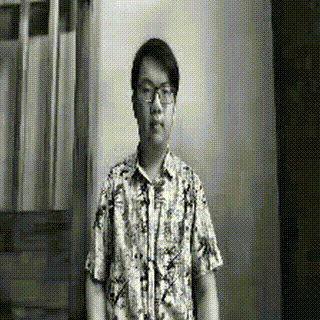

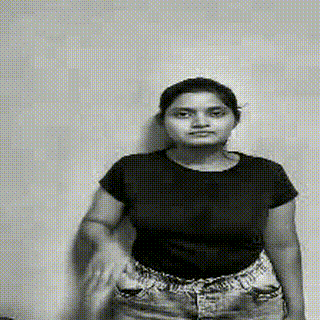

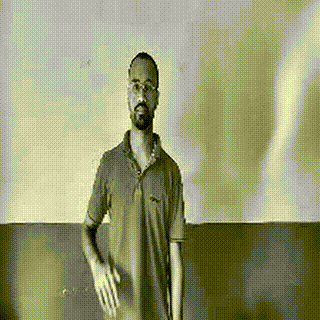

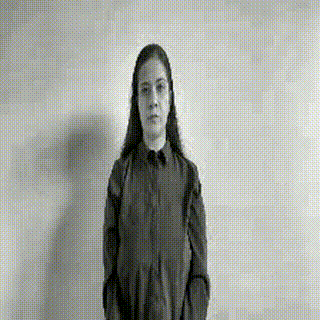

In [ ]:
import os
import subprocess
from IPython.display import Image, display

def convert_video_to_gif(video_path, gif_path, start_time=0, duration=10, width=320):
    """ Convert a video file to a GIF using ffmpeg. """

    if not os.path.exists(video_path):
        print(f"Error: The video file does not exist at {video_path}")
        return


    command = [
        'ffmpeg',
        '-i', video_path,
        '-vf', f"fps=10,scale={width}:-1:flags=lanczos",
        '-t', str(duration),
        '-ss', str(start_time),
        gif_path
    ]


    subprocess.run(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

def play_multiple_videos_as_gifs(video_paths, gif_paths, start_time=0, duration=10, width=320):
    """ Convert multiple videos to GIFs and display them in the notebook. """
    for i, video_path in enumerate(video_paths):
        gif_path = gif_paths[i]
        convert_video_to_gif(video_path, gif_path, start_time, duration, width)


        if os.path.exists(gif_path):
            display(Image(filename=gif_path))
        else:
            print(f"Error: GIF file not created for {video_path}.")

# Define the video paths and corresponding GIF paths
video_paths = [
    '/content/preprocessed/Duration_Normalized/adik/kenji_normalized.mp4',  # First video
    '/content/preprocessed/Duration_Normalized/adik/Bhavitha_Bojja_normalized.mp4',  # Second video
    '/content/preprocessed/Duration_Normalized/adik/Monu_Babu_Baitha_normalized.mp4',  # Third video
    '/content/preprocessed/Duration_Normalized/adik/Viorelia_normalized.mp4'  # Fourth video
]

gif_paths = [
    '/content/kenji_normalized.gif',  # GIF path for first video
    '/content/Bhavitha_Bojja_normalized.gif',  # GIF path for second video
    '/content/Monu_Babu_Baitha_normalized.gif',  # GIF path for third video
    '/content/Viorelia_normalized.gif'  # GIF path for fourth video
]

# Convert and display videos as GIFs
play_multiple_videos_as_gifs(video_paths, gif_paths, start_time=0, duration=5, width=320)


In [ ]:
import shutil


folder_to_download = "/content/preprocessed"  # Replace with your folder's path

zip_file_path = "/content/perprocessed.zip"

shutil.make_archive(zip_file_path.replace(".zip", ""), 'zip', folder_to_download)
print(f"Folder zipped at: {zip_file_path}")

Folder zipped at: /content/perprocessed.zip


In [ ]:
from google.colab import files


files.download(zip_file_path)  # Replace with your zip file's path


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>